In [1]:
import sys
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
# plt.style.use(mplhep.style.CMS)
import matplotlib.font_manager
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 18,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
# mpl.rcParams.update(
#     {'font.size': 18,
#      'font.family': 'sans-serif',
#      'font.sans-serif': ['Helvetica'],
#      'legend.fontsize': 14,
#      'axes.labelsize': 18,
#      'xtick.labelsize': 14,
#      'ytick.labelsize': 14
#     }
#     )
mpl.rcParams

['/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-e1651/x86_64-centos7-gcc11-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9/lib-dynload', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/IPython/extensions', '/scratch/malvesga/.ipyth

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

# norm_to_1fb = True
norm_to_1fb = False

#lepton_type = 'muon'
lepton_type = 'electron'

# data_sample = '2017'
data_sample = '2018'

plot_separate_syst_uncertainties = False

save_figures = False

bkg_MC_mix_protons = True

# run_tables = False

{'muon': {'2017B': 4.799881474, '2017C1': 5.785813941, '2017C2': 3.786684323, '2017D': 4.247682053, '2017E': 9.312832062, '2017F1': 1.738905587, '2017F2': 8.125575961, '2017F3': 3.674404546}, 'electron': {'2017B': 4.594096155565198, '2017C1': 5.521298099245362, '2017C2': 3.6135646891210857, '2017D': 4.0518639103567, '2017E': 8.906848461089172, '2017F1': 1.6584516422062712, '2017F2': 7.749629938012412, '2017F3': 3.504400870870218}}
Luminosity 2017 muon: 41.471779946999995
Luminosity 2017 electron: 39.60015376646642
{'muon': {'2018A': 14.025827145867588, '2018B1': 6.620869367493728, '2018B2': 0.430376623828928, '2018C': 6.891684998276784, '2018D1': 20.939902986506983, '2018D2': 10.856932131702669}, 'electron': {'2018A': 13.088399561509418, '2018B1': 6.629521091507798, '2018B2': 0.430939012174748, '2018C': 6.8915954055654725, '2018D1': 20.94983928140255, '2018D2': 10.862083907209522}}
Luminosity 2018 muon: 59.76559325367668
Luminosity 2018 electron: 58.85237825936951


### Event selection

In [3]:
def tau21_ddt_calculation(df, label_jet=None):
    
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
        
    jet0_tau21_ = ( df.loc[ :, "jet0_tau2"] / df.loc[ :, "jet0_tau1"] )
    
    rhoprime1_ = np.log((((df.loc[ :, "jet0_corrmass" + label_jet_])**2)/(df.loc[ :, "jet0_pt" + label_jet_])))
    M_ = -0.055114753311384504 ##M is the slope of the tau21 versus rhoprime1
    jet0_tau21_ddt_ = jet0_tau21_ - (M_*rhoprime1_)
    
    return jet0_tau21_, rhoprime1_, jet0_tau21_ddt_

In [4]:
def select_events( df_events, lepton_type, max_num_tracks = 4, label_jet=None, label_muon=None, label_electron=None ):

    max_num_tracks_ = max_num_tracks
    
#     label_jet_ = "_nom"
#     label_muon_ = "_nom"
#     label_WLep_ = "_nom"
#     label_WW_ = "_nom"
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
        
    label_muon_ = "_nom"
    if label_muon is not None: label_muon_ = label_muon
        
    label_electron_ = "_nom"
    if label_electron is not None: label_electron_ = label_electron
        
    label_WLep_ = "_nom"
    if label_muon is not None:
        label_WLep_ = label_muon
    elif label_electron is not None:
        label_WLep_ = label_electron
        
    label_WW_ = "_nom"
    if label_jet is not None:
        label_WW_ = label_jet
    elif label_muon is not None:
        label_WW_ = label_muon
    elif label_electron is not None:
        label_WW_ = label_electron
        
    label_xiCMS_ = "_nom"
    if label_jet is not None:
        label_xiCMS_ = label_jet
    elif label_muon is not None:
        label_xiCMS_ = label_muon
    elif label_electron is not None:
        label_xiCMS_ = label_electron
    
    lepton_var_phi_ = ""
    lepton_var_eta_ = ""
    if lepton_type == 'muon':
        lepton_var_phi_ = "muon0_phi"
        lepton_var_eta_ = "muon0_eta"
    elif lepton_type == 'electron':
        lepton_var_phi_ = "electron0_phi"
        lepton_var_eta_ = "electron0_eta"
        
    deltaPhi_jet_lep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, lepton_var_phi_ ] )
    msk_dphi_ = ( deltaPhi_jet_lep_ < -np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_lep_ >= np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaEta_jet_lep_ = ( df_events.loc[ :, "jet0_eta"] - df_events.loc[ :, lepton_var_eta_ ] )
    deltaR_jet_lep_ = np.sqrt( ( deltaPhi_jet_lep_ ) ** 2 + ( deltaEta_jet_lep_ ) ** 2 )
    
    deltaPhi_jet_met_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "met_phi"] )
    msk_dphi_ = ( deltaPhi_jet_met_ < -np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_met_ >= np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaPhi_jet_Wlep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "WLeptonicPhi"] )
    msk_dphi_ = ( deltaPhi_jet_Wlep_ < -np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_Wlep_ >= np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] - 2*np.pi

    jet0_tau21_ = ( df_events.loc[ :, "jet0_tau2"] / df_events.loc[ :, "jet0_tau1"] )
    
    rhoprime1_ = np.log((((df_events.loc[ :, "jet0_corrmass" + label_jet_])**2)/(df_events.loc[ :, "jet0_pt" + label_jet_])))
    M_ = -0.055114753311384504 ##M is the slope of the tau21 versus rhoprime1
    jet0_tau21_ddt_ = jet0_tau21_ - (M_*rhoprime1_)
    
    msk_All_ = np.full( df_events.shape[0], True, dtype=bool )
    
    msk_lep_ = None
    if lepton_type == 'muon':
        msk_lep_ = ( ( df_events.loc[ :, "muon0_pt" + label_muon_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "muon0_eta"] ) <= 2.4 ) & 
                     ( df_events.loc[ :, "muon0_iso"] <= 0.10 ) )
    elif lepton_type == 'electron':
        msk_lep_ = ( ( df_events.loc[ :, "electron0_pt" + label_electron_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "electron0_eta"] ) <= 2.4 ) )
        
#     msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 200.0 ) &
#                  ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 220.0 ) &
                 ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    
    msk_jet_lep_ = ( deltaR_jet_lep_ >= np.pi/2 )
    
    msk_met_ = ( df_events.loc[ :, "met"] >= 40.0 )
    
    msk_jet_met_ = ( np.abs( deltaPhi_jet_met_ ) >= 2.0 )

    #### sideband studies 
    ##msk_pruned_mass_ = ( ( df_events.loc[ :, "jet0_corrmass" + label_jet_] >= 50.0 ) &
    ##                     ( df_events.loc[ :, "jet0_corrmass" + label_jet_] <= 110.0 ) )

    ##msk_tau21_       = ( jet0_tau21_ddt_ <= 0.7 )
    ##msk_tau21_       = ( jet0_tau21_ <= 0.6 )
    
    ####
    
    msk_bjet_veto_   = ( df_events.loc[ :, "num_bjets_ak4"] == 0 )
    
#     msk_xiCMS_ = msk_All_.copy()
    msk_xiCMS_       = ( ( df_events.loc[ :, "xiCMS_45" + label_xiCMS_ ] <= 0.20 ) & ( df_events.loc[ :, "xiCMS_56" + label_xiCMS_ ] <= 0.20 ) )
    
    msk_Wlep_ = ( df_events.loc[ :, "WLeptonicPt" + label_WLep_ ] >= 200.0 )
    
    msk_jet_Wlep_ = ( np.abs( deltaPhi_jet_Wlep_ ) >= 2.5 )
    
#     msk_MWW_ = ( df_events.loc[ :, "recoMWW"] >= 500.0 )
    msk_MWW_ = ( df_events.loc[ :, "MWW" + label_WW_ ] >= 500.0 )
    
    msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= max_num_tracks_ )
#     msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= 999 )
    
    ##masks_ = [ msk_All_, msk_lep_, msk_jet_, msk_jet_lep_, msk_met_, msk_jet_met_,
    ##           msk_pruned_mass_, msk_tau21_, msk_bjet_veto_, msk_xiCMS_,
    ##           msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_ ]
    
    masks_ = [ msk_All_, msk_lep_, msk_jet_, msk_jet_lep_, msk_met_, msk_jet_met_,
               msk_bjet_veto_, msk_xiCMS_,
               msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_ ]
    
    lepton_sel_name_ = ""
    jet_lepton_sel_name_ = ""
    if lepton_type == 'muon':
        lepton_sel_name_ = "Muon"
        jet_lepton_sel_name_ = "Jet_Muon"
    elif lepton_type == 'electron':
        lepton_sel_name_ = "Electron"
        jet_lepton_sel_name_ = "Jet_Electron"
        
    ##selection_keys_ = [ "All", lepton_sel_name_, "Jet", jet_lepton_sel_name_, "MET", "Jet_MET",
    ##                    "PrunedMass", "Tau21", "BJet_Veto", "Xi_CMS",
    ##                    "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks" ]
    
    selection_keys_ = [ "All", lepton_sel_name_, "Jet", jet_lepton_sel_name_, "MET", "Jet_MET",
                        "BJet_Veto", "Xi_CMS",
                        "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks" ]
    
    selections_ = {}
    msk_ = masks_[ 0 ].copy()
    for idx_, key_ in enumerate( selection_keys_ ):
        msk_ = msk_ & masks_[ idx_ ]
        selections_[ key_ ] = np.sum( msk_ )
        
    df_events = df_events.loc[ msk_ ]
    
    return df_events, selection_keys_, selections_

### Signal

In [5]:
load_signal = True

labels_signals = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]
#         labels_signals = [ "GGToWW-AQGC-muon-A0W1e-6", "GGToWW-AQGC-muon-A0W2e-6", "GGToWW-AQGC-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-muon-A0W1e-6", "GGToWW-AQGC-2017-muon-A0W2e-6", "GGToWW-AQGC-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-electron-A0W1e-6", "GGToWW-AQGC-electron-A0W2e-6", "GGToWW-AQGC-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-electron-A0W1e-6", "GGToWW-AQGC-2017-electron-A0W2e-6", "GGToWW-AQGC-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-2018-muon-A0W5e-7", "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-2018-electron-A0W5e-7", "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
    
df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}
if load_signal:
    base_path_ = "output"
    for label_ in labels_signals:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )           
            df_counts_signals[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-2018-electron-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-electron-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-electron-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [6]:
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ].columns.values
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ][ ['pileupWeight','xi','random','arm','ismultirp', 'eff_proton_all'] ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2018-electron-A0W1e-6'
df_signals_protons_multiRP_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   43        422   12931417489219426563 0              146.0       0.4   
    45        443   1804035302496181402  0              152.0       0.4   
    62        612   1815521296983520992  0              144.0       0.4   
    121       1201  17569436976769994127 0              154.0       0.4   
    131       1310  13385357435107877852 0              130.0       0.4   
...                                                       ...       ...   
    9905      99050 14426536541701204795 0              153.0       0.4   
    9952      99515 9563208485603652804  0              130.0       0.4   
    9959      99581 1096076079944316008  0              133.0       0.4   
    9981      99809 553739187845098945   0              143.0       0.4   
    9989      99888 14368869497932049563 0              149.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   43        422   12931417489219426563 0           0.0  331.759216   
    45        443   1804035302496181402  0           0.0  453.160858   
    62        612   1815521296983520992  0           0.0  432.893616   
    121       1201  17569436976769994127 0           0.0  422.261414   
    131       1310  13385357435107877852 0           0.0  612.153870   
...                                                  ...         ...   
    9905      99050 14426536541701204795 0           0.0  733.996826   
    9952      99515 9563208485603652804  0           0.0  208.636108   
    9959      99581 1096076079944316008  0           0.0  242.842361   
    9981      99809 553739187845098945   0           0.0  771.258972   
    9989      99888 14368869497932049563 0           0.0  801.617615   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   43        422   12931417489219426563 0     -0.023301 -1.644444   
    45        443   1804035302496181402  0      0.483170  3.117945   
    62        612   1815521296983520992  0     -0.922337  2.617586   
    121       1201  17569436976769994127 0     -0.599222  0.640295   
    131       1310  13385357435107877852 0     -0.083334 -1.668640   
...                                                  ...       ...   
    9905      99050 14426536541701204795 0     -0.542128  0.240823   
    9952      99515 9563208485603652804  0     -0.947725  0.177740   
    9959      99581 1096076079944316008  0      0.157315 -1.679264   
    9981      99809 553739187845098945   0     -0.497800 -3.032743   
    9989      99888 14368869497932049563 0      0.135004  0.459812   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   43        422   12931417489219426563 0       343.426422  66.870949   
    45        443   1804035302496181402  0       514.879700  68.750031   
    62        612   1815521296983520992  0       641.409912  75.817772   
    121       1201  17569436976769994127 0       514.642578  89.523491   
    131       1310  13385357435107877852 0       624.643494  12.394755   
...                                                     ...        ...   
    9905      99050 14426536541701204795 0       853.547974  71.958977   
    9952      99515 9563208485603652804  0       313.289459  10.169263   
    9959      99581 1096076079944316008  0       260.936096  82.348602   
    9981      99809 553739187845098945   0       878.513184  76.899773   
    9989      99888 14368869497932049563 0       818.769043  33.730419   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   43        422   12931417489219426563 0          71.621078   0.238285  ...   
    45        443 

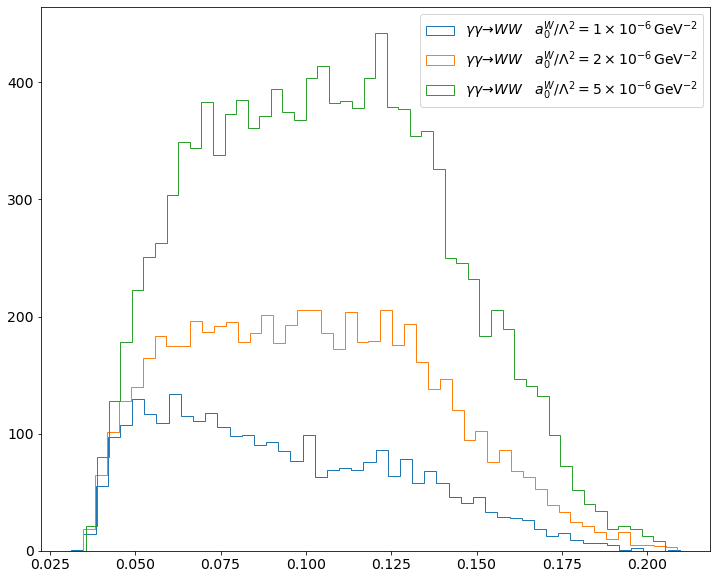

In [7]:
labels_samples = {
    "GGToWW-AQGC-A0W5e-7": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-7} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 1 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 2 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-6} \,\rm{GeV}^{-2}$"
}
labels_samples[ "GGToWW-AQGC-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]

if load_signal:
    fig = plt.figure( figsize=(12,10) )
    for label_ in labels_signals: 
        plt.hist( df_signals_protons_multiRP_index[ label_ ][ 'xi' ], histtype='step', density=False, bins=50, label=labels_samples[ label_ ] )
    plt.legend( loc='best', fontsize=14 )

In [8]:
for label_ in labels_signals:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_events[ label_ ])
    print(jet0_tau21)
    df_signals_protons_multiRP_events[ label_ ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_events[ label_ ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    43         422    12931417489219426563  0        0.495923
     45         443    1804035302496181402   0        0.193726
     62         612    1815521296983520992   0        0.457582
     121        1201   17569436976769994127  0        0.347414
     131        1310   13385357435107877852  0        0.541873
                                                        ...   
     9905       99050  14426536541701204795  0        0.361525
     9952       99515  9563208485603652804   0        0.908716
     9959       99581  1096076079944316008   0        0.491694
     9981       99809  553739187845098945    0        0.605743
     9989       99888  14368869497932049563  0        0.858535
Length: 618, dtype: float32
run  lumiblock  event  hash_id               slice
1    9          84     5336627818744749145   0        0.274242
     12         120    9653490315610025904   0        0.493613
     13         125    5266736828546207707   0     

### Ouf of acceptance protons

### Signal with pileup/data protons

In [9]:
labels_signals_mix_protons = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-A0W1e-6", "GGToWW-AQGC-mix_protons-A0W2e-6", "GGToWW-AQGC-mix_protons-A0W5e-6" ]
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]
df_counts_signals_mix_protons = {}
df_signals_protons_multiRP_mix_protons_index = {}
df_signals_protons_multiRP_mix_protons_events = {}
if load_signal:
    base_path_ = "output"
    for label_ in labels_signals_mix_protons:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals_mix_protons[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_mix_protons_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_mix_protons_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [10]:
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_index[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6'
df_signals_protons_multiRP_mix_protons_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   11        106   146606933020950437   0              136.0       0.4   
    1325      13249 4886634184078168623  0              135.0       0.4   
    1334      13338 1067355494037609645  0              139.0       0.4   
    1567      15661 945915171722843046   0              130.0       0.4   
    1895      18945 4407740868180543755  0              130.0       0.4   
...                                                       ...       ...   
    8804      88034 18042805188768146274 0              153.0       0.4   
    8938      89376 15580820222802723894 0              152.0       0.4   
    9351      93501 1560980461660840341  0              154.0       0.4   
    9375      93746 17262706079657271644 0              150.0       0.4   
    9904      99037 156671850751480993   0              156.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   11        106   146606933020950437   0           0.0  213.784363   
    1325      13249 4886634184078168623  0           0.0  867.366150   
    1334      13338 1067355494037609645  0           0.0  241.806808   
    1567      15661 945915171722843046   0           0.0  326.591095   
    1895      18945 4407740868180543755  0           0.0  536.175781   
...                                                  ...         ...   
    8804      88034 18042805188768146274 0           0.0  619.358032   
    8938      89376 15580820222802723894 0           0.0  682.240601   
    9351      93501 1560980461660840341  0           0.0  485.165955   
    9375      93746 17262706079657271644 0           0.0  638.031616   
    9904      99037 156671850751480993   0           0.0  363.287018   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   11        106   146606933020950437   0     -0.869811  1.971853   
    1325      13249 4886634184078168623  0      0.742225  0.917003   
    1334      13338 1067355494037609645  0      0.029077  0.868619   
    1567      15661 945915171722843046   0      1.105431  0.395116   
    1895      18945 4407740868180543755  0     -0.092488  2.189582   
...                                                  ...       ...   
    8804      88034 18042805188768146274 0      0.497811 -2.045019   
    8938      89376 15580820222802723894 0     -0.506677 -1.867926   
    9351      93501 1560980461660840341  0      0.238608  2.362466   
    9375      93746 17262706079657271644 0     -0.575212 -2.589720   
    9904      99037 156671850751480993   0      0.842679 -3.117787   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   11        106   146606933020950437   0       304.602997  12.371869   
    1325      13249 4886634184078168623  0      1122.020142  69.625107   
    1334      13338 1067355494037609645  0       249.258194  36.599983   
    1567      15661 945915171722843046   0       555.264709  16.048983   
    1895      18945 4407740868180543755  0       548.098022  70.973694   
...                                                     ...        ...   
    8804      88034 18042805188768146274 0       706.289551  21.332130   
    8938      89376 15580820222802723894 0       779.066833  75.004005   
    9351      93501 1560980461660840341  0       501.652191   4.975803   
    9375      93746 17262706079657271644 0       754.484741  72.502190   
    9904      99037 156671850751480993   0       504.034363  11.061473   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   11        106   146606933020950437   0          13.379552   0.140511  ...   
    1325      1324

In [11]:
for label_ in labels_signals_mix_protons:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_mix_protons_events[ label_ ])
    print(jet0_tau21)
    df_signals_protons_multiRP_mix_protons_events[ label_ ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_mix_protons_events[ label_ ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    11         106    146606933020950437    0        0.825005
     1325       13249  4886634184078168623   0        0.553471
     1334       13338  1067355494037609645   0        0.502498
     1567       15661  945915171722843046    0        0.621568
     1895       18945  4407740868180543755   0        0.318087
                                                        ...   
     8804       88034  18042805188768146274  0        0.624325
     8938       89376  15580820222802723894  0        0.487886
     9351       93501  1560980461660840341   0        0.784480
     9375       93746  17262706079657271644  0        0.381951
     9904       99037  156671850751480993    0        0.788493
Length: 804, dtype: float32
run  lumiblock  event  hash_id               slice
1    109        1088   16010325401982736482  0        0.228653
     1231       12306  6063684703609637456   0        0.470556
     1267       12667  12921010815659233622  0     

### Signal with event mixing (signal and pileup protons)

In [12]:
df_signals_protons_multiRP_sig_plus_mix_2protons_events = {}
df_signals_protons_multiRP_sig_plus_mix_events_categories = {}
base_path_ = "output"
for label_ in labels_signals:
    print ( label_ )
    file_path_ = "{}/data-store-signal-plus-mix-events-{}.h5".format( base_path_, label_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ] = store_[ "/events_multiRP/all" ]
        df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ] = {}
        for key_ in [ '2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix' ]:
            print ( key_ )
            df_protons_multiRP_events__ = store_[ "events_multiRP/{}".format( key_ ) ]
            df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ key_ ] = df_protons_multiRP_events__

GGToWW-AQGC-2018-electron-A0W1e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-electron-A0W2e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-electron-A0W5e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


In [13]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
# columns__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values
# columns_electron__ = columns__[ [ key_.find( "electron" ) >= 0 for key_ in columns__ ] ]
# df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ][ columns_electron__ ]
df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   4         31    4444280190647120594  0              153.0       0.4   
    6         57    17209632595272962357 0              135.0       0.4   
    11        106   146606933020950437   0              136.0       0.4   
    18        176   17294491484909809568 0              131.0       0.4   
    20        200   4284651853606638077  0              154.0       0.4   
...                                                       ...       ...   
    9973      99726 9830070165709582603  0              147.0       0.4   
    9976      99756 15709357494856713619 0              130.0       0.4   
    9981      99802 2392237523300087541  0              143.0       0.4   
              99809 553739187845098945   0              143.0       0.4   
    9985      99849 10789223939298318063 0              150.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   4         31    4444280190647120594  0           0.0   373.997894   
    6         57    17209632595272962357 0           0.0   785.466064   
    11        106   146606933020950437   0           0.0   213.784363   
    18        176   17294491484909809568 0           0.0  1053.317261   
    20        200   4284651853606638077  0           0.0   264.722809   
...                                                  ...          ...   
    9973      99726 9830070165709582603  0           0.0  1181.507446   
    9976      99756 15709357494856713619 0           0.0   307.528717   
    9981      99802 2392237523300087541  0           0.0   201.220840   
              99809 553739187845098945   0           0.0   771.258972   
    9985      99849 10789223939298318063 0           0.0   457.058655   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   4         31    4444280190647120594  0      1.823478  2.057920   
    6         57    17209632595272962357 0     -0.841210 -2.852141   
    11        106   146606933020950437   0     -0.869811  1.971853   
    18        176   17294491484909809568 0     -0.466934  0.984192   
    20        200   4284651853606638077  0     -1.234349 -0.293864   
...                                                  ...       ...   
    9973      99726 9830070165709582603  0      0.266193  1.969920   
    9976      99756 15709357494856713619 0      0.550901  0.925174   
    9981      99802 2392237523300087541  0     -0.665191 -1.367156   
              99809 553739187845098945   0     -0.497800 -3.032743   
    9985      99849 10789223939298318063 0      0.164953 -2.242678   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   4         31    4444280190647120594  0      1192.937134  75.115562   
    6         57    17209632595272962357 0      1083.717163  13.861777   
    11        106   146606933020950437   0       304.602997  12.371869   
    18        176   17294491484909809568 0      1176.453369  62.286068   
    20        200   4284651853606638077  0       505.058472  91.196411   
...                                                     ...        ...   
    9973      99726 9830070165709582603  0      1230.770020  65.069687   
    9976      99756 15709357494856713619 0       365.226868  72.087555   
    9981      99802 2392237523300087541  0       249.239822   8.032428   
              99809 553739187845098945   0       878.513184  76.899773   
    9985      99849 10789223939298318063 0       474.612213  83.305984   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   4         31    4444280190647120594  0          81.449829   0.265953  ...   
    6

In [14]:
for label_ in labels_signals:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ])
    print(jet0_tau21)
    df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    4          31     4444280190647120594   0        0.317085
     6          57     17209632595272962357  0        0.611042
     11         106    146606933020950437    0        0.825005
     18         176    17294491484909809568  0        0.542878
     20         200    4284651853606638077   0        0.274343
                                                        ...   
     9973       99726  9830070165709582603   0        0.469433
     9976       99756  15709357494856713619  0        0.304252
     9981       99802  2392237523300087541   0        0.818429
                99809  553739187845098945    0        0.605743
     9985       99849  10789223939298318063  0        0.228725
Length: 1509, dtype: float32
run  lumiblock  event  hash_id               slice
1    9          84     5336627818744749145   0        0.274242
     12         120    9653490315610025904   0        0.493613
     13         122    17474111004758668986  0    

In [15]:
for label_ in labels_signals:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ])
    print(jet0_tau21)
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    43         422    12931417489219426563  0        0.495923
     62         612    1815521296983520992   0        0.457582
     131        1310   13385357435107877852  0        0.541873
     147        1469   12540650819122191254  0        0.496449
     150        1498   10761848520140616745  0        0.733693
                                                        ...   
     9880       98794  5249756786376693243   0        0.493430
     9893       98930  5263505100953677912   0        0.859742
     9905       99050  14426536541701204795  0        0.361525
     9959       99581  1096076079944316008   0        0.491694
     9981       99809  553739187845098945    0        0.605743
Length: 403, dtype: float32
run  lumiblock  event  hash_id               slice
1    9          84     5336627818744749145   0        0.274242
     12         120    9653490315610025904   0        0.493613
     13         125    5266736828546207707   0     

In [16]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   26        251   10341327880321981465 0              136.0       0.4   
    37        369   9596891133068582906  0              148.0       0.4   
    40        398   11894926942551518780 0              155.0       0.4   
    43        429   16581942950031500097 0              146.0       0.4   
    50        498   1275345876882242554  0              130.0       0.4   
...                                                       ...       ...   
    9979      99787 14454460017729830610 0              141.0       0.4   
    9982      99820 6193456933277368766  0              150.0       0.4   
    9984      99834 14869447582535012721 0              151.0       0.4   
    9987      99863 8863750508296216784  0              157.0       0.4   
    9999      99989 13637004752185742277 0              152.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   26        251   10341327880321981465 0           0.0  544.906799   
    37        369   9596891133068582906  0           0.0  469.367432   
    40        398   11894926942551518780 0           0.0  697.330811   
    43        429   16581942950031500097 0           0.0  424.798279   
    50        498   1275345876882242554  0           0.0  637.773438   
...                                                  ...         ...   
    9979      99787 14454460017729830610 0           0.0  747.624146   
    9982      99820 6193456933277368766  0           0.0  558.533813   
    9984      99834 14869447582535012721 0           0.0  878.018188   
    9987      99863 8863750508296216784  0           0.0  850.843323   
    9999      99989 13637004752185742277 0           0.0  514.671082   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   26        251   10341327880321981465 0     -1.176404  0.091473   
    37        369   9596891133068582906  0      0.167632 -0.552386   
    40        398   11894926942551518780 0     -0.905416  0.375843   
    43        429   16581942950031500097 0      0.754287 -3.131724   
    50        498   1275345876882242554  0      0.159858  0.634591   
...                                                  ...       ...   
    9979      99787 14454460017729830610 0      0.289550 -0.550545   
    9982      99820 6193456933277368766  0     -0.563307 -1.379261   
    9984      99834 14869447582535012721 0      0.137860 -0.431658   
    9987      99863 8863750508296216784  0      0.276072  2.297456   
    9999      99989 13637004752185742277 0     -1.119771  2.891475   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   26        251   10341327880321981465 0       975.936768  78.487831   
    37        369   9596891133068582906  0       486.559265  84.789192   
    40        398   11894926942551518780 0      1010.029175  62.203720   
    43        429   16581942950031500097 0       562.937866  72.760117   
    50        498   1275345876882242554  0       659.984619  79.857819   
...                                                     ...        ...   
    9979      99787 14454460017729830610 0       789.685913  15.714008   
    9982      99820 6193456933277368766  0       656.178162  48.199123   
    9984      99834 14869447582535012721 0       894.317017   4.185478   
    9987      99863 8863750508296216784  0       890.953247  70.859222   
    9999      99989 13637004752185742277 0       881.035400  75.241173   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   26        251   10341327880321981465 0          87.590706   0.245203  ...   
    37        369 

In [17]:
for label_ in labels_signals:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ])
    print(jet0_tau21)
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    6          57     17209632595272962357  0        0.611042
     85         842    11827594437602564940  0        0.249339
     120        1193   8768547171766962220   0        0.584168
     140        1394   16891634611655179027  0        0.361708
     235        2344   3043364758199009484   0        0.205409
                                                        ...   
     9757       97570  3946902418916788642   0        0.524452
     9856       98551  4153255283654506717   0        0.287288
                98553  13416127206168613813  0        0.229554
     9870       98691  5365748780764555136   0        0.497369
     9904       99037  156671850751480993    0        0.788493
Length: 278, dtype: float32
run  lumiblock  event  hash_id               slice
1    17         162    14543255190294692945  0        0.629537
     90         897    5836038544695142651   0        0.421141
     98         978    2499509244110282335   0     

In [18]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   6         59    6563063974219950525  0              135.0       0.4   
    33        326   8065684058651203135  0              130.0       0.4   
    38        376   13745246874804876058 0              152.0       0.4   
    42        414   368915370321847971   0              141.0       0.4   
    47        467   12589132863858527277 0              148.0       0.4   
...                                                       ...       ...   
    9944      99431 5286572924298161474  0              146.0       0.4   
    9946      99455 12206766854452007101 0              154.0       0.4   
    9947      99470 8737331996249518534  0              148.0       0.4   
    9950      99496 15017395423262520102 0              130.0       0.4   
    9975      99748 13723021782018655465 0              153.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   6         59    6563063974219950525  0           0.0  538.135010   
    33        326   8065684058651203135  0           0.0  693.001038   
    38        376   13745246874804876058 0           0.0  512.664368   
    42        414   368915370321847971   0           0.0  771.708252   
    47        467   12589132863858527277 0           0.0  698.922791   
...                                                  ...         ...   
    9944      99431 5286572924298161474  0           0.0  259.256592   
    9946      99455 12206766854452007101 0           0.0  775.757874   
    9947      99470 8737331996249518534  0           0.0  630.936218   
    9950      99496 15017395423262520102 0           0.0  638.094055   
    9975      99748 13723021782018655465 0           0.0  401.158325   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   6         59    6563063974219950525  0     -1.307160  2.543089   
    33        326   8065684058651203135  0     -0.152198 -2.212804   
    38        376   13745246874804876058 0     -1.093020 -0.489505   
    42        414   368915370321847971   0      0.491320  1.642405   
    47        467   12589132863858527277 0     -0.489560  1.033583   
...                                                  ...       ...   
    9944      99431 5286572924298161474  0     -1.707622  2.030910   
    9946      99455 12206766854452007101 0      0.140919 -1.096267   
    9947      99470 8737331996249518534  0      0.184171 -1.023989   
    9950      99496 15017395423262520102 0      0.722569  0.202031   
    9975      99748 13723021782018655465 0      1.334970 -1.047012   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   6         59    6563063974219950525  0      1074.349487  84.219894   
    33        326   8065684058651203135  0       708.585693  28.949514   
    38        376   13745246874804876058 0       856.644958  51.253262   
    42        414   368915370321847971   0       875.077332  75.216965   
    47        467   12589132863858527277 0       789.434143  62.508747   
...                                                     ...        ...   
    9944      99431 5286572924298161474  0       746.285156  75.530304   
    9946      99455 12206766854452007101 0       791.165405  74.211052   
    9947      99470 8737331996249518534  0       652.253174  60.507149   
    9950      99496 15017395423262520102 0       820.020325  53.037224   
    9975      99748 13723021782018655465 0       817.167603  11.174719   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   6         59    6563063974219950525  0          94.557068   0.204368  ...   
    33        326 

In [19]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm1' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         7     3029959089898861192  0              152.0       0.4   
    16        160   4593780893174430319  0              148.0       0.4   
    24        238   2974926131272793046  0              152.0       0.4   
    27        270   5305775344228998399  0              150.0       0.4   
    31        308   6620603778965163351  0              139.0       0.4   
...                                                       ...       ...   
    9988      99879 17891476664080388551 0              131.0       0.4   
    9990      99893 7953118427920573629  0              130.0       0.4   
              99897 11927927241082332213 0              130.0       0.4   
    9998      99976 15592647277201030807 0              130.0       0.4   
    9999      99984 14860636729143978273 0              152.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   1         7     3029959089898861192  0           0.0   862.280029   
    16        160   4593780893174430319  0           0.0   680.100830   
    24        238   2974926131272793046  0           0.0   768.156189   
    27        270   5305775344228998399  0           0.0   282.236115   
    31        308   6620603778965163351  0           0.0   575.800293   
...                                                  ...          ...   
    9988      99879 17891476664080388551 0           0.0   897.139771   
    9990      99893 7953118427920573629  0           0.0   208.053604   
              99897 11927927241082332213 0           0.0   650.178467   
    9998      99976 15592647277201030807 0           0.0   524.115295   
    9999      99984 14860636729143978273 0           0.0  1170.974609   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         7     3029959089898861192  0     -0.291295 -0.891384   
    16        160   4593780893174430319  0      0.384705 -2.706818   
    24        238   2974926131272793046  0      0.174670  1.344804   
    27        270   5305775344228998399  0      1.819091  1.907129   
    31        308   6620603778965163351  0     -0.351051  0.692874   
...                                                  ...       ...   
    9988      99879 17891476664080388551 0     -0.138773  0.695309   
    9990      99893 7953118427920573629  0      2.180194  2.137568   
              99897 11927927241082332213 0      0.744292 -1.276829   
    9998      99976 15592647277201030807 0      0.127757  0.892635   
    9999      99984 14860636729143978273 0     -0.178965 -1.676952   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   1         7     3029959089898861192  0       908.352234  69.913383   
    16        160   4593780893174430319  0       738.335449  57.416935   
    24        238   2974926131272793046  0       788.035156  75.552673   
    27        270   5305775344228998399  0       894.619934   6.180554   
    31        308   6620603778965163351  0       620.772095  63.103004   
...                                                     ...        ...   
    9988      99879 17891476664080388551 0       912.837830  75.931305   
    9990      99893 7953118427920573629  0       935.073730  54.602100   
              99897 11927927241082332213 0       844.779663  10.872074   
    9998      99976 15592647277201030807 0       535.551331  53.571659   
    9999      99984 14860636729143978273 0      1199.471802  81.715927   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         7     3029959089898861192  0          74.372856   0.130173  ...   
    1

In [20]:
for label_ in labels_signals:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ])
    print(jet0_tau21)
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    4          31     4444280190647120594   0        0.317085
     11         106    146606933020950437    0        0.825005
     18         176    17294491484909809568  0        0.542878
     39         389    3504033555923613818   0        0.303579
     41         405    16181717408389710107  0        0.856532
                                                        ...   
     9843       98427  18312296815386887108  0        0.321593
     9886       98857  14538028596562876807  0        0.539134
     9895       98950  3375252608188985190   0        0.408929
     9907       99069  2852803090669365060   0        0.486816
     9976       99756  15709357494856713619  0        0.304252
Length: 432, dtype: float32
run  lumiblock  event  hash_id               slice
1    48         479    3962078375852527428   0        0.491523
     53         524    4828976856979098583   0        0.420654
     56         551    15318933899944020610  0     

In [21]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   3         29    806207490593637240   0              156.0       0.4   
    7         65    12569516778578626622 0              140.0       0.4   
    9         90    12572729622353147592 0              138.0       0.4   
    11        104   18389012770801581721 0              136.0       0.4   
    15        149   16911674151557521744 0              131.0       0.4   
...                                                       ...       ...   
    9992      99911 6025995136724276684  0              142.0       0.4   
              99917 3016965972375732734  0              142.0       0.4   
    9993      99930 7288476303663589235  0              146.0       0.4   
    9996      99959 9371227513890689228  0              139.0       0.4   
    9998      99974 9430600441651394991  0              130.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   3         29    806207490593637240   0           0.0   211.097763   
    7         65    12569516778578626622 0           0.0   399.522003   
    9         90    12572729622353147592 0           0.0   661.659363   
    11        104   18389012770801581721 0           0.0   750.860596   
    15        149   16911674151557521744 0           0.0   644.453064   
...                                                  ...          ...   
    9992      99911 6025995136724276684  0           0.0   625.596924   
              99917 3016965972375732734  0           0.0  1175.786865   
    9993      99930 7288476303663589235  0           0.0  1188.389526   
    9996      99959 9371227513890689228  0           0.0   698.100464   
    9998      99974 9430600441651394991  0           0.0   646.045715   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   3         29    806207490593637240   0     -2.283721 -1.274327   
    7         65    12569516778578626622 0      1.200736 -2.314024   
    9         90    12572729622353147592 0      0.598730  1.972573   
    11        104   18389012770801581721 0      0.319129 -0.486737   
    15        149   16911674151557521744 0     -1.049928  2.195833   
...                                                  ...       ...   
    9992      99911 6025995136724276684  0     -1.180644 -1.351674   
              99917 3016965972375732734  0      0.125051 -0.950498   
    9993      99930 7288476303663589235  0      0.169018 -1.407617   
    9996      99959 9371227513890689228  0      0.798216  2.751503   
    9998      99974 9430600441651394991  0      0.391877  2.468749   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   3         29    806207490593637240   0      1047.401733   6.675690   
    7         65    12569516778578626622 0       732.881592  78.570564   
    9         90    12572729622353147592 0       793.025452  26.352945   
    11        104   18389012770801581721 0       795.687744  13.877236   
    15        149   16911674151557521744 0      1040.624512  56.628162   
...                                                     ...        ...   
    9992      99911 6025995136724276684  0      1121.494873  71.572601   
              99917 3016965972375732734  0      1197.641602  76.294075   
    9993      99930 7288476303663589235  0      1214.044922  73.388710   
    9996      99959 9371227513890689228  0       938.610779  12.994630   
    9998      99974 9430600441651394991  0       702.248474  72.998413   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   3         29    806207490593637240   0           7.410570   0.098984  ...   
    7

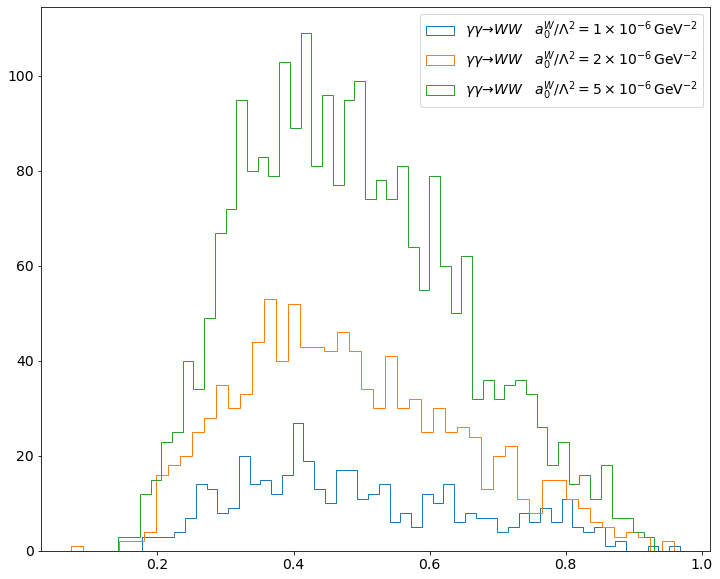

In [22]:
fig = plt.figure( figsize=(12,10) )
for label_ in labels_signals:
    plt.hist( df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ]["jet0_tau21"], histtype='step', density=False, bins=50, label=labels_samples[ label_ ] )
plt.legend( loc='best', fontsize=14 )

### Select events (signal)

In [23]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories = {}

variations_ = { "jet": [ "_jes_up", "_jes_dw", "_jer_up", "_jer_dw" ] }
for label_ in labels_signals:
    print ( label_ )
    df_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]
    print ( df_events__.shape[0] )
#     df_selected_events__, selection_keys__, selections__  = select_events( df_events__ )
    df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
    print ( df_selected_events__.shape[0] )
    print ( selection_keys__ )
    print ( selections__ )
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ] = df_selected_events__
    for var_label__ in variations_:
        print ( var_label__ )
        for variation__ in variations_[ var_label__ ]:
            opt__ = { "label_" + var_label__ : variation__ }
            print ( opt__ )
            df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
            print ( df_selected_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ] = df_selected_events__
            
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ] = {}
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ]:
        print ( cat__ )
        df_events__ = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ]
        print ( df_events__.shape[0] )
        df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
        print ( df_selected_events__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ] = {}
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ "_nom" ] = df_selected_events__
        for var_label__ in variations_:
            print ( var_label__ )
            for variation__ in variations_[ var_label__ ]:
                opt__ = { "label_" + var_label__ : variation__ }
                print ( opt__ )
                df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
                print ( df_selected_events__.shape[0] )
                print ( selection_keys__ )
                print ( selections__ )
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ] = df_selected_events__

GGToWW-AQGC-2018-electron-A0W1e-6
1509
834
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1509, 'Electron': 1509, 'Jet': 1388, 'Jet_Electron': 1388, 'MET': 1276, 'Jet_MET': 1240, 'BJet_Veto': 1240, 'Xi_CMS': 1158, 'WLeptonic': 1141, 'Jet_WLeptonic': 1141, 'MWW': 1131, 'ExtraTracks': 834}
jet
{'label_jet': '_jes_up'}
836
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1509, 'Electron': 1509, 'Jet': 1406, 'Jet_Electron': 1406, 'MET': 1290, 'Jet_MET': 1254, 'BJet_Veto': 1254, 'Xi_CMS': 1168, 'WLeptonic': 1146, 'Jet_WLeptonic': 1146, 'MWW': 1136, 'ExtraTracks': 836}
{'label_jet': '_jes_dw'}
835
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1509, 'Electron': 1509, 'Jet': 1378, 'Jet_Electron': 1378, 'MET':

371
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 645, 'Electron': 645, 'Jet': 592, 'Jet_Electron': 592, 'MET': 535, 'Jet_MET': 527, 'BJet_Veto': 527, 'Xi_CMS': 526, 'WLeptonic': 519, 'Jet_WLeptonic': 519, 'MWW': 518, 'ExtraTracks': 371}
{'label_jet': '_jer_up'}
371
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 645, 'Electron': 645, 'Jet': 596, 'Jet_Electron': 596, 'MET': 539, 'Jet_MET': 531, 'BJet_Veto': 531, 'Xi_CMS': 530, 'WLeptonic': 521, 'Jet_WLeptonic': 521, 'MWW': 520, 'ExtraTracks': 371}
{'label_jet': '_jer_dw'}
372
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 645, 'Electron': 645, 'Jet': 596, 'Jet_Electron': 596, 'MET': 539, 'Jet_MET': 531, 'BJet_Veto': 531, 'Xi_CMS': 530, 'WLeptonic': 5

720
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1211, 'Electron': 1211, 'Jet': 1196, 'Jet_Electron': 1196, 'MET': 1110, 'Jet_MET': 1068, 'BJet_Veto': 1068, 'Xi_CMS': 978, 'WLeptonic': 974, 'Jet_WLeptonic': 974, 'MWW': 972, 'ExtraTracks': 720}
{'label_jet': '_jes_dw'}
723
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1211, 'Electron': 1211, 'Jet': 1189, 'Jet_Electron': 1189, 'MET': 1104, 'Jet_MET': 1062, 'BJet_Veto': 1062, 'Xi_CMS': 980, 'WLeptonic': 979, 'Jet_WLeptonic': 979, 'MWW': 977, 'ExtraTracks': 723}
{'label_jet': '_jer_up'}
719
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1211, 'Electron': 1211, 'Jet': 1189, 'Jet_Electron': 1189, 'MET': 1104, 'Jet_MET': 1062, 'BJet_Veto': 1062, 'Xi_CMS'

In [24]:
import json
samples_info = None
if data_sample == '2017':
    samples_info = json.load( open( 'samples_info_2017.json' ) )
elif data_sample == '2018':
#     samples_info = json.load( open( 'samples_info_2018.json' ) )
#     samples_info = json.load( open( 'samples_info_UL.json' ) )
    samples_info = json.load( open( 'samples_info_UL18_XSDB.json' ) )
samples_info

{'FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0': [100000.0, 0.045393, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0': [100000.0, 0.058313, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0': [100000.0, 0.148122, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_2e-5_semi_pt0': [99000.0, 0.16477, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_5e-6_semi_pt0': [100000.0, 0.049199, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_8e-6_semi_pt0': [100000.0, 0.061404, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_0_semi_pt0': [262999.0, 0.0409705, 1.0, 6],
 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8': [200205760.0, 831.76, 1.0, 800],
 'WW_TuneCP5_13TeV-pythia8': [6013000.0, 75.95, 1.0, 800],
 'WZ_TuneCP5_13TeV-pythia8': [6017000.0, 27.59, 1.0, 800],
 'ZZ_TuneCP5_13TeV-pythia8': [3000.0, 12.17, 1.0, 800],
 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8': [7654000.0,
  3.549,
  1.0,
  800],
 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8': [178756000.0,
  115.3,
  1.0,
  800],
 'ST

In [25]:
lumi_periods = None
if data_sample == '2017':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2017[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2017[ 'electron' ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2018[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2018[ 'electron' ]
    
lumi = np.sum( list( lumi_periods.values() ) )
print ( lumi )

#labels_signals = [ "GGToWW-AQGC-test-A0W1e-6", "GGToWW-AQGC-test-A0W2e-6", "GGToWW-AQGC-test-A0W5e-6" ]
sample_names = {}
if data_sample == '2017':
#     sample_names[ "GGToWW-AQGC-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    if lepton_type == 'muon':
        sample_names[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
        sample_names[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
        sample_names[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    if lepton_type == 'electron':
        sample_names[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
        sample_names[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
        sample_names[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
elif data_sample == '2018':
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = ""
    if lepton_type == 'muon':
        sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
        sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
        sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = ""
    if lepton_type == 'electron':
        sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
        sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
        sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
    
norm_factors = {}
for label_ in labels_signals:
    print ( label_ )
    print ( samples_info[ sample_names[ label_ ] ] )
    sample_nevents_, sample_cross_section_, sel_eff_, _ = samples_info[ sample_names[ label_ ] ]
    sample_cross_section_ = sample_cross_section_ * sel_eff_
    if norm_to_1fb:
        sample_cross_section_ = 1.e-03
#     if data_sample == '2018':
#         sample_cross_section_ *= ( 0.14271*(1.174) )
    print ( sample_cross_section_ )
    norm_factors[ label_ ] = np.array( [ lumi / ( sample_nevents_ ), sample_cross_section_*1000, 1.0 ] )
    print ( norm_factors[ label_ ] )
    norm_factors_product_ = np.product( norm_factors[ label_ ] )
#     df_signals_protons_multiRP_events[ label_ ].loc[ :, "norm" ] = norm_factors_product_
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
    for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
        print ( variation__ )
        df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        print ( cat__ )
#     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
#         print ( cat__ )
#         df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ].loc[ :, "norm" ] = norm_factors_product_
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            print ( variation__ )
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_

58.85237825936951
GGToWW-AQGC-2018-electron-A0W1e-6
[100000.0, 0.045393, 1.0, 6]
0.045393
[5.88523783e-04 4.53930000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-electron-A0W2e-6
[100000.0, 0.058313, 1.0, 6]
0.058313
[5.88523783e-04 5.83130000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-electron-A0W5e-6
[100000.0, 0.148122, 1.0, 6]
0.148122
[5.88523783e-04 1.48122000e+02 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_j

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
print ( df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values )

['crossingAngle' 'betaStar' 'instLumi' 'jet0_pt' 'jet0_eta' 'jet0_phi'
 'jet0_energy' 'jet0_mass' 'jet0_corrmass' 'jet0_tau1' 'jet0_tau2'
 'jet0_vertexz' 'jet0_px' 'jet0_py' 'jet0_pz' 'calo_met' 'met' 'met_x'
 'met_y' 'met_phi' 'nVertices' 'num_bjets_ak8' 'num_bjets_ak4'
 'num_jets_ak4' 'pfcand_nextracks' 'pfcand_nextracks_noDRl' 'recoMWhad'
 'recoMWlep' 'recoMWW' 'recoRapidityWW' 'dphiWW' 'WLeptonicPt'
 'WLeptonicEta' 'WLeptonicPhi' 'electron0_pt' 'electron0_eta'
 'electron0_phi' 'electron0_energy' 'electron0_charge' 'electron0_dxy'
 'electron0_dz' 'electron0_corr' 'electron0_ecalTrkEnPostCorr'
 'electron0_ecalTrkEnErrPostCorr' 'electron0_ecalTrkEnPreCorr'
 'electron0_energyScaleUp' 'electron0_energyScaleDown' 'run_mc'
 'pileupWeight' 'mc_pu_trueinteractions' 'mcWeight' 'prefiring_weight'
 'prefiring_weight_up' 'prefiring_weight_down' 'prefiring_weight_ECAL'
 'prefiring_weight_ECAL_up' 'prefiring_weight_ECAL_down'
 'prefiring_weight_Muon' 'prefiring_weight_Muon_up'
 'prefiring_weight_

In [27]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_jes_up" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   4         31    4444280190647120594  0              153.0       0.4   
    6         57    17209632595272962357 0              135.0       0.4   
    20        200   4284651853606638077  0              154.0       0.4   
    39        389   3504033555923613818  0              141.0       0.4   
    42        414   18377882446986338508 0              141.0       0.4   
...                                                       ...       ...   
    9937      99364 1157356651804364069  0              150.0       0.4   
    9945      99444 2482397690153972966  0              146.0       0.4   
    9959      99581 1096076079944316008  0              133.0       0.4   
    9976      99756 15709357494856713619 0              130.0       0.4   
    9985      99849 10789223939298318063 0              150.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   4         31    4444280190647120594  0           0.0   373.997894   
    6         57    17209632595272962357 0           0.0   785.466064   
    20        200   4284651853606638077  0           0.0   264.722809   
    39        389   3504033555923613818  0           0.0   844.864685   
    42        414   18377882446986338508 0           0.0  1132.265625   
...                                                  ...          ...   
    9937      99364 1157356651804364069  0           0.0   761.458008   
    9945      99444 2482397690153972966  0           0.0   247.593048   
    9959      99581 1096076079944316008  0           0.0   242.842361   
    9976      99756 15709357494856713619 0           0.0   307.528717   
    9985      99849 10789223939298318063 0           0.0   457.058655   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   4         31    4444280190647120594  0      1.823478  2.057920   
    6         57    17209632595272962357 0     -0.841210 -2.852141   
    20        200   4284651853606638077  0     -1.234349 -0.293864   
    39        389   3504033555923613818  0      0.166990 -0.320796   
    42        414   18377882446986338508 0      0.003519 -0.707915   
...                                                  ...       ...   
    9937      99364 1157356651804364069  0     -0.001297  3.006785   
    9945      99444 2482397690153972966  0     -0.270508  1.133776   
    9959      99581 1096076079944316008  0      0.157315 -1.679264   
    9976      99756 15709357494856713619 0      0.550901  0.925174   
    9985      99849 10789223939298318063 0      0.164953 -2.242678   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   4         31    4444280190647120594  0      1192.937134  75.115562   
    6         57    17209632595272962357 0      1083.717163  13.861777   
    20        200   4284651853606638077  0       505.058472  91.196411   
    39        389   3504033555923613818  0       865.143799  77.467377   
    42        414   18377882446986338508 0      1140.424072  74.969383   
...                                                     ...        ...   
    9937      99364 1157356651804364069  0       769.233093  16.541145   
    9945      99444 2482397690153972966  0       271.001953  73.358032   
    9959      99581 1096076079944316008  0       260.936096  82.348602   
    9976      99756 15709357494856713619 0       365.226868  72.087555   
    9985      99849 10789223939298318063 0       474.612213  83.305984   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   4         31    4444280190647120594  0          81.449829   0.265953  ...   
    6

In [28]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'pileupWeight' ] ]

pileupWeight
run lumiblock event hash_id              slice              
1   62        612   1815521296983520992  0          1.071088
    131       1310  13385357435107877852 0          1.011660
    207       2065  8703686341981162628  0          1.028187
    248       2475  8881324604311512676  0          0.992600
    265       2650  11288904111778694218 0          1.142475
...                                                      ...
    9736      97360 8816305026492762740  0          1.005129
    9755      97545 1699235401334767523  0          1.037180
    9820      98193 10006595064829542111 0          0.998228
    9880      98794 5249756786376693243  0          1.037180
    9959      99581 1096076079944316008  0          0.966407

[203 rows x 1 columns]

In [29]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_id"
var_name_unc__ = var_name__ + "_unc"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ var_name__, var_name_unc__, var_name_up__, var_name_dw__ ] ]

sf_electron_id  \
run lumiblock event hash_id              slice                   
1   62        612   1815521296983520992  0            1.014558   
    131       1310  13385357435107877852 0            1.008899   
    207       2065  8703686341981162628  0            1.000000   
    248       2475  8881324604311512676  0            1.000000   
    265       2650  11288904111778694218 0            1.014558   
...                                                        ...   
    9736      97360 8816305026492762740  0            1.008899   
    9755      97545 1699235401334767523  0            0.985899   
    9820      98193 10006595064829542111 0            0.983927   
    9880      98794 5249756786376693243  0            0.985899   
    9959      99581 1096076079944316008  0            0.962287   

                                                sf_electron_id_unc  \
run lumiblock event hash_id              slice                       
1   62        612   1815521296983520992  0                0.017355   
    131       1310  13385357435107877852 0                0.017200   
    207       2065  8703686341981162628  0                0.013321   
    248       2475  8881324604311512676  0                0.013321   
    265       2650  11288904111778694218 0                0.017355   
...                                                            ...   
    9736      97360 8816305026492762740  0                0.017200   
    9755      97545 1699235401334767523  0                0.013379   
    9820      98193 10006595064829542111 0                0.013237   
    9880      98794 5249756786376693243  0                0.013379   
    9959      99581 1096076079944316008  0                0.011779   

                                                sf_electron_id_up  \
run lumiblock event hash_id              slice                      
1   62        612   1815521296983520992  0               1.031913   
    131       1310  13385357435107877852 0               1.026099   
    207       2065  8703686341981162628  0               1.013321   
    248       2475  8881324604311512676  0               1.013321   
    265       2650  11288904111778694218 0               1.031913   
...                                                           ...   
    9736      97360 8816305026492762740  0               1.026099   
    9755      97545 1699235401334767523  0               0.999278   
    9820      98193 10006595064829542111 0               0.997163   
    9880      98794 5249756786376693243  0               0.999278   
    9959      99581 1096076079944316008  0               0.974066   

                                                sf_electron_id_dw  
run lumiblock event hash_id              slice                     
1   62        612   1815521296983520992  0               0.997202  
    131       1310  13385357435107877852 0               0.991699  
    207       2065  8703686341981162628  0               0.986679  
    248       2475  8881324604311512676  0               0.986679  
    265       2650  11288904111778694218 0               0.997202  
...                                                           ...  
    9736      97360 8816305026492762740  0               0.991699  
    9755      97545 1699235401334767523  0               0.972520  
    9820      98193 10006595064829542111 0               0.970690  
    9880      98794 5249756786376693243  0               0.972520  
    9959      99581 1096076079944316008  0               0.950508  

[203 rows x 4 columns]

In [30]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_trigger"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_trigger"
var_name_unc__ = var_name__ + "_unc"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ var_name__, var_name_unc__, var_name_up__, var_name_dw__ ] ]

sf_electron_trigger  \
run lumiblock event hash_id              slice                        
1   62        612   1815521296983520992  0                      1.0   
    131       1310  13385357435107877852 0                      1.0   
    207       2065  8703686341981162628  0                      1.0   
    248       2475  8881324604311512676  0                      1.0   
    265       2650  11288904111778694218 0                      1.0   
...                                                             ...   
    9736      97360 8816305026492762740  0                      1.0   
    9755      97545 1699235401334767523  0                      1.0   
    9820      98193 10006595064829542111 0                      1.0   
    9880      98794 5249756786376693243  0                      1.0   
    9959      99581 1096076079944316008  0                      1.0   

                                                sf_electron_trigger_unc  \
run lumiblock event hash_id              slice                            
1   62        612   1815521296983520992  0                     0.001414   
    131       1310  13385357435107877852 0                     0.001414   
    207       2065  8703686341981162628  0                     0.001414   
    248       2475  8881324604311512676  0                     0.001414   
    265       2650  11288904111778694218 0                     0.001414   
...                                                                 ...   
    9736      97360 8816305026492762740  0                     0.001414   
    9755      97545 1699235401334767523  0                     0.001414   
    9820      98193 10006595064829542111 0                     0.001414   
    9880      98794 5249756786376693243  0                     0.001414   
    9959      99581 1096076079944316008  0                     0.001414   

                                                sf_electron_trigger_up  \
run lumiblock event hash_id              slice                           
1   62        612   1815521296983520992  0                    1.001414   
    131       1310  13385357435107877852 0                    1.001414   
    207       2065  8703686341981162628  0                    1.001414   
    248       2475  8881324604311512676  0                    1.001414   
    265       2650  11288904111778694218 0                    1.001414   
...                                                                ...   
    9736      97360 8816305026492762740  0                    1.001414   
    9755      97545 1699235401334767523  0                    1.001414   
    9820      98193 10006595064829542111 0                    1.001414   
    9880      98794 5249756786376693243  0                    1.001414   
    9959      99581 1096076079944316008  0                    1.001414   

                                                sf_electron_trigger_dw  
run lumiblock event hash_id              slice                          
1   62        612   1815521296983520992  0                    0.998586  
    131       1310  13385357435107877852 0                    0.998586  
    207       2065  8703686341981162628  0                    0.998586  
    248       2475  8881324604311512676  0                    0.998586  
    265       2650  11288904111778694218 0                    0.998586  
...                                                                ...  
    9736      97360 8816305026492762740  0                    0.998586  
    9755      97545 1699235401334767523  0                    0.998586  
    9820      98193 10006595064829542111 0                    0.998586  
    9880      98794 5249756786376693243  0                    0.998586  
    9959      99581 1096076079944316008  0                    0.998586  

[203 rows x 4 columns]

In [31]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'eff_proton_var_up', 'eff_proton_var_dw' ] ]

eff_proton_var_up  \
run lumiblock event hash_id              slice                      
1   62        612   1815521296983520992  0               1.030212   
    131       1310  13385357435107877852 0               1.030212   
    207       2065  8703686341981162628  0               1.000000   
    248       2475  8881324604311512676  0               1.030212   
    265       2650  11288904111778694218 0               1.030212   
...                                                           ...   
    9736      97360 8816305026492762740  0               1.030212   
    9755      97545 1699235401334767523  0               1.030212   
    9820      98193 10006595064829542111 0               1.030212   
    9880      98794 5249756786376693243  0               1.030212   
    9959      99581 1096076079944316008  0               1.030212   

                                                eff_proton_var_dw  
run lumiblock event hash_id              slice                     
1   62        612   1815521296983520992  0               0.969788  
    131       1310  13385357435107877852 0               0.969788  
    207       2065  8703686341981162628  0               1.000000  
    248       2475  8881324604311512676  0               0.969788  
    265       2650  11288904111778694218 0               0.969788  
...                                                           ...  
    9736      97360 8816305026492762740  0               0.969788  
    9755      97545 1699235401334767523  0               0.969788  
    9820      98193 10006595064829542111 0               0.969788  
    9880      98794 5249756786376693243  0               0.969788  
    9959      99581 1096076079944316008  0               0.969788  

[203 rows x 2 columns]

In [32]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'prefiring_weight', 'prefiring_weight_up', 'prefiring_weight_down' ] ]

prefiring_weight  \
run lumiblock event hash_id              slice                     
1   62        612   1815521296983520992  0                   1.0   
    131       1310  13385357435107877852 0                   1.0   
    207       2065  8703686341981162628  0                   1.0   
    248       2475  8881324604311512676  0                   1.0   
    265       2650  11288904111778694218 0                   1.0   
...                                                          ...   
    9736      97360 8816305026492762740  0                   1.0   
    9755      97545 1699235401334767523  0                   1.0   
    9820      98193 10006595064829542111 0                   1.0   
    9880      98794 5249756786376693243  0                   1.0   
    9959      99581 1096076079944316008  0                   1.0   

                                                prefiring_weight_up  \
run lumiblock event hash_id              slice                        
1   62        612   1815521296983520992  0                      1.0   
    131       1310  13385357435107877852 0                      1.0   
    207       2065  8703686341981162628  0                      1.0   
    248       2475  8881324604311512676  0                      1.0   
    265       2650  11288904111778694218 0                      1.0   
...                                                             ...   
    9736      97360 8816305026492762740  0                      1.0   
    9755      97545 1699235401334767523  0                      1.0   
    9820      98193 10006595064829542111 0                      1.0   
    9880      98794 5249756786376693243  0                      1.0   
    9959      99581 1096076079944316008  0                      1.0   

                                                prefiring_weight_down  
run lumiblock event hash_id              slice                         
1   62        612   1815521296983520992  0                        1.0  
    131       1310  13385357435107877852 0                        1.0  
    207       2065  8703686341981162628  0                        1.0  
    248       2475  8881324604311512676  0                        1.0  
    265       2650  11288904111778694218 0                        1.0  
...                                                               ...  
    9736      97360 8816305026492762740  0                        1.0  
    9755      97545 1699235401334767523  0                        1.0  
    9820      98193 10006595064829542111 0                        1.0  
    9880      98794 5249756786376693243  0                        1.0  
    9959      99581 1096076079944316008  0                        1.0  

[203 rows x 3 columns]

In [33]:
variations_weights_ = [ "nom" ]

if lepton_type == 'muon':
    variations_weights_sf_muon_id_ = [ "sf_muon_id_up", "sf_muon_id_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_id_ )
    variations_weights_sf_muon_trigger_ = [ "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_trigger_ )
elif lepton_type == 'electron':
    variations_weights_sf_electron_id_ = [ "sf_electron_id_up", "sf_electron_id_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_id_ )
    variations_weights_sf_electron_trigger_ = [ "sf_electron_trigger_up", "sf_electron_trigger_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_trigger_ )

variations_weights_sf_prefiring_ = [ "sf_prefiring_up", "sf_prefiring_dw" ]
variations_weights_.extend( variations_weights_sf_prefiring_ )

variations_weights_proton_eff_ = [ "proton_eff_up", "proton_eff_dw" ]
variations_weights_.extend( variations_weights_proton_eff_ )

var_names_sf_lepton_id__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom", 
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_muon_trigger_up", "sf_muon_trigger_dw" ]:
        var_names_sf_lepton_id__[ key_ ] = "sf_muon_id"
        
    var_names_sf_lepton_id__[ "sf_muon_id_up" ] = "sf_muon_id_up"
    var_names_sf_lepton_id__[ "sf_muon_id_dw" ] = "sf_muon_id_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_electron_trigger_up", "sf_electron_trigger_dw" ]:
        var_names_sf_lepton_id__[ key_ ] = "sf_electron_id"
        
    var_names_sf_lepton_id__[ "sf_electron_id_up" ] = "sf_electron_id_up"
    var_names_sf_lepton_id__[ "sf_electron_id_dw" ] = "sf_electron_id_dw"

var_names_sf_trigger__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_muon_id_up", "sf_muon_id_dw" ]:
        var_names_sf_trigger__[ key_ ] = "sf_muon_trigger"
        
    var_names_sf_trigger__[ "sf_muon_trigger_up" ] = "sf_muon_trigger_up"
    var_names_sf_trigger__[ "sf_muon_trigger_dw" ] = "sf_muon_trigger_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_electron_id_up", "sf_electron_id_dw" ]:
        var_names_sf_trigger__[ key_ ] = "sf_electron_trigger"
        
    var_names_sf_trigger__[ "sf_electron_trigger_up" ] = "sf_electron_trigger_up"
    var_names_sf_trigger__[ "sf_electron_trigger_dw" ] = "sf_electron_trigger_dw"

var_names_sf_prefiring__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_muon_id_up", "sf_muon_id_dw",
                  "sf_muon_trigger_up", "sf_muon_trigger_dw" ]:
        var_names_sf_prefiring__[ key_ ] = "prefiring_weight"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_electron_id_up", "sf_electron_id_dw",
                  "sf_electron_trigger_up", "sf_electron_trigger_dw" ]:
        var_names_sf_prefiring__[ key_ ] = "prefiring_weight"
var_names_sf_prefiring__[ "sf_prefiring_up" ] = "prefiring_weight_up"
var_names_sf_prefiring__[ "sf_prefiring_dw" ] = "prefiring_weight_down"

var_names_proton_eff__ = {}
var_names_proton_eff__[ "proton_eff_up" ] = "eff_proton_var_up"
var_names_proton_eff__[ "proton_eff_dw" ] = "eff_proton_var_dw"

print ( variations_weights_ )
print ( var_names_sf_lepton_id__ )
print ( var_names_sf_trigger__ )
print ( var_names_sf_prefiring__ )
print ( var_names_proton_eff__)

weights_mc = {}
weights_sig_plus_mix_2protons = {}
weights_sig_plus_mix_categories = {}
# weights_out_acceptance_misreconstructed = {}
for label_ in labels_signals:
    print ( label_ )
    weights_mc[ label_ ] = {}
    weights_sig_plus_mix_2protons[ label_ ] = {}
    weights_sig_plus_mix_categories[ label_ ] = {}
    
    for var_weights_ in variations_weights_:
#         weights_mc[ label_ ][ var_weights_ ] = ( df_signals_protons_multiRP_events[ label_ ][ "norm" ] * 
#                                                  df_signals_protons_multiRP_events[ label_ ][ "pileupWeight" ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ var_names_sf_muon_id__[ var_weights_ ] ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_proton_all" ] *
#                                                  ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_signals_protons_multiRP_events[ label_ ][ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_multitrack" ] )

    #     weights_sig_plus_mix_2protons[ label_ ] = ( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "norm" ] * 
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "pileupWeight" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "sf_muon_id" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_proton_all" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_strictzero" ] )
        weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ] = {}
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
            df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ]
#             weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                        df_selected_events__[ "pileupWeight" ] *
#                                                                                        df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                        ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                                                        df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                       df_selected_events__[ "pileupWeight" ] *
                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                       df_selected_events__[ var_names_sf_trigger__[ var_weights_ ] ] *
                                                                                       df_selected_events__[ var_names_sf_prefiring__[ var_weights_ ] ] *
                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
            if data_sample == '2017':
                weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] *
                                                                                           df_selected_events__[ "eff_strictzero" ] )


        weights_sig_plus_mix_categories[ label_ ][ var_weights_ ] = {}
        for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
            print ( cat__ )
    #         weights_sig_plus_mix_categories[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                               df_selected_events__[ "pileupWeight" ] *
    #                                                               df_selected_events__[ "sf_muon_id" ] *
    #                                                               df_selected_events__[ "eff_proton_all" ] *
    #                                                               df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ] = {}
            for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
                df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
#                 weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                                       df_selected_events__[ "pileupWeight" ] *
#                                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                                                                       df_selected_events__[ "eff_strictzero" ] )
                weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                                      df_selected_events__[ "pileupWeight" ] *
                                                                                                      df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                                      df_selected_events__[ var_names_sf_trigger__[ var_weights_ ] ] *
                                                                                                      df_selected_events__[ var_names_sf_prefiring__[ var_weights_ ] ] *
                                                                                                      ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
                if data_sample == '2017':
                    weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] *
                                                                                                          df_selected_events__[ "eff_strictzero" ] )

    #     weights_out_acceptance_misreconstructed[ label_ ] = {}
    #     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
    #         print ( cat__ )
    #         df_selected_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ]
    #         weights_out_acceptance_misreconstructed[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                                       df_selected_events__[ "pileupWeight" ] *
    #                                                                       df_selected_events__[ "sf_muon_id" ] *
    #                                                                       df_selected_events__[ "eff_proton_all" ] *
    #                                                                       df_selected_events__[ "eff_multitrack" ] )
        
print ( weights_mc )
print ( weights_sig_plus_mix_2protons )
print ( weights_sig_plus_mix_categories )
# print ( weights_out_acceptance_misreconstructed )

['nom', 'sf_electron_id_up', 'sf_electron_id_dw', 'sf_electron_trigger_up', 'sf_electron_trigger_dw', 'sf_prefiring_up', 'sf_prefiring_dw', 'proton_eff_up', 'proton_eff_dw']
{'nom': 'sf_electron_id', 'proton_eff_up': 'sf_electron_id', 'proton_eff_dw': 'sf_electron_id', 'sf_prefiring_up': 'sf_electron_id', 'sf_prefiring_dw': 'sf_electron_id', 'sf_electron_trigger_up': 'sf_electron_id', 'sf_electron_trigger_dw': 'sf_electron_id', 'sf_electron_id_up': 'sf_electron_id_up', 'sf_electron_id_dw': 'sf_electron_id_dw'}
{'nom': 'sf_electron_trigger', 'proton_eff_up': 'sf_electron_trigger', 'proton_eff_dw': 'sf_electron_trigger', 'sf_prefiring_up': 'sf_electron_trigger', 'sf_prefiring_dw': 'sf_electron_trigger', 'sf_electron_id_up': 'sf_electron_trigger', 'sf_electron_id_dw': 'sf_electron_trigger', 'sf_electron_trigger_up': 'sf_electron_trigger_up', 'sf_electron_trigger_dw': 'sf_electron_trigger_dw'}
{'nom': 'prefiring_weight', 'proton_eff_up': 'prefiring_weight', 'proton_eff_dw': 'prefiring_weig

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'nom': {'2protons_sig': {'_nom': run  lumiblock  event  hash_id               slice
1    62         612    1815521296983520992   0        0.029031
     131        1310   13385357435107877852  0        0.027267
     207        2065   8703686341981162628   0        0.027468
     248        2475   8881324604311512676   0        0.026517
     265        2650   11288904111778694218  0        0.030965
                                                        ...   
     9736       97360  8816305026492762740   0        0.027091
     9755       97545  1699235401334767523   0        0.027317
     9820       98193  10006595064829542111  0        0.026239
     9880       98794  5249756786376693243   0        0.027317
     9959       99581  1096076079944316008   0        0.024844
Length: 203, dtype: float64, '_jes_up': run  lumiblock  event  hash_id               slice
1    62         612    1815521296983520992   0        0.029031
     131        1310   1338535

In [34]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat = {}
weights_sig_plus_mix_categories_concat = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig = {}
weights_sig_plus_mix_categories_concat_skip_sig = {}
for label_ in labels_signals:
    print ( label_ )
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ] = {}
    weights_sig_plus_mix_categories_concat[ label_ ] = {}
    weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ] = {}
        weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ] = {}
        
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__ = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__ = {}
    weights_sig_plus_mix_categories__ = {}
    weights_sig_plus_mix_categories_skip_sig__ = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories__[ var_weights_ ] = {}
        weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ] = {}
    idx_cat__ = 0
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            if idx_cat__ == 0:
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] = {}
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] = {}
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] = {}
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] = {}
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
            for var_weights_ in variations_weights_:
                weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
            if cat__ != '2protons_sig':
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
        idx_cat__ += 1

    for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__:
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] )
        for var_weights_ in variations_weights_:
            weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] )
            weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] )
    
    print ( weights_sig_plus_mix_categories_concat[ label_ ] )
    print ( weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] )

GGToWW-AQGC-2018-electron-A0W1e-6
{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    62         612    1815521296983520992   0        0.029031
                   131        1310   13385357435107877852  0        0.027267
                   207        2065   8703686341981162628   0        0.027468
                   248        2475   8881324604311512676   0        0.026517
                   265        2650   11288904111778694218  0        0.030965
                                                                      ...   
2protons_mix  1    9811       98104  4729429882986723945   0        0.027955
                   9843       98427  18312296815386887108  0        0.025662
                   9895       98950  3375252608188985190   0        0.026903
                   9907       99069  2852803090669365060   0        0.026556
                   9976       99756  15709357494856713619  0        0.033753
Length: 834, dtype: float64, '_jes_up

{'nom': {'_nom':                   run  lumiblock  event  hash_id               slice
1proton_sig_Arm0  1    6          57     17209632595272962357  0        0.027385
                       85         842    11827594437602564940  0        0.026185
                       120        1193   8768547171766962220   0        0.026336
                       235        2344   3043364758199009484   0        0.025134
                       290        2900   10108248289470156794  0        0.031011
                                                                          ...   
2protons_mix      1    9811       98104  4729429882986723945   0        0.027955
                       9843       98427  18312296815386887108  0        0.025662
                       9895       98950  3375252608188985190   0        0.026903
                       9907       99069  2852803090669365060   0        0.026556
                       9976       99756  15709357494856713619  0        0.033753
Length: 631, dtype: flo

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    9          84     5336627818744749145   0        0.034930
                   12         120    9653490315610025904   0        0.035028
                   13         125    5266736828546207707   0        0.033625
                   47         468    8572620678969581702   0        0.041378
                   128        1278   5423669720745476920   0        0.036651
                                                                      ...   
2protons_mix  1    9915       99142  10895642183201721926  0        0.035705
                   9920       99193  11669011844833070152  0        0.034808
                   9925       99249  8248940029592129103   0        0.034307
                   9962       99613  14881778694156833459  0        0.034802
                   9972       99714  3700752071956368398   0        0.037454
Length: 1864, dtype: float64, '_jes_up':               run  lumiblock  

{'nom': {'_nom':                   run  lumiblock  event  hash_id               slice
1proton_sig_Arm0  1    90         897    5836038544695142651   0        0.034167
                       116        1158   14617230540923260820  0        0.033649
                       117        1169   8006909098758518088   0        0.035286
                       195        1945   15971947907124864807  0        0.033324
                       232        2320   14382171337079992042  0        0.033937
                                                                          ...   
2protons_mix      1    9915       99142  10895642183201721926  0        0.035705
                       9920       99193  11669011844833070152  0        0.034808
                       9925       99249  8248940029592129103   0        0.034307
                       9962       99613  14881778694156833459  0        0.034802
                       9972       99714  3700752071956368398   0        0.037454
Length: 1492, dtype: fl

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    37         369    9596891133068582906   0        0.077580
                   62         620    2425553385905207647   0        0.086785
                   94         931    6833287463621001402   0        0.089028
                   96         951    17919924115147274515  0        0.087283
                   98         973    13567927453825453219  0        0.091219
                                                                      ...   
2protons_mix  1    9974       99733  15927998902166307899  0        0.091219
                   9975       99749  17832862102842895968  0        0.090935
                   9986       99853  11565360862447235446  0        0.087028
                   9992       99911  6025995136724276684   0        0.088416
                   9998       99974  9430600441651394991   0        0.087456
Length: 4060, dtype: float64, '_jes_up':               run  lumiblock  

{'nom': {'_nom':                   run  lumiblock  event  hash_id               slice
1proton_sig_Arm0  1    6          59     6563063974219950525   0        0.088104
                       42         414    368915370321847971    0        0.087889
                       47         467    12589132863858527277  0        0.078800
                       49         485    12068567382355939383  0        0.089813
                       59         583    1863891895736469753   0        0.086250
                                                                          ...   
2protons_mix      1    9974       99733  15927998902166307899  0        0.091219
                       9975       99749  17832862102842895968  0        0.090935
                       9986       99853  11565360862447235446  0        0.087028
                       9992       99911  6025995136724276684   0        0.088416
                       9998       99974  9430600441651394991   0        0.087456
Length: 3374, dtype: fl

In [35]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
        
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   4         31    4444280190647120594  0              153.0       0.4   
    6         57    17209632595272962357 0              135.0       0.4   
    20        200   4284651853606638077  0              154.0       0.4   
    39        389   3504033555923613818  0              141.0       0.4   
    42        414   18377882446986338508 0              141.0       0.4   
...                                                       ...       ...   
    9937      99364 1157356651804364069  0              150.0       0.4   
    9945      99444 2482397690153972966  0              146.0       0.4   
    9959      99581 1096076079944316008  0              133.0       0.4   
    9976      99756 15709357494856713619 0              130.0       0.4   
    9985      99849 10789223939298318063 0              150.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   4         31    4444280190647120594  0           0.0   373.997894   
    6         57    17209632595272962357 0           0.0   785.466064   
    20        200   4284651853606638077  0           0.0   264.722809   
    39        389   3504033555923613818  0           0.0   844.864685   
    42        414   18377882446986338508 0           0.0  1132.265625   
...                                                  ...          ...   
    9937      99364 1157356651804364069  0           0.0   761.458008   
    9945      99444 2482397690153972966  0           0.0   247.593048   
    9959      99581 1096076079944316008  0           0.0   242.842361   
    9976      99756 15709357494856713619 0           0.0   307.528717   
    9985      99849 10789223939298318063 0           0.0   457.058655   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   4         31    4444280190647120594  0      1.823478  2.057920   
    6         57    17209632595272962357 0     -0.841210 -2.852141   
    20        200   4284651853606638077  0     -1.234349 -0.293864   
    39        389   3504033555923613818  0      0.166990 -0.320796   
    42        414   18377882446986338508 0      0.003519 -0.707915   
...                                                  ...       ...   
    9937      99364 1157356651804364069  0     -0.001297  3.006785   
    9945      99444 2482397690153972966  0     -0.270508  1.133776   
    9959      99581 1096076079944316008  0      0.157315 -1.679264   
    9976      99756 15709357494856713619 0      0.550901  0.925174   
    9985      99849 10789223939298318063 0      0.164953 -2.242678   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   4         31    4444280190647120594  0      1192.937134  75.115562   
    6         57    17209632595272962357 0      1083.717163  13.861777   
    20        200   4284651853606638077  0       505.058472  91.196411   
    39        389   3504033555923613818  0       865.143799  77.467377   
    42        414   18377882446986338508 0      1140.424072  74.969383   
...                                                     ...        ...   
    9937      99364 1157356651804364069  0       769.233093  16.541145   
    9945      99444 2482397690153972966  0       271.001953  73.358032   
    9959      99581 1096076079944316008  0       260.936096  82.348602   
    9976      99756 15709357494856713619 0       365.226868  72.087555   
    9985      99849 10789223939298318063 0       474.612213  83.305984   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   4         31    4444280190647120594  0          81.449829   0.265953  ...   
    6

In [36]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_sig 1   62        612   1815521296983520992  0              144.0   
                 131       1310  13385357435107877852 0              130.0   
                 207       2065  8703686341981162628  0              140.0   
                 248       2475  8881324604311512676  0              141.0   
                 265       2650  11288904111778694218 0              133.0   
...                                                                    ...   
2protons_mix 1   9811      98104 4729429882986723945  0              130.0   
                 9843      98427 18312296815386887108 0              155.0   
                 9895      98950 3375252608188985190  0              131.0   
                 9907      99069 2852803090669365060  0              135.0   
                 9976      99756 15709357494856713619 0              130.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_sig 1   62        612   1815521296983520992  0           0.4   
                 131       1310  13385357435107877852 0           0.4   
                 207       2065  8703686341981162628  0           0.4   
                 248       2475  8881324604311512676  0           0.4   
                 265       2650  11288904111778694218 0           0.4   
...                                                               ...   
2protons_mix 1   9811      98104 4729429882986723945  0           0.4   
                 9843      98427 18312296815386887108 0           0.4   
                 9895      98950 3375252608188985190  0           0.4   
                 9907      99069 2852803090669365060  0           0.4   
                 9976      99756 15709357494856713619 0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_sig 1   62        612   1815521296983520992  0           0.0   
                 131       1310  13385357435107877852 0           0.0   
                 207       2065  8703686341981162628  0           0.0   
                 248       2475  8881324604311512676  0           0.0   
                 265       2650  11288904111778694218 0           0.0   
...                                                               ...   
2protons_mix 1   9811      98104 4729429882986723945  0           0.0   
                 9843      98427 18312296815386887108 0           0.0   
                 9895      98950 3375252608188985190  0           0.0   
                 9907      99069 2852803090669365060  0           0.0   
                 9976      99756 15709357494856713619 0           0.0   

                                                                jet0_pt  \
             run lumiblock event hash_id              slice               
2protons_sig 1   62        612   1815521296983520992  0      432.893616   
                 131       1310  13385357435107877852 0      612.153870   
                 207       2065  8703686341981162628  0      291.281006   
                 248       2475  8881324604311512676  0      692.290466   
                 265       2650  11288904111778694218 0      508.046814   
...                                                                 ...   
2protons_mix 1   9811      98104 4729429882986723945  0      647.633667   
                 9843      98427 18312296815386887108 0      249.879089   
                 9895      98950 3375252608188985190  0      747.304688   
                 9907      99069 2852803090669365060  0      761.447876   
                 9976      99756 15709357494856713619 0      307.528717   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_sig 1   62     

In [37]:
df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
msk_columns_R_MWW_MX_ = [ key_.find( 'R_MWW_MX' ) >= 0 for key_ in df__.columns ]
columns_R_MWW_MX_ = df__.columns[ msk_columns_R_MWW_MX_ ]
columns_ = [ "period" ]
columns_.extend( columns_R_MWW_MX_ )
df__[ columns_ ]

period  \
             run lumiblock event hash_id              slice           
2protons_sig 1   62        612   1815521296983520992  0      2018D2   
                 131       1310  13385357435107877852 0      2018B1   
                 207       2065  8703686341981162628  0      2018D2   
                 248       2475  8881324604311512676  0      2018D1   
                 265       2650  11288904111778694218 0      2018D2   
...                                                             ...   
2protons_mix 1   9811      98104 4729429882986723945  0      2018B1   
                 9843      98427 18312296815386887108 0       2018C   
                 9895      98950 3375252608188985190  0       2018A   
                 9907      99069 2852803090669365060  0      2018D1   
                 9976      99756 15709357494856713619 0      2018D1   

                                                             R_MWW_MX_nom  \
             run lumiblock event hash_id              slice                 
2protons_sig 1   62        612   1815521296983520992  0          0.951888   
                 131       1310  13385357435107877852 0          0.932339   
                 207       2065  8703686341981162628  0          0.433505   
                 248       2475  8881324604311512676  0          0.995269   
                 265       2650  11288904111778694218 0          0.884454   
...                                                                   ...   
2protons_mix 1   9811      98104 4729429882986723945  0          1.960584   
                 9843      98427 18312296815386887108 0          0.428229   
                 9895      98950 3375252608188985190  0          1.362877   
                 9907      99069 2852803090669365060  0          0.874142   
                 9976      99756 15709357494856713619 0          0.971706   

                                                             R_MWW_MX_jes_up  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   62        612   1815521296983520992  0             0.951739   
                 131       1310  13385357435107877852 0             0.932294   
                 207       2065  8703686341981162628  0             0.433492   
                 248       2475  8881324604311512676  0             0.995273   
                 265       2650  11288904111778694218 0             0.884388   
...                                                                      ...   
2protons_mix 1   9811      98104 4729429882986723945  0             1.960609   
                 9843      98427 18312296815386887108 0             0.428117   
                 9895      98950 3375252608188985190  0             1.362882   
                 9907      99069 2852803090669365060  0             0.874085   
                 9976      99756 15709357494856713619 0             0.971629   

                                                             R_MWW_MX_jes_dw  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   62        612   1815521296983520992  0             0.952028   
                 131       1310  13385357435107877852 0             0.932379   
                 207       2065  8703686341981162628  0             0.433515   
                 248       2475  8881324604311512676  0             0.995261   
                 265       2650  11288904111778694218 0             0.884515   
...                                                                      ...   
2protons_mix 1   9811      98104 4729429882986723945  0             1.960550   
                 9843      98427 18312296815386887108 0             0.428316   
                 9895      98950 3375252608188985190  0             1.362867   
                 9907      99069 2852803090669365060  0             0.874193   
                 9976      99756 15709357494856713619 0             0.971777   

                                                     

In [38]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ "_nom" ]

crossingAngle  \
                 run lumiblock event hash_id              slice                  
1proton_sig_Arm0 1   6         57    17209632595272962357 0              135.0   
                     85        842   11827594437602564940 0              150.0   
                     120       1193  8768547171766962220  0              140.0   
                     235       2344  3043364758199009484  0              139.0   
                     290       2900  10108248289470156794 0              143.0   
...                                                                        ...   
2protons_mix     1   9811      98104 4729429882986723945  0              130.0   
                     9843      98427 18312296815386887108 0              155.0   
                     9895      98950 3375252608188985190  0              131.0   
                     9907      99069 2852803090669365060  0              135.0   
                     9976      99756 15709357494856713619 0              130.0   

                                                                 betaStar  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   6         57    17209632595272962357 0           0.4   
                     85        842   11827594437602564940 0           0.4   
                     120       1193  8768547171766962220  0           0.4   
                     235       2344  3043364758199009484  0           0.4   
                     290       2900  10108248289470156794 0           0.4   
...                                                                   ...   
2protons_mix     1   9811      98104 4729429882986723945  0           0.4   
                     9843      98427 18312296815386887108 0           0.4   
                     9895      98950 3375252608188985190  0           0.4   
                     9907      99069 2852803090669365060  0           0.4   
                     9976      99756 15709357494856713619 0           0.4   

                                                                 instLumi  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   6         57    17209632595272962357 0           0.0   
                     85        842   11827594437602564940 0           0.0   
                     120       1193  8768547171766962220  0           0.0   
                     235       2344  3043364758199009484  0           0.0   
                     290       2900  10108248289470156794 0           0.0   
...                                                                   ...   
2protons_mix     1   9811      98104 4729429882986723945  0           0.0   
                     9843      98427 18312296815386887108 0           0.0   
                     9895      98950 3375252608188985190  0           0.0   
                     9907      99069 2852803090669365060  0           0.0   
                     9976      99756 15709357494856713619 0           0.0   

                                                                    jet0_pt  \
                 run lumiblock event hash_id              slice               
1proton_sig_Arm0 1   6         57    17209632595272962357 0      785.466064   
                     85        842   11827594437602564940 0      295.466614   
                     120       1193  8768547171766962220  0      433.967041   
                     235       2344  3043364758199009484  0      654.217163   
                     290       2900  10108248289470156794 0      581.703064   
...                                                                     ...   
2protons_mix     1   9811      98104 4729429882986723945  0      647.633667   
                     9843      98427 18312296815386887108 0      249.879089   
                     9895      98950 3375252608188985190  0      747.304688   
                     9907      99069 2852803090669365060  0      761.447876   
                     9976      99756 157093574

### Plot signal

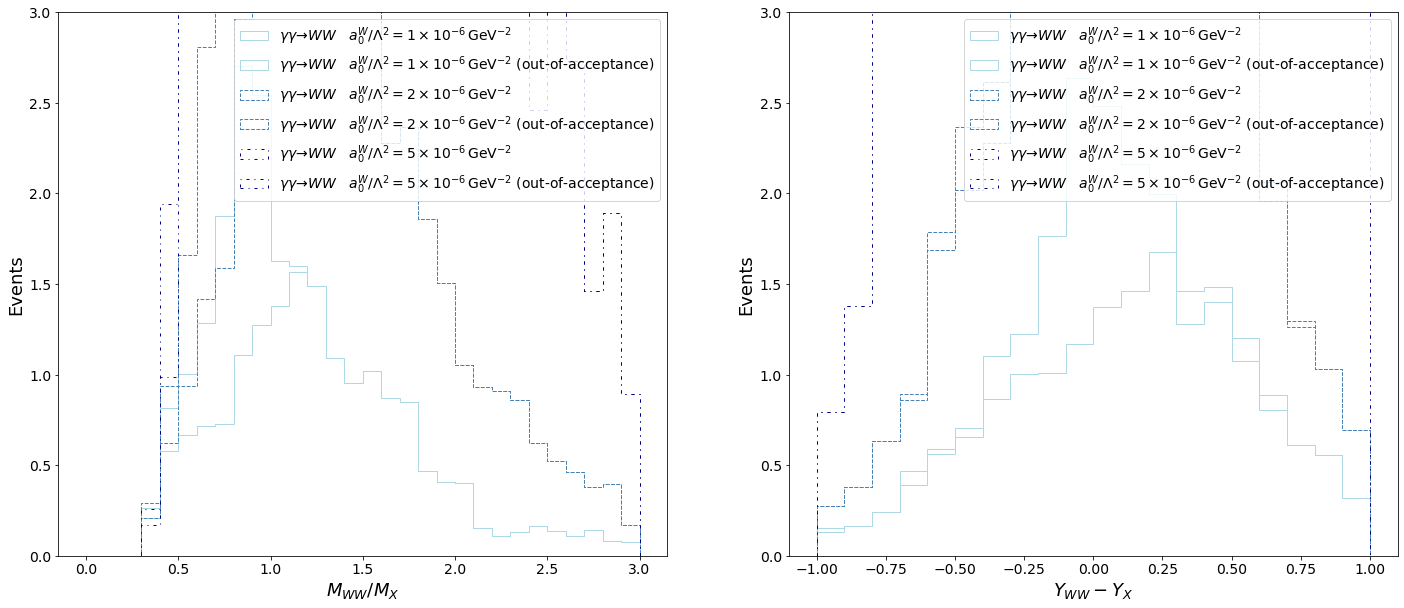

In [39]:
variation__ = "_nom"
var_str__ = {}
# var_str__[ "_nom" ] = "_nom_nom"
var_str__[ "_nom" ] = "_nom"
var_weights__ = "nom"

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )

colors_ = [ "lightblue", "steelblue", "darkblue", "royalblue" ]

linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]

for idx_, label_ in enumerate( labels_signals ):
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=30, range=(0.,3.) )
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=30, range=(0.,3.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=20, range=(-1.,1.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=14 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=14 )
    
axes[0].set_ylim( (0.,3.) )
axes[1].set_ylim( (0.,3.) )

if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Electron_2018.png", bbox_inches='tight' )

2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


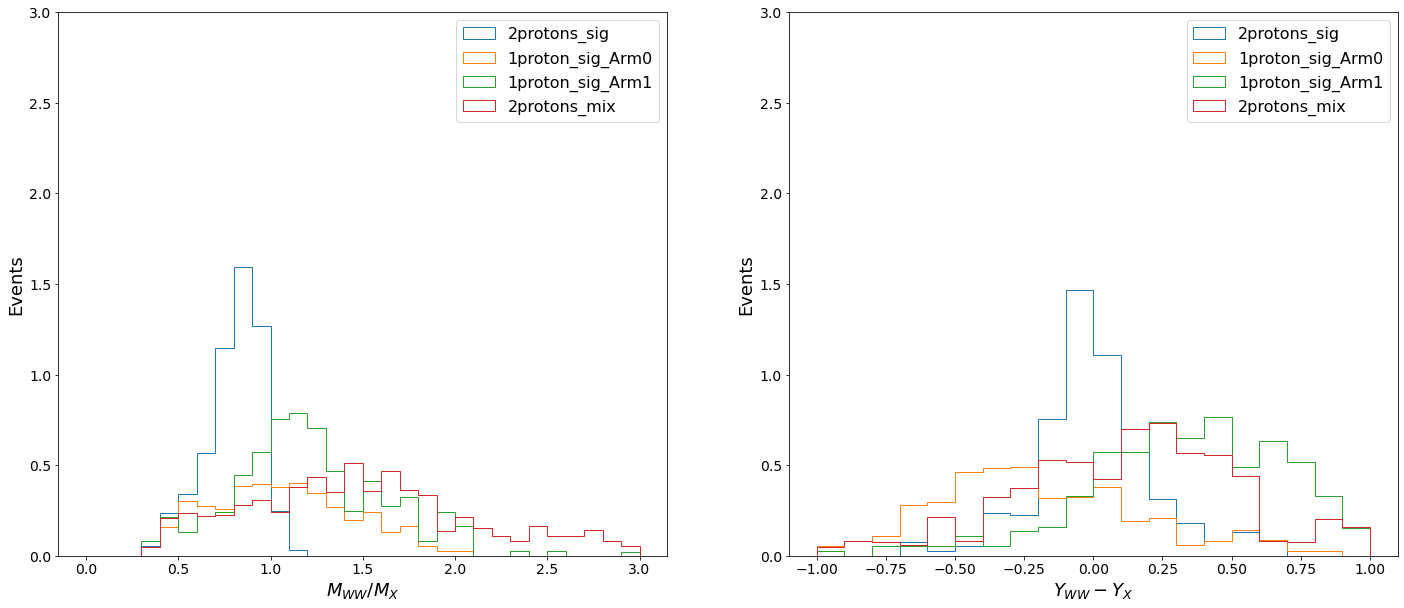

In [40]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )
for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
    print ( key_ )
    df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
    axes[0].hist( df_selected_events__[ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=30, range=(0.,3.) )
    axes[1].hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=16 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# plt.ylim( 0., 0.5 )
# plt.ylim( 0., 3. )
axes[0].set_ylim( 0., 3. )
axes[1].set_ylim( 0., 3. )

if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Electron_2018.png", bbox_inches='tight' )

GGToWW-AQGC-2018-electron-A0W1e-6
Number of events: 22.64382842016073 +/- 0.7859797418098102
Number of events (A): 14.68751538122831 +/- 0.6340032912318774
Number of events (B): 4.1242785956110275 +/- 0.334337914170166
Number of events (C): 2.7112275548177074 +/- 0.27193068551164373
Number of events (D): 1.1208068885036822 +/- 0.17342388148139629
0 0


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


GGToWW-AQGC-2018-electron-A0W2e-6
Number of events: 65.08024278521128 +/- 1.5116819650164848
Number of events (A): 48.39320979060933 +/- 1.3047852664552073
Number of events (B): 8.246908308140945 +/- 0.5363882307551944
Number of events (C): 7.148009026307529 +/- 0.5008964921548774
Number of events (D): 1.2921156601534676 +/- 0.210019384466687
0 1
GGToWW-AQGC-2018-electron-A0W5e-6
Number of events: 361.0462518374221 +/- 5.681978629711598
Number of events (A): 273.08016701221425 +/- 4.944788341634281
Number of events (B): 35.749914512544436 +/- 1.7768927824993248
Number of events (C): 47.35464685847614 +/- 2.05842033543277
Number of events (D): 4.861523454187284 +/- 0.6629533672255112
1 0


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


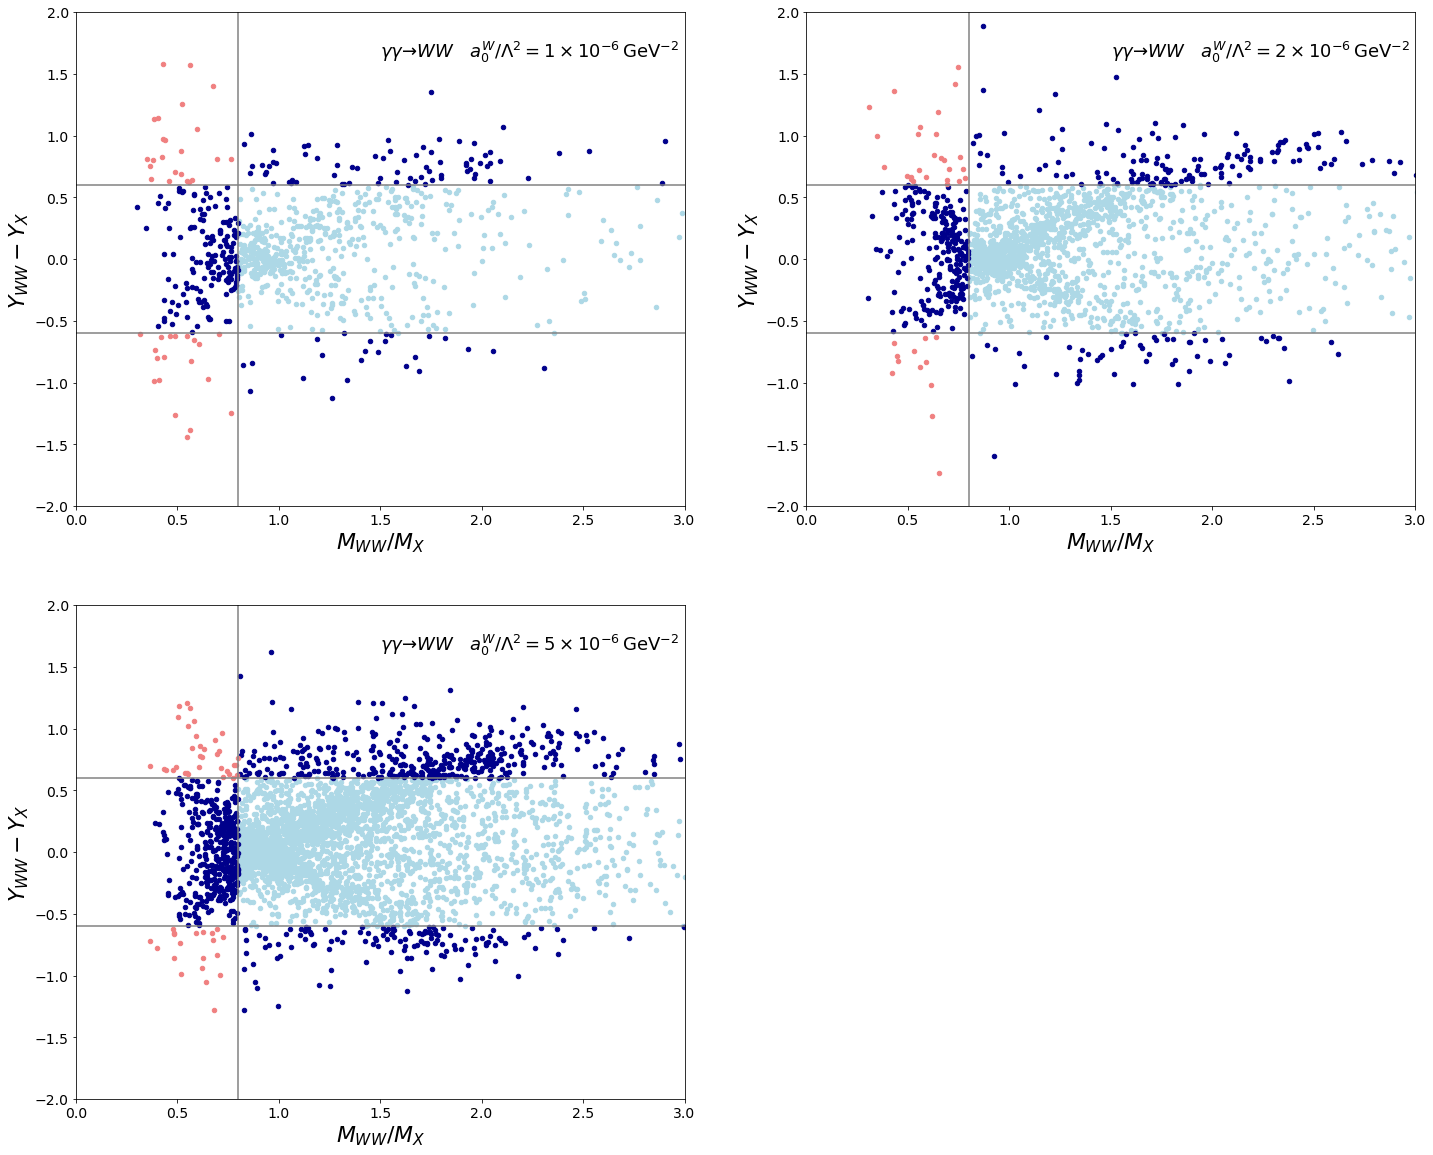

In [41]:
variation__ = "_nom"
var_weights__ = "nom"

nrows_ = ( int( len(labels_signals)/2 ) + 1 if ( len(labels_signals) % 2 ) > 0 else int( len(labels_signals)/2 ) )
fig, axes = plt.subplots( nrows_, 2, figsize=(2*12,nrows_*10) )

row_ = 0
col_ = 0
for label_ in labels_signals:
    print ( label_ )
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ]
    var1__ = ( "R_MWW_MX" + var_str__[ "_nom" ] )
    var2__ = ( "Diff_YWW_YX" + var_str__[ "_nom" ] )
    
    msk_sig_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_sig_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2
    msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2
    msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2
    msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2

    n_events_sig   = np.sum( weights__ )
    err_n_events_sig = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_sig_A = np.sum( weights__[ msk_sig_A ] )
    err_n_events_sig_A = np.sqrt( np.sum( weights__[ msk_sig_A ] ** 2 ) )
    n_events_sig_B = np.sum( weights__[ msk_sig_B ] )
    err_n_events_sig_B = np.sqrt( np.sum( weights__[ msk_sig_B ] ** 2 ) )
    n_events_sig_C = np.sum( weights__[ msk_sig_C ] )
    err_n_events_sig_C = np.sqrt( np.sum( weights__[ msk_sig_C ] ** 2 ) )
    n_events_sig_D = np.sum( weights__[ msk_sig_D ] )
    err_n_events_sig_D = np.sqrt( np.sum( weights__[ msk_sig_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    print ( row_, col_ )
    axes[ row_, col_ ].plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    if np.sum( msk_sig_A ) > 0:
        df__[ msk_sig_A ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightblue' )
    if np.sum( msk_sig_B ) > 0:
        df__[ msk_sig_B ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_C ) > 0:
        df__[ msk_sig_C ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_D ) > 0:
        df__[ msk_sig_D ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightcoral' )
    title_str_ = labels_samples[ label_ ]
    axes[ row_, col_ ].text( 0.50, 0.92, title_str_, horizontalalignment='left', verticalalignment='center', transform=axes[ row_, col_ ].transAxes, fontsize=18 )
    axes[ row_, col_ ].set_xlim(x_min, x_max)
    axes[ row_, col_ ].set_ylim(y_min, y_max)
    axes[ row_, col_ ].set_xlabel( r"$M_{WW} / M_{X}$", fontsize=22 )
    axes[ row_, col_ ].set_ylabel( r"$Y_{WW} - Y_{X}$", fontsize=22 )
    col_ += 1
    if col_ >= 2:
        row_ += 1
        col_  = 0
if col_ == 1: axes[ row_, col_ ].axis('off')
    
if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal-Electron_2018.png", bbox_inches='tight' )  

### Calculate uncertainties from variations

In [42]:
from scipy.interpolate import make_interp_spline

relative_uncertainty_ = True

vars_ = {}
vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 15
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
vars_[ "R_MWW_MX" ][ "bins" ]  = 0.6 + 0.2 * np.arange( 8 )
vars_[ "R_MWW_MX" ][ "range" ] = None
vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.6, 2. )
vars_[ "R_MWW_MX" ][ "xtitle" ]  = r"$M_{WW} / M_{X}$"
vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 10
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.2 * np.arange( 11 )
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.4 * np.arange( 6 )
vars_[ "Diff_YWW_YX" ][ "bins" ]  = -0.6 + 0.4 * np.arange( 4 )
vars_[ "Diff_YWW_YX" ][ "range" ] = None
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1., 1. )
vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -0.60, 0.60 )
vars_[ "Diff_YWW_YX" ][ "xtitle" ]  = r"$Y_{WW} - Y_{X}$"

# ylim_ = (0.,0.2)
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,3.)
# ylim_ = (0.,5.)

color_ = "darkblue"

def plot_uncertainties_variations(df_dict, weights_dict, variables, variations, selection_dict, scale_variation, label, var_info, ylim, ylim_ratio, color, relative_uncertainty):

    __df_dict = df_dict
    __weights_dict = weights_dict
    vars_ = variables
    __variations = variations
    sel_str__ = selection_dict
#     var_weights__ = var_weights
    scale_variation_=scale_variation
    label_ = label
    vars_ = var_info
    ylim_ = ylim
    color_ = color
    relative_uncertainty_ = relative_uncertainty

    max_ = {}
    min_ = {}
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    idx_row_ = 0
    idx_col_ = 0

    fig_, axes_ = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        max_[ var__ ] = None
        min_[ var__ ] = None
        for idx_, variation__ in enumerate( __variations ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr__ = df__[ var__ + __variation__ ]
                
                arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
                arr__ = arr__.loc[ msk__ ]
                weights__ = weights__.loc[ msk__ ]
                counts_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

                if max_[ var__ ] is None: max_[ var__ ] = counts_.copy()
                if min_[ var__ ] is None: min_[ var__ ] = counts_.copy()
                msk__ = counts_ > max_[ var__ ]
                max_[ var__ ][ msk__ ] = counts_[ msk__ ]
                msk__ = counts_ < min_[ var__ ]
                min_[ var__ ][ msk__ ] = counts_[ msk__ ]

        print ( max_[ var__ ] )
        print ( min_[ var__ ] )
        idx_row_ = 0
        df__ = __df_dict[ label_ ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes_[idx_row_,idx_col_].hist( arr__, 
                                                           weights=weights__,
                                                           histtype='step', color=color_, linestyle="-", label="_nom",
                                                           bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, max_[ var__ ], k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, min_[ var__ ], k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes_[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        # axes_[idx_row_,idx_col_].set_ylim( -1., 1. )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( max_, min_ )

In [43]:
def calculate_uncertainties_variations(df_dict, weights_dict, variations, selection_dict, scale_variation):
    
    __df_dict = df_dict
    __weights_dict = weights_dict
    variations_ = variations
    sel_str__ = selection_dict
    scale_variation_=scale_variation
    
    sum_weights_cut = {}
    sum_weights_squared_cut = {}
    sum_weights_cut_max = {}
    sum_weights_cut_min = {}
    for label_ in labels_signals:
        print ( label_ )
        sum_weights_cut_max_ = None
        sum_weights_cut_min_ = None
        for idx_, variation__ in enumerate( variations_ ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + __variation__ ]
                arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
                sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
                if sum_weights_cut_max_ is None:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut_min_ is None:
                    sum_weights_cut_min_ = sum_weights_cut__
                if sum_weights_cut__ > sum_weights_cut_max_:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut__ < sum_weights_cut_min_:
                    sum_weights_cut_min_ = sum_weights_cut__

        df__ = __df_dict[ label_ ][ "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        weights_squared__ = ( weights__ ** 2 )
        arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
        arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
        sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
        sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
        print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )
        print ( sum_weights_cut_max_ )
        print ( sum_weights_cut_min_ )
        sum_weights_cut[ label_ ] = sum_weights_cut__
        sum_weights_squared_cut[ label_ ] = sum_weights_squared_cut__
        sum_weights_cut_max[ label_ ] = sum_weights_cut_max_
        sum_weights_cut_min[ label_ ] = sum_weights_cut_min_

    print ( sum_weights_cut )
    print ( sum_weights_squared_cut )
    print ( sum_weights_cut_max )
    print ( sum_weights_cut_min )
    
    return ( sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min )

In [44]:
label_ref_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ref_ = "GGToWW-AQGC-A0W2e-6"
#         label_ref_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ref_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ref_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

#### JES

In [45]:
variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

# var_weights__ = "nom"

In [46]:
if plot_separate_syst_uncertainties:

    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.10,0.10)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [47]:
max_variations = {}
min_variations = {}
if plot_separate_syst_uncertainties:
    max_variations[ "jes" ] = max_
    min_variations[ "jes" ] = min_
    print ( max_variations )
    print ( min_variations )

In [48]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-electron-A0W1e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
14.68751538122831 ± 0.6340032912318774
14.803775443003541
14.608023803818481
GGToWW-AQGC-2018-electron-A0W2e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
48.39320979060933 ± 1.3047852664552073
48.673797300408516
48.05286889172977
GGToWW-AQGC-2018-electron-A0W5e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
273.08016701221425 ± 4.944788341634281
275.11880970236905
271.42882583903634
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.68751538122831, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.39320979060933, 'GGToWW-AQGC-2018-electron-A0W5e-6': 273.08016701221425}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 0.4019601732928527, 'GGToWW-AQGC-2018-electron-A0W2e-6': 1.702464591558586, 'GGToWW-AQGC-2018-electron-A0W5e-6': 24.450931743562304}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.803775443003541, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.673797300408516, 'GGToWW-AQGC-2018-electron-A0W5e-6': 275.11880970236905}
{'GGToWW-AQGC-2018-electron-A0W1e-6

In [49]:
sum_weights = {}
for label_ in labels_signals:
    sum_weights[ label_ ] = {}
    sum_weights[ label_ ][ "central" ]        = sum_weights_cut[ label_ ]
    sum_weights[ label_ ][ "stat" ]           = np.sqrt( sum_weights_squared_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_up_jes" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jes" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 14.68751538122831, 'stat': 0.6340032912318774, 'syst_up_jes': 0.11626006177523074, 'syst_dw_jes': -0.07949157740982926}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 48.39320979060933, 'stat': 1.3047852664552073, 'syst_up_jes': 0.280587509799183, 'syst_dw_jes': -0.3403408988795604}, 'GGToWW-AQGC-2018-electron-A0W5e-6': {'central': 273.08016701221425, 'stat': 4.944788341634281, 'syst_up_jes': 2.038642690154802, 'syst_dw_jes': -1.6513411731779115}}


#### JER

In [50]:
variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

In [51]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.10,0.10)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [52]:
if plot_separate_syst_uncertainties:
    max_variations[ "jer" ] = max_
    min_variations[ "jer" ] = min_
    print ( max_variations )
    print ( min_variations )

In [53]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-electron-A0W1e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
14.68751538122831 ± 0.6340032912318774
14.746694142642742
14.746458581697393
GGToWW-AQGC-2018-electron-A0W2e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
48.39320979060933 ± 1.3047852664552073
48.49489833015005
48.357923505865294
GGToWW-AQGC-2018-electron-A0W5e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
273.08016701221425 ± 4.944788341634281
273.3446142373697
272.6373120562398
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.68751538122831, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.39320979060933, 'GGToWW-AQGC-2018-electron-A0W5e-6': 273.08016701221425}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 0.4019601732928527, 'GGToWW-AQGC-2018-electron-A0W2e-6': 1.702464591558586, 'GGToWW-AQGC-2018-electron-A0W5e-6': 24.450931743562304}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.746694142642742, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.49489833015005, 'GGToWW-AQGC-2018-electron-A0W5e-6': 273.3446142373697}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 1

In [54]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_jer" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jer" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 14.68751538122831, 'stat': 0.6340032912318774, 'syst_up_jes': 0.11626006177523074, 'syst_dw_jes': -0.07949157740982926, 'syst_up_jer': 0.059178761414431236, 'syst_dw_jer': 0.05894320046908241}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 48.39320979060933, 'stat': 1.3047852664552073, 'syst_up_jes': 0.280587509799183, 'syst_dw_jes': -0.3403408988795604, 'syst_up_jer': 0.10168853954071722, 'syst_dw_jer': -0.035286284744039165}, 'GGToWW-AQGC-2018-electron-A0W5e-6': {'central': 273.08016701221425, 'stat': 4.944788341634281, 'syst_up_jes': 2.038642690154802, 'syst_dw_jes': -1.6513411731779115, 'syst_up_jer': 0.26444722515543617, 'syst_dw_jer': -0.4428549559744397}}


#### Lepton Id

In [55]:
variations_weights_ = []
if lepton_type == 'muon':
    variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
elif lepton_type == 'electron':
    variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

In [56]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.05,0.05)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [57]:
if plot_separate_syst_uncertainties:
    if lepton_type == 'muon':
        max_variations[ "sf_muon_id" ] = max_
        min_variations[ "sf_muon_id" ] = min_
    elif lepton_type == 'electron':
        max_variations[ "sf_electron_id" ] = max_
        min_variations[ "sf_electron_id" ] = min_
    print ( max_variations )
    print ( min_variations )

In [58]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-electron-A0W1e-6
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw
14.68751538122831 ± 0.6340032912318774
14.9915442336866
14.383486528770021
GGToWW-AQGC-2018-electron-A0W2e-6
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw
48.39320979060933 ± 1.3047852664552073
49.5402018622407
47.24621771897798
GGToWW-AQGC-2018-electron-A0W5e-6
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw
273.08016701221425 ± 4.944788341634281
280.55241552535995
265.60791849906855
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.68751538122831, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.39320979060933, 'GGToWW-AQGC-2018-electron-A0W5e-6': 273.08016701221425}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 0.4019601732928527, 'GGToWW-AQGC-2018-electron-A0W2e-6': 1.702464591558586, 'GGToWW-AQGC-2018-electron-A0W5e-6': 24.450931743562304}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.9915442336866, 'GGToWW-AQGC-2018-electron-A0W2e-6': 49.5402018622407, 'GGToWW-AQGC-2018-electron-A0W5e-6': 280.55241552535

In [59]:
for label_ in labels_signals:
    if lepton_type == 'muon':
        sum_weights[ label_ ][ "syst_up_sf_muon_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_muon_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
    elif lepton_type == 'electron':
        sum_weights[ label_ ][ "syst_up_sf_electron_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_electron_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 14.68751538122831, 'stat': 0.6340032912318774, 'syst_up_jes': 0.11626006177523074, 'syst_dw_jes': -0.07949157740982926, 'syst_up_jer': 0.059178761414431236, 'syst_dw_jer': 0.05894320046908241, 'syst_up_sf_electron_id': 0.3040288524582895, 'syst_dw_sf_electron_id': -0.3040288524582895}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 48.39320979060933, 'stat': 1.3047852664552073, 'syst_up_jes': 0.280587509799183, 'syst_dw_jes': -0.3403408988795604, 'syst_up_jer': 0.10168853954071722, 'syst_dw_jer': -0.035286284744039165, 'syst_up_sf_electron_id': 1.1469920716313666, 'syst_dw_sf_electron_id': -1.1469920716313524}, 'GGToWW-AQGC-2018-electron-A0W5e-6': {'central': 273.08016701221425, 'stat': 4.944788341634281, 'syst_up_jes': 2.038642690154802, 'syst_dw_jes': -1.6513411731779115, 'syst_up_jer': 0.26444722515543617, 'syst_dw_jer': -0.4428549559744397, 'syst_up_sf_electron_id': 7.472248513145701, 'syst_dw_sf_electron_id': -7.472248513145701}}

#### Trigger

In [60]:
variations_weights_ = []
if lepton_type == 'muon':
    variations_weights_ = [ "nom", "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
elif lepton_type == 'electron':
    variations_weights_ = [ "nom", "sf_electron_trigger_up", "sf_electron_trigger_dw" ]

In [61]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-electron-A0W1e-6
_nom
_nom
sf_electron_trigger_up
_nom
_nom
sf_electron_trigger_dw
14.68751538122831 ± 0.6340032912318774
14.70828670352375
14.66674405893287
GGToWW-AQGC-2018-electron-A0W2e-6
_nom
_nom
sf_electron_trigger_up
_nom
_nom
sf_electron_trigger_dw
48.39320979060933 ± 1.3047852664552073
48.46164848465651
48.32477109656217
GGToWW-AQGC-2018-electron-A0W5e-6
_nom
_nom
sf_electron_trigger_up
_nom
_nom
sf_electron_trigger_dw
273.08016701221425 ± 4.944788341634281
273.4663626793402
272.69397134508836
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.68751538122831, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.39320979060933, 'GGToWW-AQGC-2018-electron-A0W5e-6': 273.08016701221425}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 0.4019601732928527, 'GGToWW-AQGC-2018-electron-A0W2e-6': 1.702464591558586, 'GGToWW-AQGC-2018-electron-A0W5e-6': 24.450931743562304}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.70828670352375, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.46164848465651, 'GGToWW-AQGC-2018-el

In [62]:
for label_ in labels_signals:
    if lepton_type == 'muon':
        sum_weights[ label_ ][ "syst_up_sf_muon_trigger" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_muon_trigger" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
    elif lepton_type == 'electron':
        sum_weights[ label_ ][ "syst_up_sf_electron_trigger" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_electron_trigger" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 14.68751538122831, 'stat': 0.6340032912318774, 'syst_up_jes': 0.11626006177523074, 'syst_dw_jes': -0.07949157740982926, 'syst_up_jer': 0.059178761414431236, 'syst_dw_jer': 0.05894320046908241, 'syst_up_sf_electron_id': 0.3040288524582895, 'syst_dw_sf_electron_id': -0.3040288524582895, 'syst_up_sf_electron_trigger': 0.020771322295439987, 'syst_dw_sf_electron_trigger': -0.020771322295439987}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 48.39320979060933, 'stat': 1.3047852664552073, 'syst_up_jes': 0.280587509799183, 'syst_dw_jes': -0.3403408988795604, 'syst_up_jer': 0.10168853954071722, 'syst_dw_jer': -0.035286284744039165, 'syst_up_sf_electron_id': 1.1469920716313666, 'syst_dw_sf_electron_id': -1.1469920716313524, 'syst_up_sf_electron_trigger': 0.06843869404717395, 'syst_dw_sf_electron_trigger': -0.06843869404715974}, 'GGToWW-AQGC-2018-electron-A0W5e-6': {'central': 273.08016701221425, 'stat': 4.944788341634281, 'syst_up_jes': 2.0386

#### Prefiring

In [63]:
variations_weights_ = []
variations_weights_ = [ "nom", "sf_prefiring_up", "sf_prefiring_dw" ]

In [64]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-electron-A0W1e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
14.68751538122831 ± 0.6340032912318774
14.68751538122831
14.68751538122831
GGToWW-AQGC-2018-electron-A0W2e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
48.39320979060933 ± 1.3047852664552073
48.39320979060933
48.39320979060933
GGToWW-AQGC-2018-electron-A0W5e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
273.08016701221425 ± 4.944788341634281
273.08016701221425
273.08016701221425
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.68751538122831, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.39320979060933, 'GGToWW-AQGC-2018-electron-A0W5e-6': 273.08016701221425}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 0.4019601732928527, 'GGToWW-AQGC-2018-electron-A0W2e-6': 1.702464591558586, 'GGToWW-AQGC-2018-electron-A0W5e-6': 24.450931743562304}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.68751538122831, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.39320979060933, 'GGToWW-AQGC-2018-electron-A0W5e-6': 273.08016701221425}
{'GG

In [65]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_sf_prefiring" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_sf_prefiring" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 14.68751538122831, 'stat': 0.6340032912318774, 'syst_up_jes': 0.11626006177523074, 'syst_dw_jes': -0.07949157740982926, 'syst_up_jer': 0.059178761414431236, 'syst_dw_jer': 0.05894320046908241, 'syst_up_sf_electron_id': 0.3040288524582895, 'syst_dw_sf_electron_id': -0.3040288524582895, 'syst_up_sf_electron_trigger': 0.020771322295439987, 'syst_dw_sf_electron_trigger': -0.020771322295439987, 'syst_up_sf_prefiring': 0.0, 'syst_dw_sf_prefiring': 0.0}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 48.39320979060933, 'stat': 1.3047852664552073, 'syst_up_jes': 0.280587509799183, 'syst_dw_jes': -0.3403408988795604, 'syst_up_jer': 0.10168853954071722, 'syst_dw_jer': -0.035286284744039165, 'syst_up_sf_electron_id': 1.1469920716313666, 'syst_dw_sf_electron_id': -1.1469920716313524, 'syst_up_sf_electron_trigger': 0.06843869404717395, 'syst_dw_sf_electron_trigger': -0.06843869404715974, 'syst_up_sf_prefiring': 0.0, 'syst_dw_sf_prefiring': 0.0}, '

#### Proton momentum scale

In [66]:
labels_xi_ = [ "_nom", "_p100", "_m100" ]
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"
    
if plot_separate_syst_uncertainties:
    
    # vars_ = {}
    # vars_[ "R_MWW_MX" ] = {}
    # vars_[ "R_MWW_MX" ][ "bins" ]  = 30
    # vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
    # vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
    # # vars_[ "R_MWW_MX" ][ "bins" ]  = 0.5 + 0.2 * np.arange( 9 )
    # # vars_[ "R_MWW_MX" ][ "range" ] = None
    # # vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.5, 2.1 )
    # vars_[ "Diff_YWW_YX" ] = {}
    # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
    # vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
    # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
    # # vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1.1 + 0.2 * np.arange( 12 )
    # # vars_[ "Diff_YWW_YX" ][ "range" ] = None
    # # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1.1, 1.1 )

    # ylim_ = (0.,0.2)
    # ylim_ = (0.,0.5)
    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    # ylim_ = (0.,3.)
    # ylim_ = (0.,5.)
    ylim_ratio_ = (-0.50,0.50)

    color_ = "darkblue"

    relative_uncertainty_ = True

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    max_var_xi_ = {}
    min_var_xi_ = {}
    max_var_xi_["arm0"] = max_
    min_var_xi_["arm0"] = min_

In [67]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_scale_arm0" ] = max_
    min_variations[ "proton_scale_arm0" ] = min_
    print ( max_variations )
    print ( min_variations )

In [68]:
variations_ = []

for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"
    
if plot_separate_syst_uncertainties:
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    max_var_xi_["arm1"] = max_
    min_var_xi_["arm1"] = min_

In [69]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_scale_arm1" ] = max_
    min_variations[ "proton_scale_arm1" ] = min_
    print ( max_variations )
    print ( min_variations )

In [70]:
if plot_separate_syst_uncertainties:
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    label_ = label_ref_
    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
        weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes[idx_row_,idx_col_].hist( arr__,
                                                          weights=weights__,
                                                          histtype='step', color=color_, linestyle="-", label="_nom",
                                                          bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        __max__ = ( counts_ +
                    np.sqrt( ( max_var_xi_[ "arm0" ][ var__ ] - counts_ ) ** 2 +
                             ( max_var_xi_[ "arm1" ][ var__ ] - counts_ ) ** 2 ) )
        __min__ = ( counts_ -
                    np.sqrt( ( counts_ - min_var_xi_[ "arm0" ][ var__ ] ) ** 2 +
                             ( counts_ - min_var_xi_[ "arm1" ][ var__ ] ) ** 2 ) )
        print ( __max__ )
        print ( __min__ )

        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1

In [71]:
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_p100_nom', '_m100_nom']
{'_nom_nom': '_nom', '_p100_nom': '_nom', '_m100_nom': '_nom'}
GGToWW-AQGC-2018-electron-A0W1e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
14.68751538122831 ± 0.6340032912318774
15.074230106986967
14.130678186499253
GGToWW-AQGC-2018-electron-A0W2e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
48.39320979060933 ± 1.3047852664552073
48.930991112739235
46.9023867295884
GGToWW-AQGC-2018-electron-A0W5e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
273.08016701221425 ± 4.944788341634281
277.79958153864504
266.4562471553328
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.68751538122831, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.39320979060933, 'GGToWW-AQGC-2018-electron-A0W5e-6': 273.08016701221425}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 0.4019601732928527, 'GGToWW-AQGC-2018-electron-A0W2e-6': 1.702464591558586, 'GGToWW-AQGC-2018-electron-A0W5e-6': 24.450931743562304}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 15.074230106986967, '

In [72]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 14.68751538122831, 'stat': 0.6340032912318774, 'syst_up_jes': 0.11626006177523074, 'syst_dw_jes': -0.07949157740982926, 'syst_up_jer': 0.059178761414431236, 'syst_dw_jer': 0.05894320046908241, 'syst_up_sf_electron_id': 0.3040288524582895, 'syst_dw_sf_electron_id': -0.3040288524582895, 'syst_up_sf_electron_trigger': 0.020771322295439987, 'syst_dw_sf_electron_trigger': -0.020771322295439987, 'syst_up_sf_prefiring': 0.0, 'syst_dw_sf_prefiring': 0.0, 'syst_up_proton_scale_arm0': 0.3867147257586563, 'syst_dw_proton_scale_arm0': -0.5568371947290576}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 48.39320979060933, 'stat': 1.3047852664552073, 'syst_up_jes': 0.280587509799183, 'syst_dw_jes': -0.3403408988795604, 'syst_up_jer': 0.10168853954071722, 'syst_dw_jer': -0.035286284744039165, 'syst_up_sf_electron_id': 1.1469920716313666, 'syst_dw_sf_electron_id': -1.1469920716313524, 'syst_up_sf_electron_trigger': 0.06843869404717395, 'syst_dw_sf_el

In [73]:
variations_ = []
for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_nom_p100', '_nom_m100']
{'_nom_nom': '_nom', '_nom_p100': '_nom', '_nom_m100': '_nom'}
GGToWW-AQGC-2018-electron-A0W1e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
14.68751538122831 ± 0.6340032912318774
15.321506189403427
14.046509943153241
GGToWW-AQGC-2018-electron-A0W2e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
48.39320979060933 ± 1.3047852664552073
49.332983278757006
47.09064487137685
GGToWW-AQGC-2018-electron-A0W5e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
273.08016701221425 ± 4.944788341634281
281.0402620563235
264.2170042598458
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.68751538122831, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.39320979060933, 'GGToWW-AQGC-2018-electron-A0W5e-6': 273.08016701221425}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 0.4019601732928527, 'GGToWW-AQGC-2018-electron-A0W2e-6': 1.702464591558586, 'GGToWW-AQGC-2018-electron-A0W5e-6': 24.450931743562304}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 15.321506189403427, '

In [74]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 14.68751538122831, 'stat': 0.6340032912318774, 'syst_up_jes': 0.11626006177523074, 'syst_dw_jes': -0.07949157740982926, 'syst_up_jer': 0.059178761414431236, 'syst_dw_jer': 0.05894320046908241, 'syst_up_sf_electron_id': 0.3040288524582895, 'syst_dw_sf_electron_id': -0.3040288524582895, 'syst_up_sf_electron_trigger': 0.020771322295439987, 'syst_dw_sf_electron_trigger': -0.020771322295439987, 'syst_up_sf_prefiring': 0.0, 'syst_dw_sf_prefiring': 0.0, 'syst_up_proton_scale_arm0': 0.3867147257586563, 'syst_dw_proton_scale_arm0': -0.5568371947290576, 'syst_up_proton_scale_arm1': 0.6339908081751169, 'syst_dw_proton_scale_arm1': -0.6410054380750694}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 48.39320979060933, 'stat': 1.3047852664552073, 'syst_up_jes': 0.280587509799183, 'syst_dw_jes': -0.3403408988795604, 'syst_up_jer': 0.10168853954071722, 'syst_dw_jer': -0.035286284744039165, 'syst_up_sf_electron_id': 1.1469920716313666, 'syst_dw_sf_el

In [75]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale" ]    =  np.sqrt( sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ] ** 2 )
    sum_weights[ label_ ][ "syst_dw_proton_scale" ]    = -np.sqrt( sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ] ** 2 )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 14.68751538122831, 'stat': 0.6340032912318774, 'syst_up_jes': 0.11626006177523074, 'syst_dw_jes': -0.07949157740982926, 'syst_up_jer': 0.059178761414431236, 'syst_dw_jer': 0.05894320046908241, 'syst_up_sf_electron_id': 0.3040288524582895, 'syst_dw_sf_electron_id': -0.3040288524582895, 'syst_up_sf_electron_trigger': 0.020771322295439987, 'syst_dw_sf_electron_trigger': -0.020771322295439987, 'syst_up_sf_prefiring': 0.0, 'syst_dw_sf_prefiring': 0.0, 'syst_up_proton_scale_arm0': 0.3867147257586563, 'syst_dw_proton_scale_arm0': -0.5568371947290576, 'syst_up_proton_scale_arm1': 0.6339908081751169, 'syst_dw_proton_scale_arm1': -0.6410054380750694, 'syst_up_proton_scale': 0.7426254937511442, 'syst_dw_proton_scale': -0.8490910628875669}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 48.39320979060933, 'stat': 1.3047852664552073, 'syst_up_jes': 0.280587509799183, 'syst_dw_jes': -0.3403408988795604, 'syst_up_jer': 0.10168853954071722, 'syst_dw_

#### Proton efficiency

In [76]:
variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

In [77]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.05,0.05)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [78]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_eff" ] = max_
    min_variations[ "proton_eff" ] = min_
    print ( max_variations )
    print ( min_variations )

In [79]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-electron-A0W1e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
14.68751538122831 ± 0.6340032912318774
14.898213806643726
14.476816955812897
GGToWW-AQGC-2018-electron-A0W2e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
48.39320979060933 ± 1.3047852664552073
49.06049671204035
47.72592286917832
GGToWW-AQGC-2018-electron-A0W5e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
273.08016701221425 ± 4.944788341634281
276.6491187704145
269.511215254014
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.68751538122831, 'GGToWW-AQGC-2018-electron-A0W2e-6': 48.39320979060933, 'GGToWW-AQGC-2018-electron-A0W5e-6': 273.08016701221425}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 0.4019601732928527, 'GGToWW-AQGC-2018-electron-A0W2e-6': 1.702464591558586, 'GGToWW-AQGC-2018-electron-A0W5e-6': 24.450931743562304}
{'GGToWW-AQGC-2018-electron-A0W1e-6': 14.898213806643726, 'GGToWW-AQGC-2018-electron-A0W2e-6': 49.06049671204035, 'GGToWW-AQGC-2018-electron-A0W5e-6': 276.6491187704145}
{'GGToWW-AQGC-201

In [80]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_eff" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_eff" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 14.68751538122831, 'stat': 0.6340032912318774, 'syst_up_jes': 0.11626006177523074, 'syst_dw_jes': -0.07949157740982926, 'syst_up_jer': 0.059178761414431236, 'syst_dw_jer': 0.05894320046908241, 'syst_up_sf_electron_id': 0.3040288524582895, 'syst_dw_sf_electron_id': -0.3040288524582895, 'syst_up_sf_electron_trigger': 0.020771322295439987, 'syst_dw_sf_electron_trigger': -0.020771322295439987, 'syst_up_sf_prefiring': 0.0, 'syst_dw_sf_prefiring': 0.0, 'syst_up_proton_scale_arm0': 0.3867147257586563, 'syst_dw_proton_scale_arm0': -0.5568371947290576, 'syst_up_proton_scale_arm1': 0.6339908081751169, 'syst_dw_proton_scale_arm1': -0.6410054380750694, 'syst_up_proton_scale': 0.7426254937511442, 'syst_dw_proton_scale': -0.8490910628875669, 'syst_up_proton_eff': 0.2106984254154156, 'syst_dw_proton_eff': -0.21069842541541384}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 48.39320979060933, 'stat': 1.3047852664552073, 'syst_up_jes': 0.280587509799

In [81]:
if plot_separate_syst_uncertainties:
    color_ = "darkblue"

    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.50,0.50)

    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    variation_name_lepton_id_ = ""
    if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
    elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"

    label_ = label_ref_
    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
        weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ), bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )

        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    #     axes[idx_row_,idx_col_].errorbar( bin_centers_, sum_w_, yerr=np.sqrt( sum_w2_ ),
    #                                       color=color_, fmt='o', label="_nom" )

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    #     x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 100 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
    #     axes[idx_row_,idx_col_].plot( x_plot__, spline_max_err_arr_[ var__ ], color=color_, linestyle="--" )
    #     axes[idx_row_,idx_col_].plot( x_plot__, spline_min_err_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1

### Total uncertainties

In [82]:
def plot_total_systematic( df_dict, weights_dict, lepton_type, label, ylim, ylim_ratio, color ):

    lepton_type_ = lepton_type
    label_ = label
    ylim_ = ylim
    ylim_ratio_ = ylim_ratio
    color_ = color
    
    # JES
    variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    relative_uncertainty_ = True

    __max_variations = {}
    __min_variations = {}
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)
    
    __max_variations[ "jes" ] = max_
    __min_variations[ "jes" ] = min_
    
    # JER
    variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "jer" ] = max_
    __min_variations[ "jer" ] = min_
    
    # Lepton Id
    variations_weights_ = []
    if lepton_type_ == 'muon':
        variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
    elif lepton_type_ == 'electron':
        variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    variation_name_lepton_id_ = ""
    if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
    elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"

    __max_variations[ variation_name_lepton_id_ ] = max_
    __min_variations[ variation_name_lepton_id_ ] = min_

    # Trigger
    variations_weights_ = []
    if lepton_type_ == 'muon':
        variations_weights_ = [ "nom", "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
    elif lepton_type_ == 'electron':
        variations_weights_ = [ "nom", "sf_electron_trigger_up", "sf_electron_trigger_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    variation_name_trigger_ = ""
    if lepton_type == 'muon': variation_name_trigger_ =  "sf_muon_trigger"
    elif lepton_type == 'electron': variation_name_trigger_ =  "sf_electron_trigger"

    __max_variations[ variation_name_trigger_ ] = max_
    __min_variations[ variation_name_trigger_ ] = min_
    
    # Prefiring
    variations_weights_ = [ "nom", "sf_prefiring_up", "sf_prefiring_dw" ]
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "sf_prefiring" ] = max_
    __min_variations[ "sf_prefiring" ] = min_

    # Proton momentum scale
    labels_xi_ = [ "_nom", "_p100", "_m100" ]
    variations_ = []
    for label0_ in labels_xi_:
        for label1_ in [ "_nom" ]:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm0" ] = max_
    __min_variations[ "proton_scale_arm0" ] = min_

    variations_ = []
    for label0_ in [ "_nom" ]:
        for label1_ in labels_xi_:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm1" ] = max_
    __min_variations[ "proton_scale_arm1" ] = min_

    # Proton efficiency
    variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_eff" ] = max_
    __min_variations[ "proton_eff" ] = min_

    print ( __max_variations )
    print ( __min_variations )
    
    # Total uncertainties
    
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    counts__ = {}
    err__ = {}
    bins__ = {}
    max_variations_total__ = {}
    min_variations_total__ = {}
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_dict[ label_ ][ "_nom" ]
        weights__ = weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                    bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( __max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ variation_name_trigger_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "sf_prefiring" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - __min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ variation_name_trigger_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "sf_prefiring" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )
        counts__[ var__ ] = sum_w_
        err__[ var__ ] = np.sqrt( sum_w2_ )
        bins__[ var__ ] = bins_
        max_variations_total__[ var__ ] = __max__
        min_variations_total__[ var__ ] = __min__
        
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        
        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( counts__, err__, bins__, max_variations_total__, min_variations_total__ )

In [83]:
counts = {}
err = {}
bins = {}
max_variations_total = {}
min_variations_total = {}

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[3.01401667 4.81585572 2.93077055 2.29050046 1.63611426 1.19134415
 0.52605824]
[2.96426386 4.78599447 2.90323569 2.26967208 1.54969334 1.19134415
 0.52605824]
0      0.017581
1      0.016093
2      0.014756
3      0.013547
4      0.012450
         ...   
195   -0.011112
196   -0.008981
197   -0.006461
198   -0.003492
199    0.000000
Length: 200, dtype: float64 0.01063579871542665
0      0.000784
1      0.000281
2     -0.000174
3     -0.000588
4     -0.000966
         ...   
195    0.000199
196    0.000161
197    0.000116
198    0.000063
199    0.000000
Length: 200, dtype: float64 -0.0023234742136528617
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[3.70546759 9.10054373 6.12036841]
[3.68408751 9.02070953 6.11889318]
0      0.022787
1      0.022198
2      0.021643
3      0.021117
4      0.020620
         ...   
195   -0.003059
196   -0.003257
197   -0.003460
198   -0.003670
199   -0.003885
Length: 

0      0.030689
1      0.029814
2      0.028993
3      0.028222
4      0.027496
         ...   
195    0.052110
196    0.053080
197    0.054081
198    0.055114
199    0.056180
Length: 200, dtype: float64 0.023884209908730636
0     -0.041491
1     -0.040605
2     -0.039768
3     -0.038977
4     -0.038227
         ...   
195   -0.001353
196   -0.001029
197   -0.000696
198   -0.000353
199    0.000000
Length: 200, dtype: float64 -0.01710075835167823
GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[3.01920244 4.92283997 2.97601368 2.29716689 1.56481357 1.20075233
 0.5278015 ]
[2.90468078 4.70887148 2.88552742 2.23276812 1.5345731  1.18193598
 0.52431498]
0      0.019332
1      0.019710
2      0.020045
3      0.020343
4      0.020610
         ...   
195    0.004664
196    0.004377
197    0.004060
198    0.003708
199    0.003314
Length: 200, dtype: float64 0.013782893495307907
0     -0.019332
1     -0.019710
2     -0.020045
3     -0.020343
4     -0.0

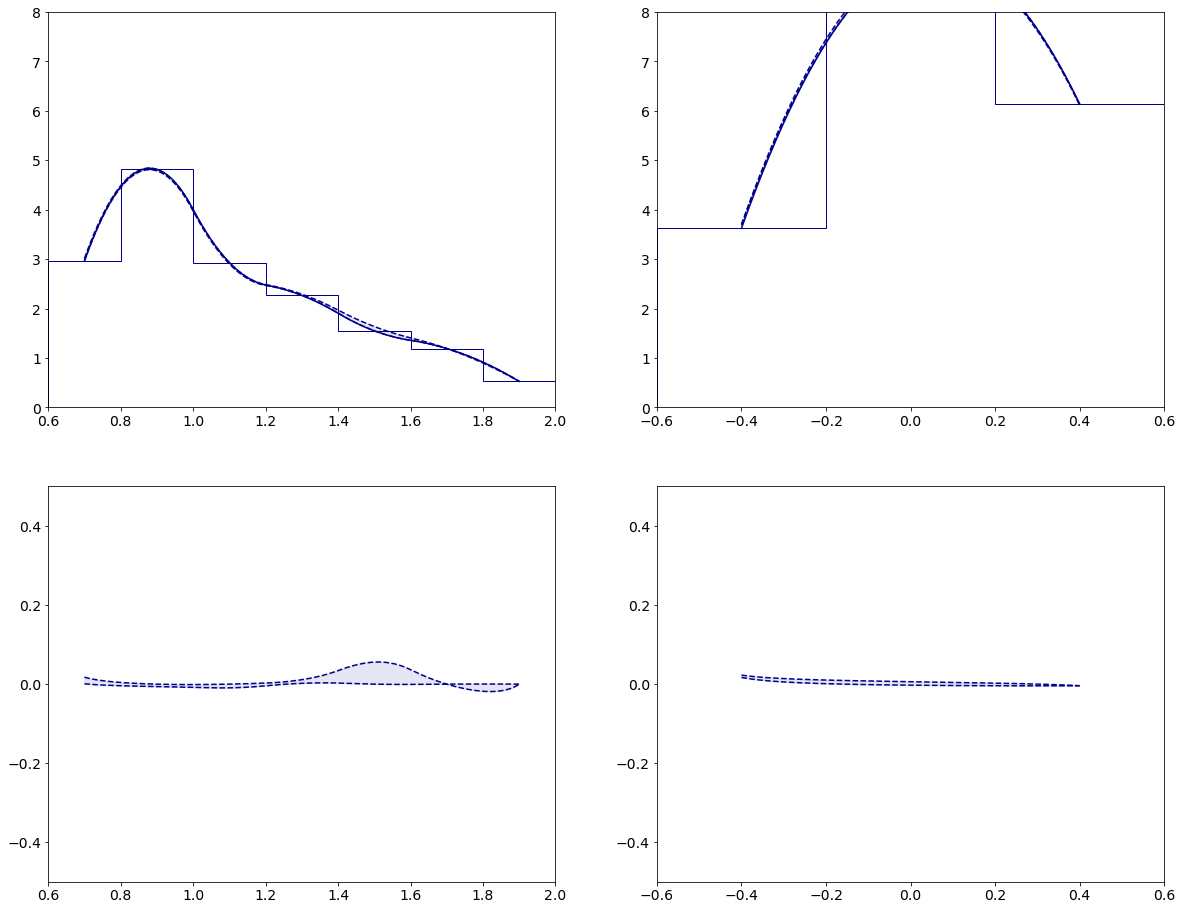

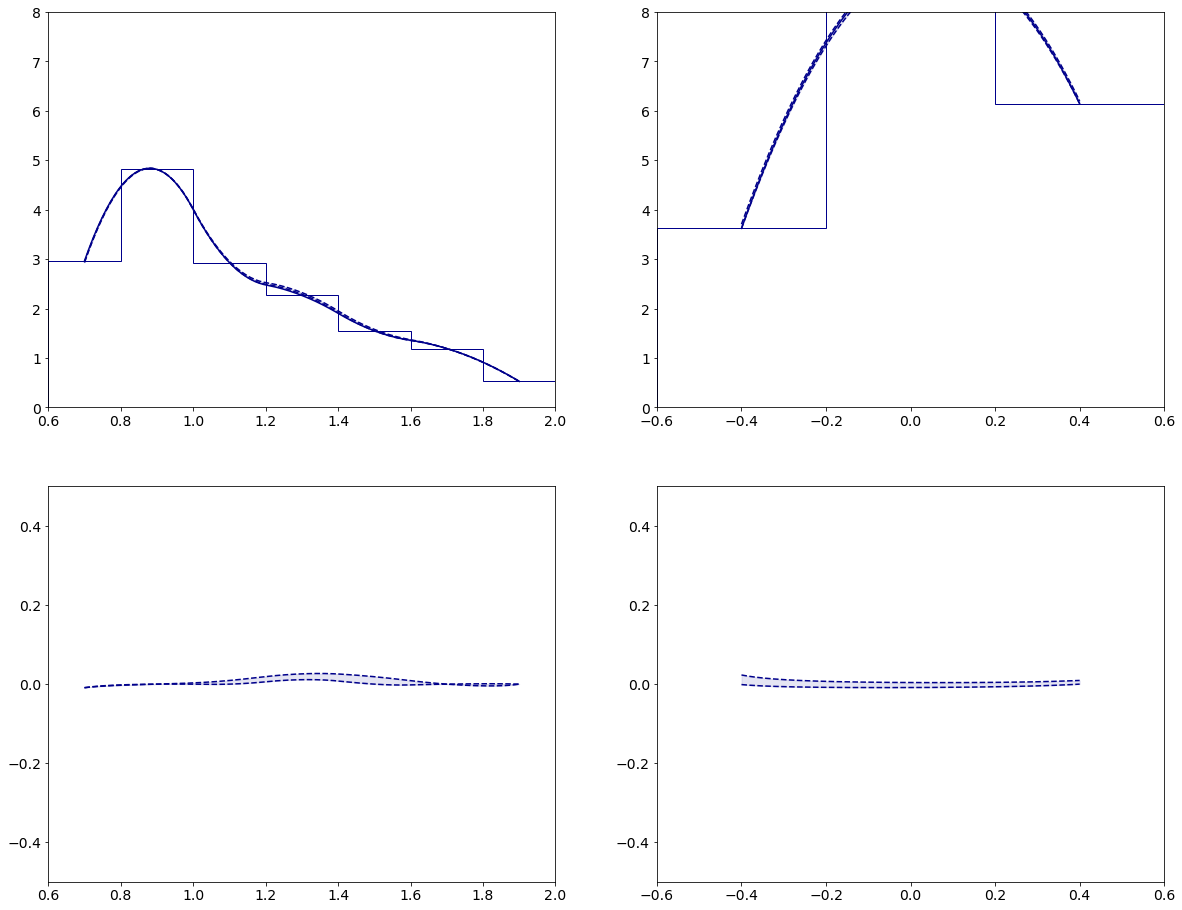

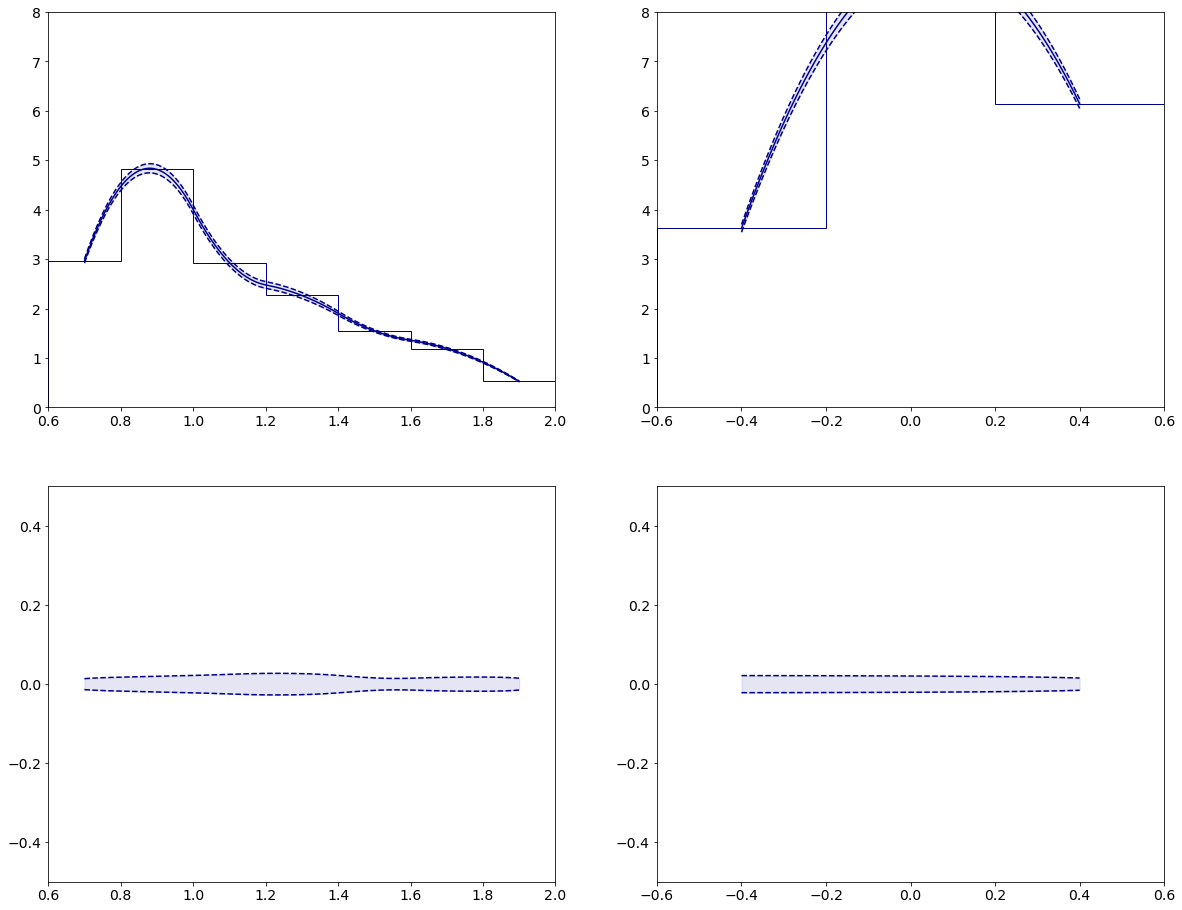

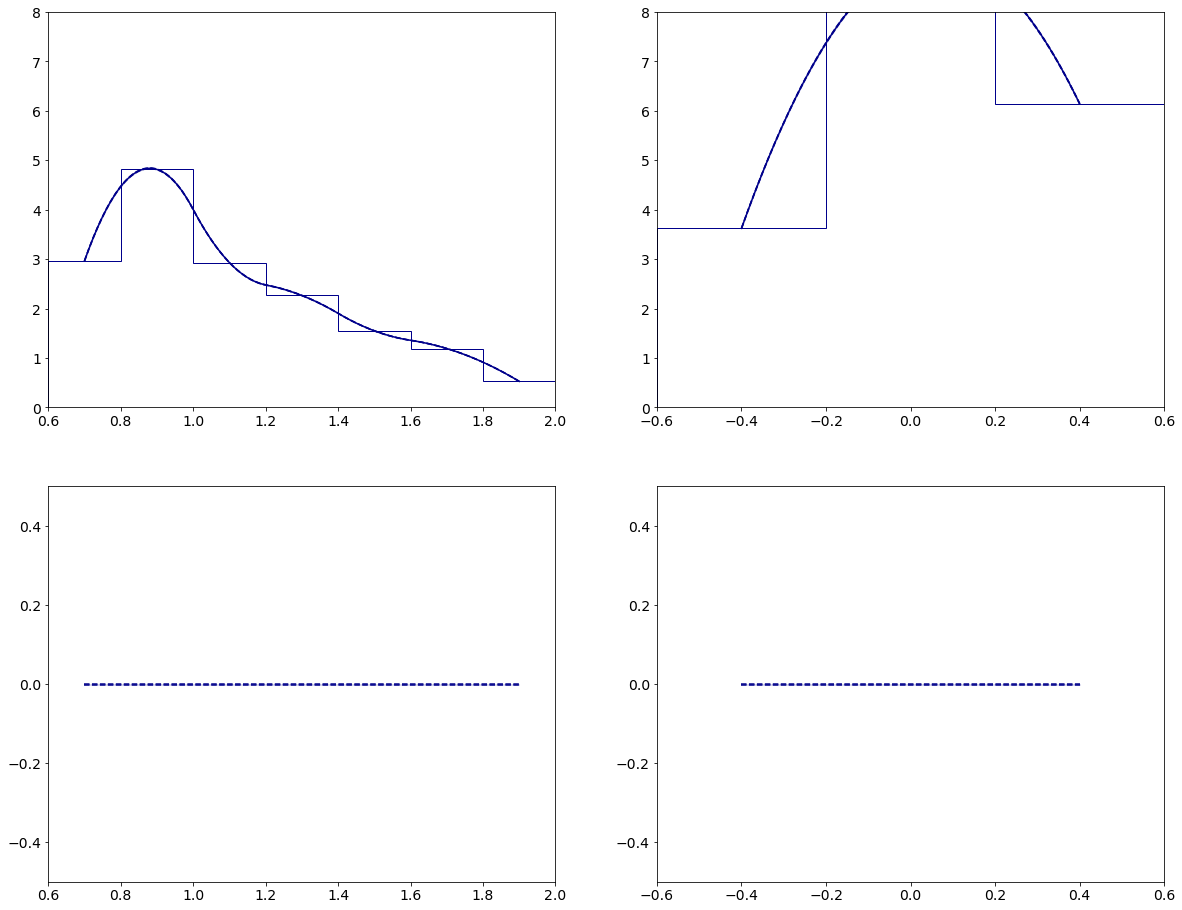

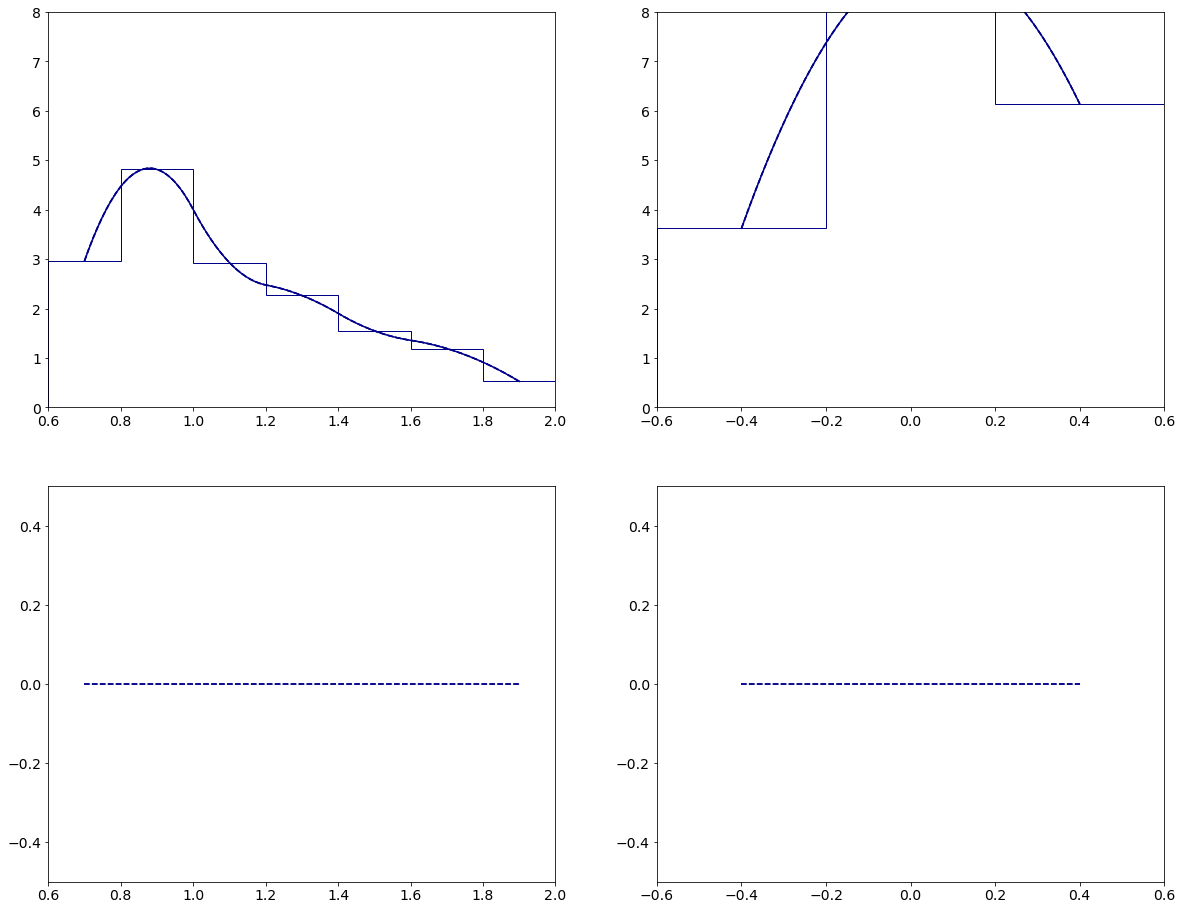

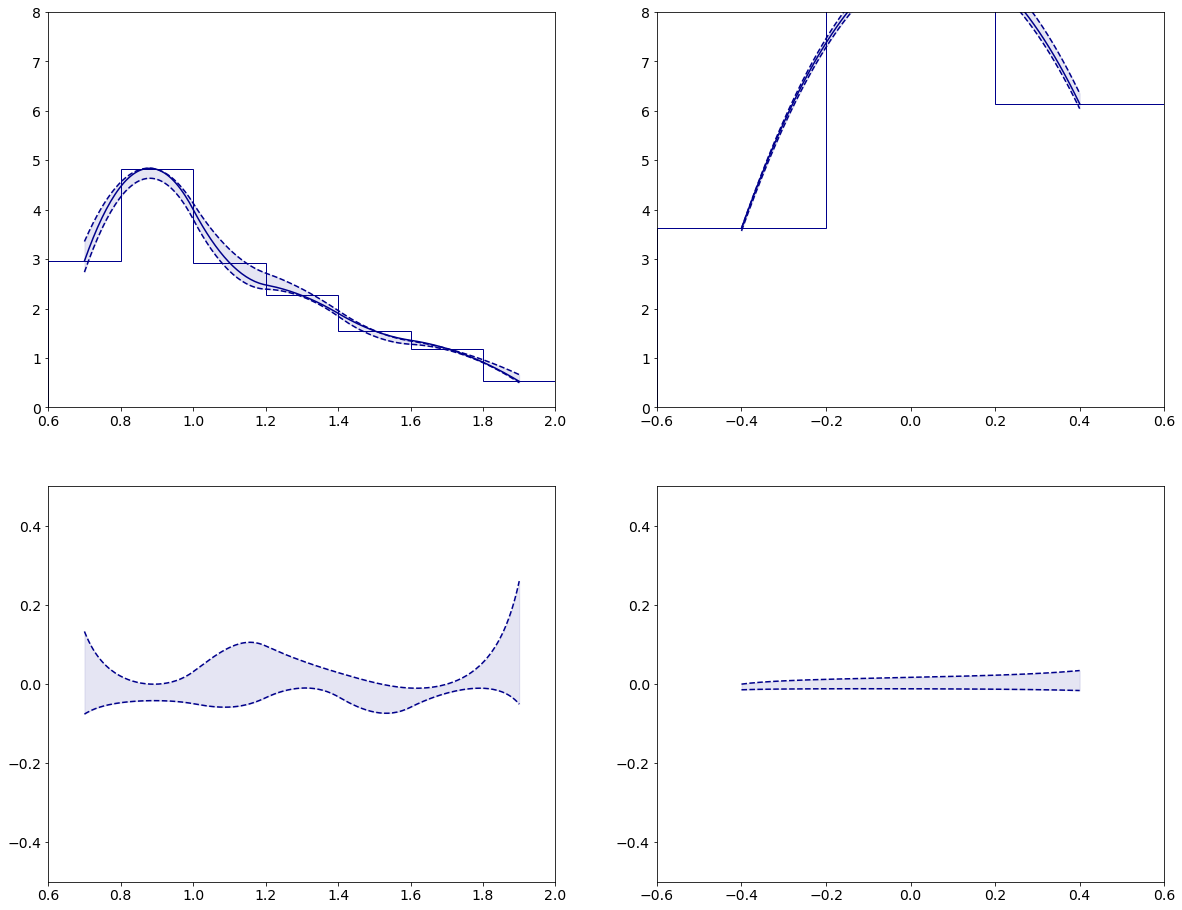

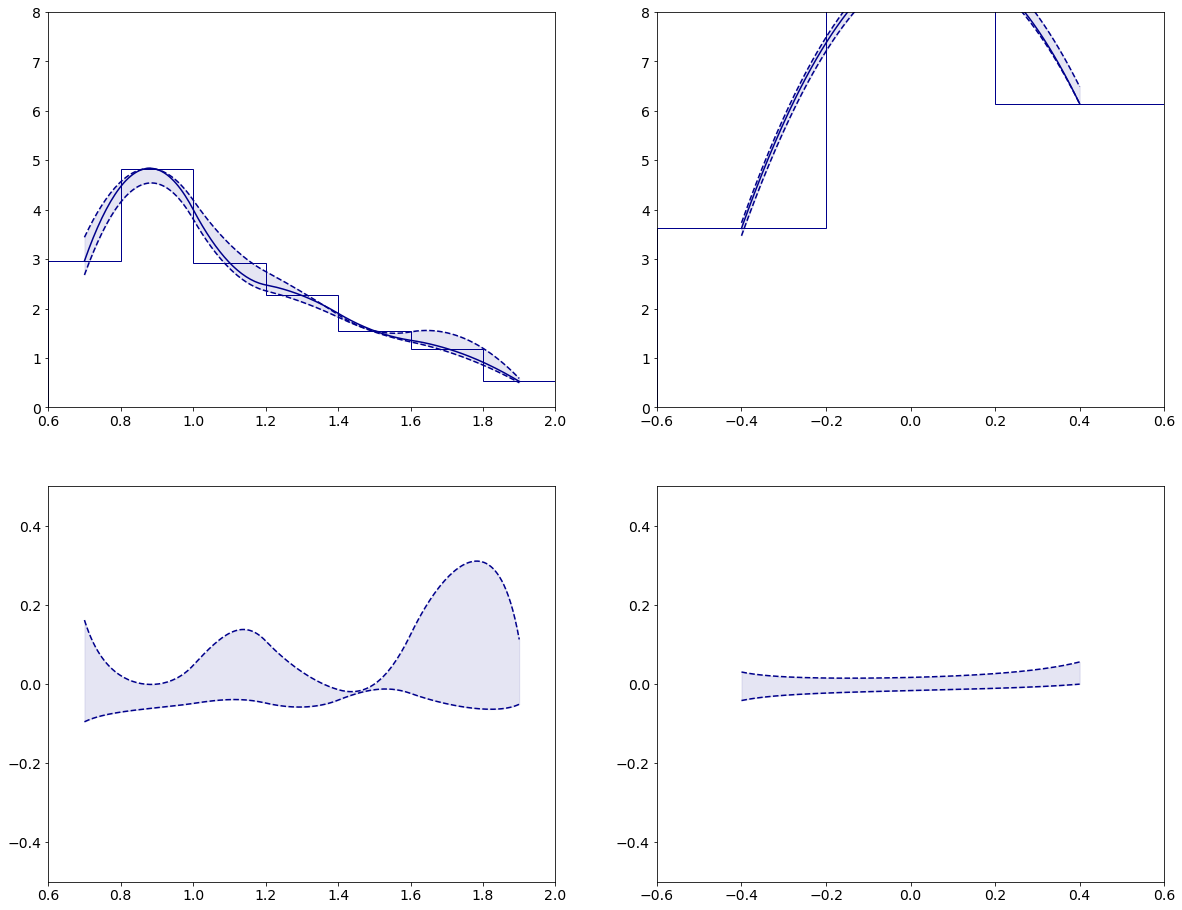

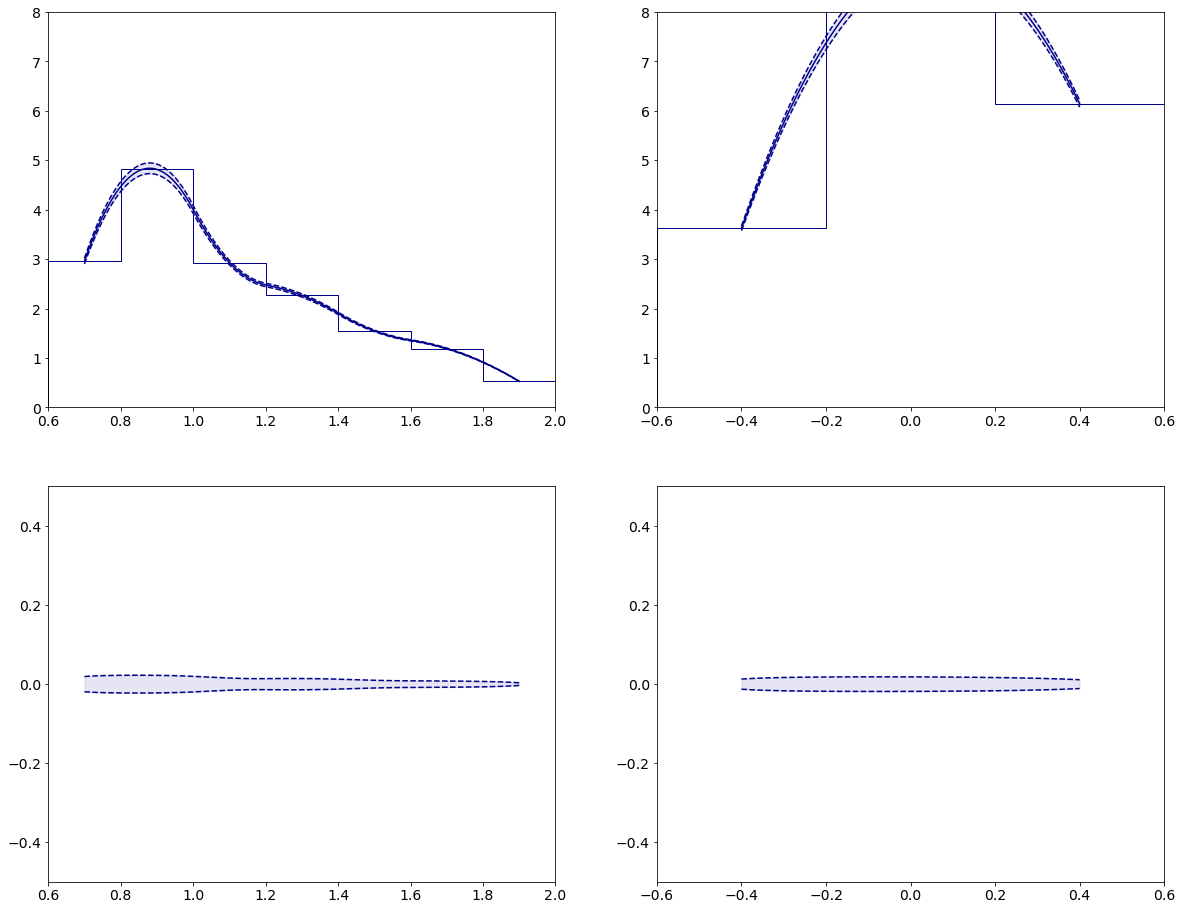

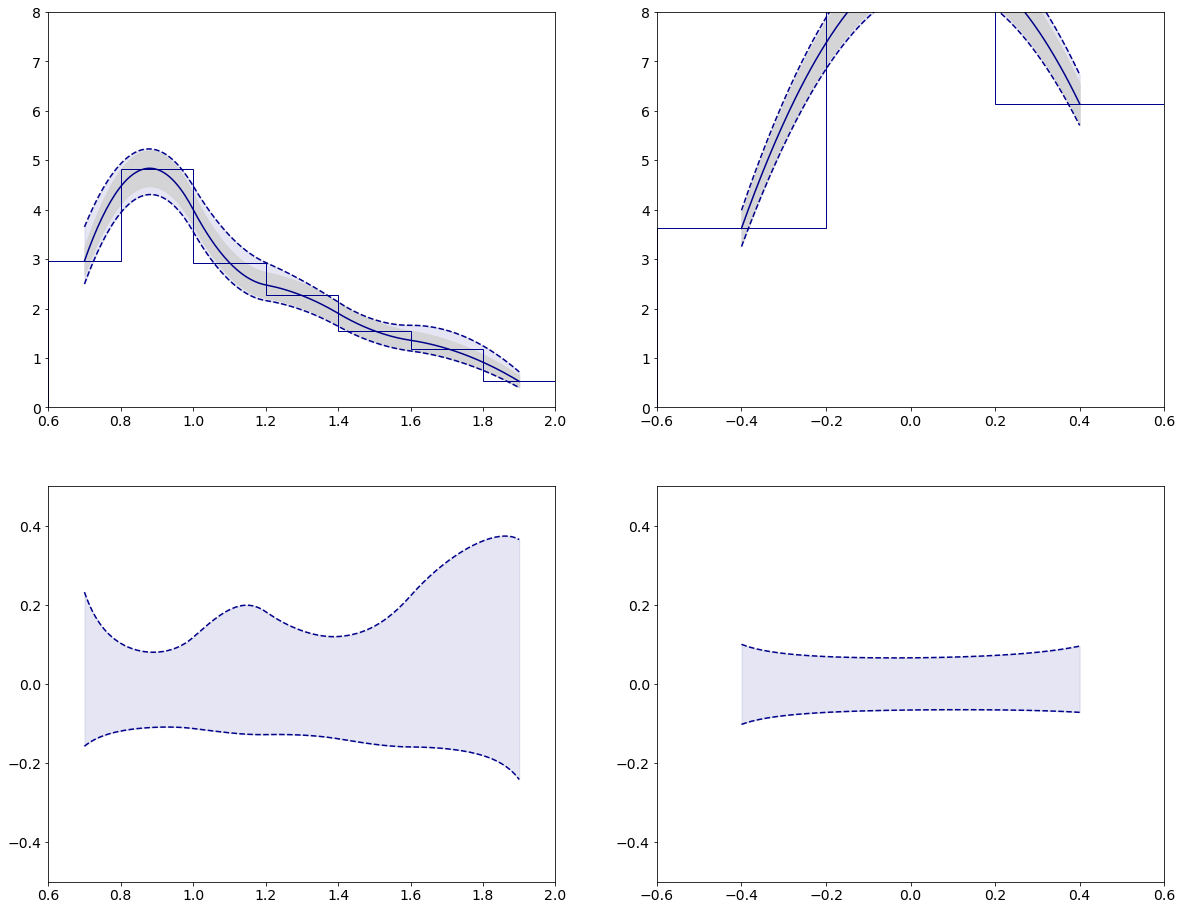

In [84]:
if data_sample == '2018':
    # ylim_ = (0.,0.3)
    ylim_ = (0.,8.)
    ylim_ratio_ = (-0.50,0.50)
    color_ = "darkblue"

    counts = {}
    err = {}
    bins = {}
    max_variations_total = {}
    min_variations_total = {}

    label_ = ""
    coupling_str_ = "A0W1e-6"
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

    counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        lepton_type=lepton_type,
        label=label_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_
        )

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[3.01401667 4.81585572 2.93077055 2.29050046 1.63611426 1.19134415
 0.52605824]
[2.96426386 4.78599447 2.90323569 2.26967208 1.54969334 1.19134415
 0.52605824]
0      0.017581
1      0.016093
2      0.014756
3      0.013547
4      0.012450
         ...   
195   -0.011112
196   -0.008981
197   -0.006461
198   -0.003492
199    0.000000
Length: 200, dtype: float64 0.01063579871542665
0      0.000784
1      0.000281
2     -0.000174
3     -0.000588
4     -0.000966
         ...   
195    0.000199
196    0.000161
197    0.000116
198    0.000063
199    0.000000
Length: 200, dtype: float64 -0.0023234742136528617
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[3.70546759 9.10054373 6.12036841]
[3.68408751 9.02070953 6.11889318]
0      0.022787
1      0.022198
2      0.021643
3      0.021117
4      0.020620
         ...   
195   -0.003059
196   -0.003257
197   -0.003460
198   -0.003670
199   -0.003885
Length: 

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[3.01920244 4.92283997 2.97601368 2.29716689 1.56481357 1.20075233
 0.5278015 ]
[2.90468078 4.70887148 2.88552742 2.23276812 1.5345731  1.18193598
 0.52431498]
0      0.019332
1      0.019710
2      0.020045
3      0.020343
4      0.020610
         ...   
195    0.004664
196    0.004377
197    0.004060
198    0.003708
199    0.003314
Length: 200, dtype: float64 0.013782893495307907
0     -0.019332
1     -0.019710
2     -0.020045
3     -0.020343
4     -0.020610
         ...   
195   -0.004664
196   -0.004377
197   -0.004060
198   -0.003708
199   -0.003314
Length: 200, dtype: float64 -0.013782893495305253
Diff_YWW_YX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[3.66941981 9.2110484  6.2127881 ]
[3.57640588 8.87823257 6.07569319]
0      0.012837
1      0.013121
2      0.013388
3      0.013640
4      0.013877
         ...   
195    0.011942
196    0.011755
197    0.011562
198    0.011362
199    0

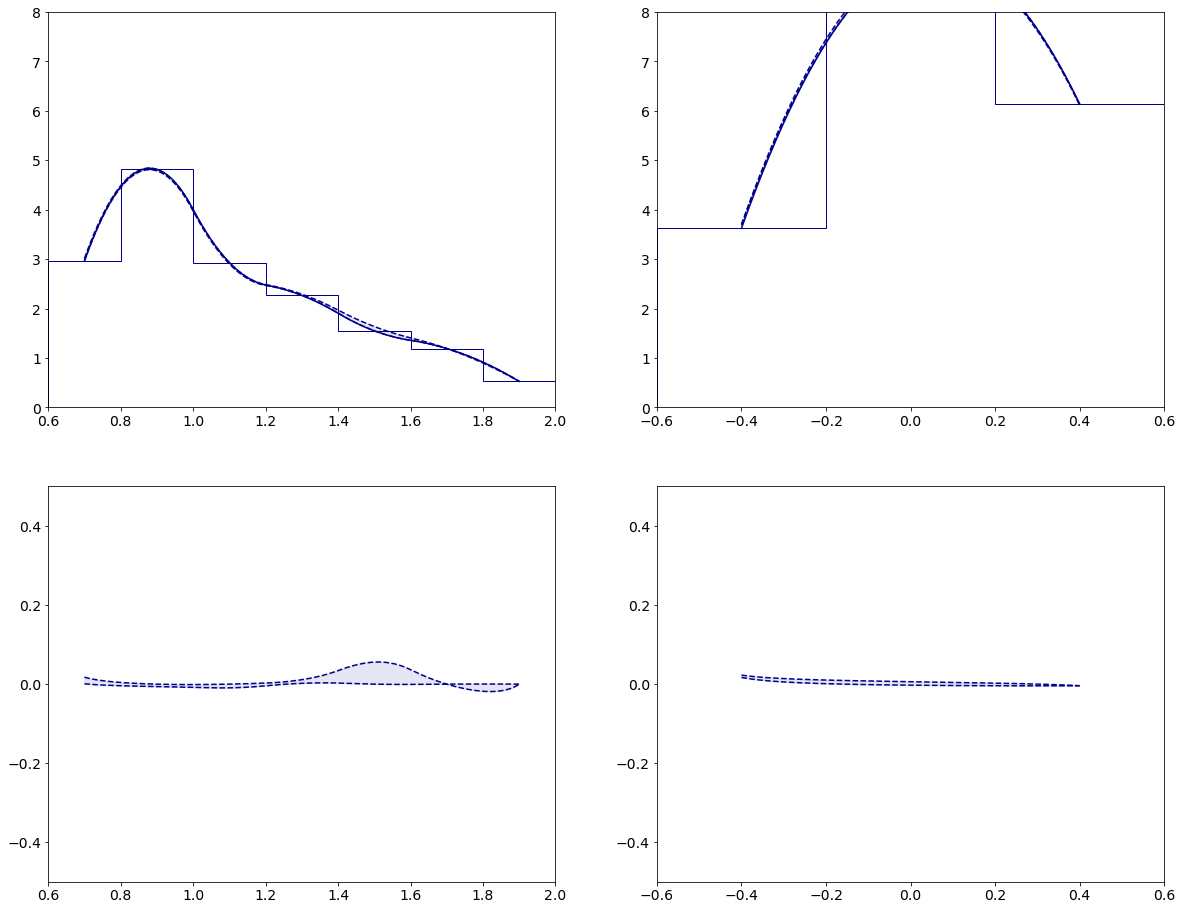

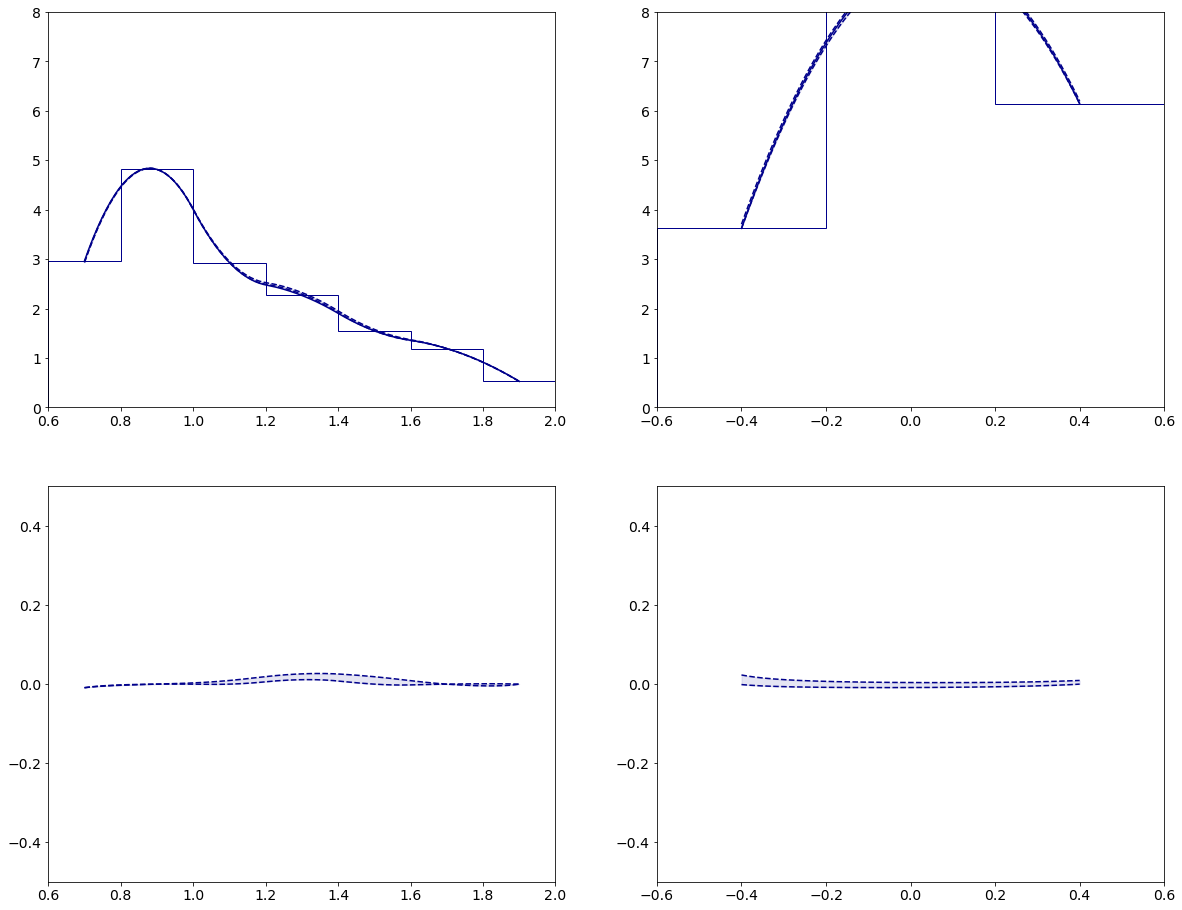

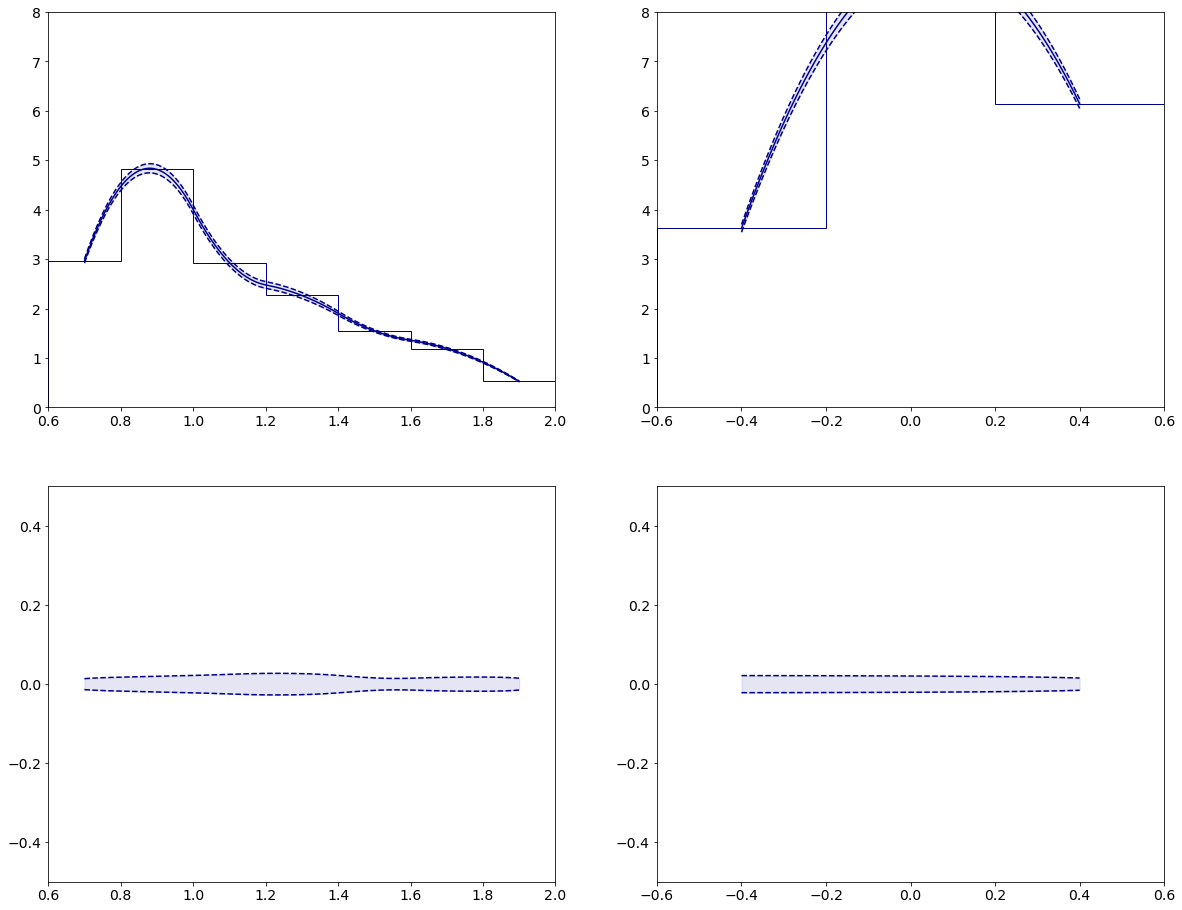

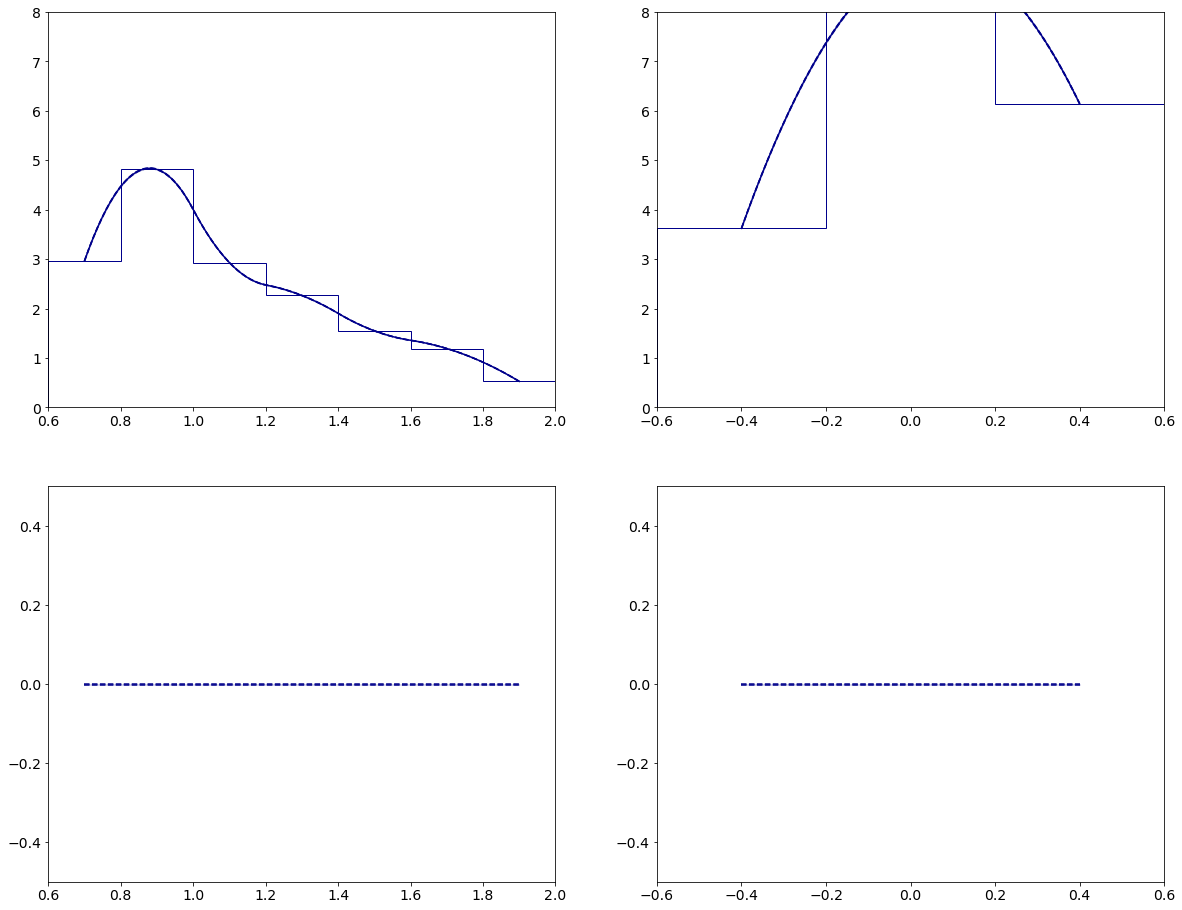

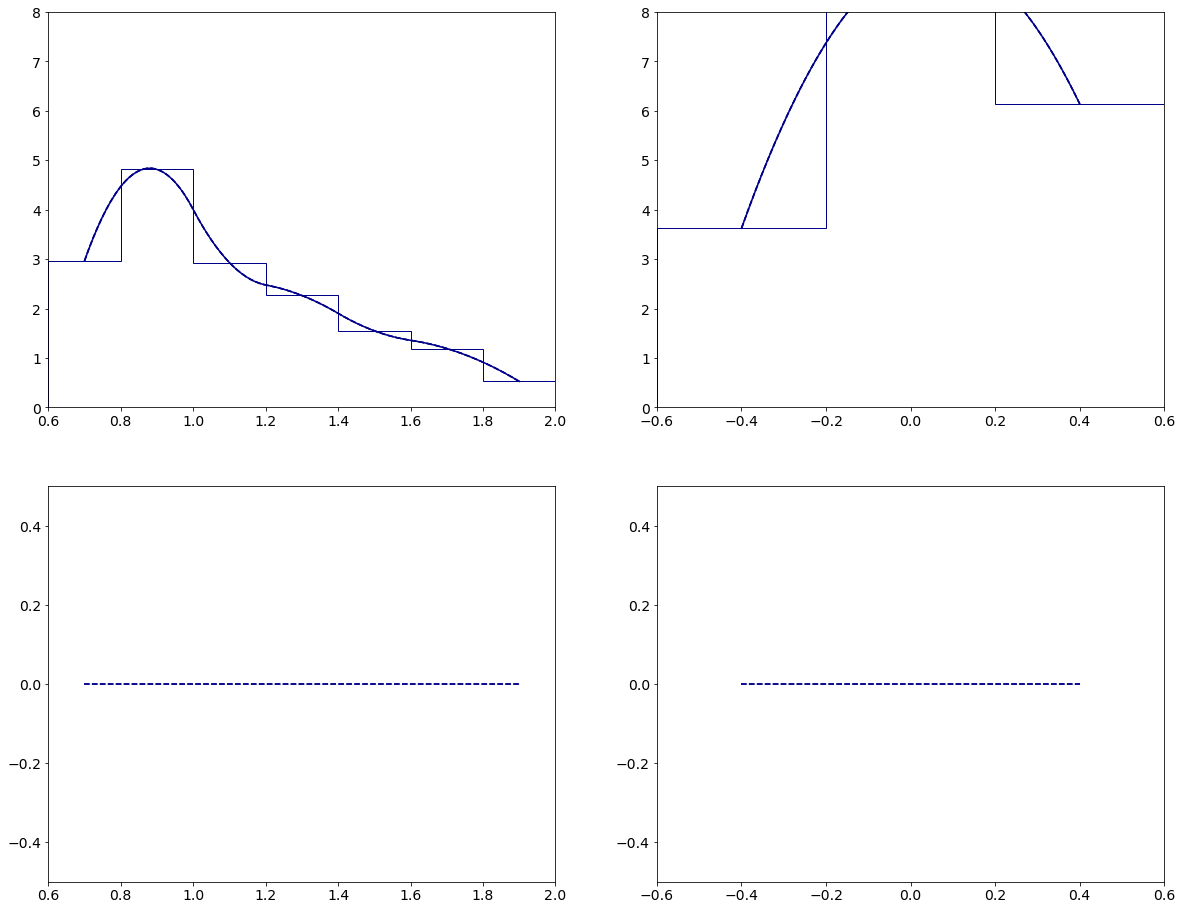

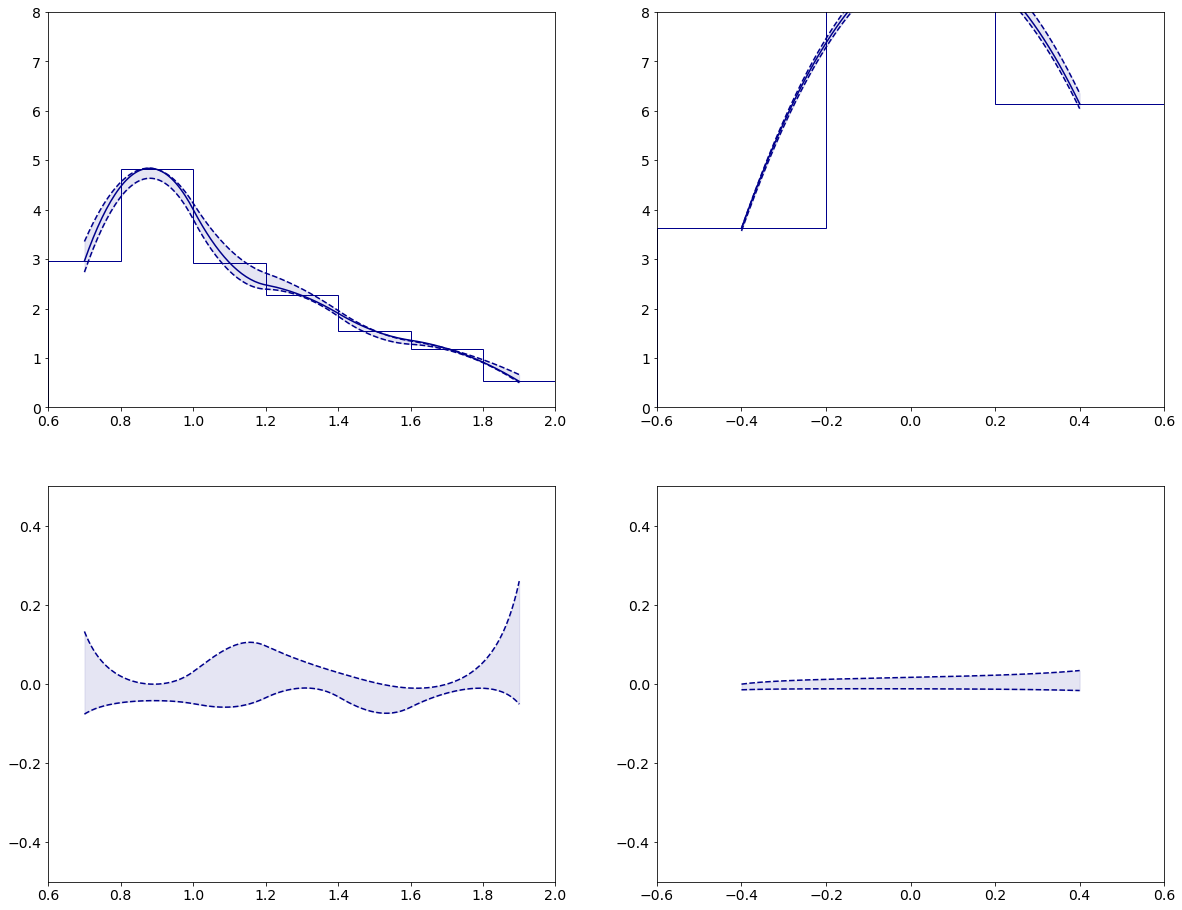

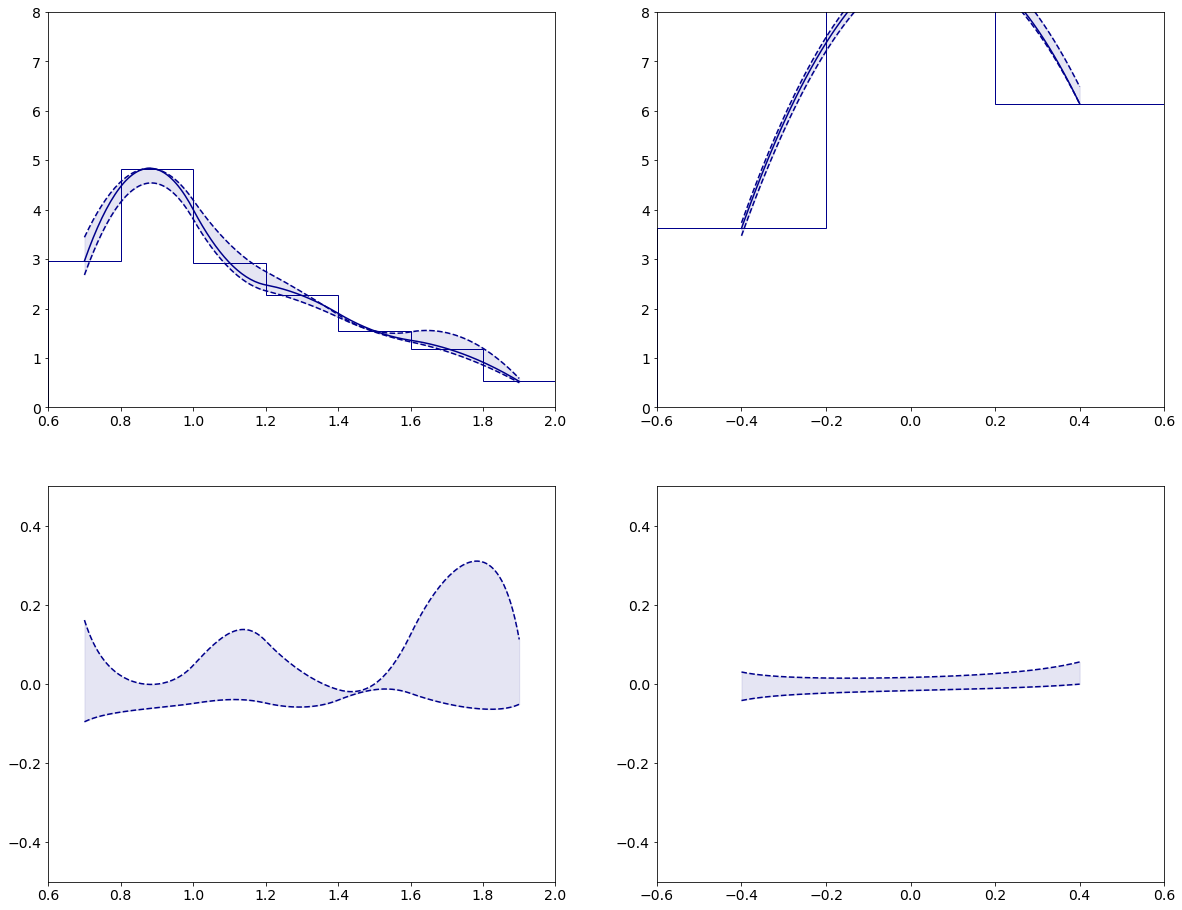

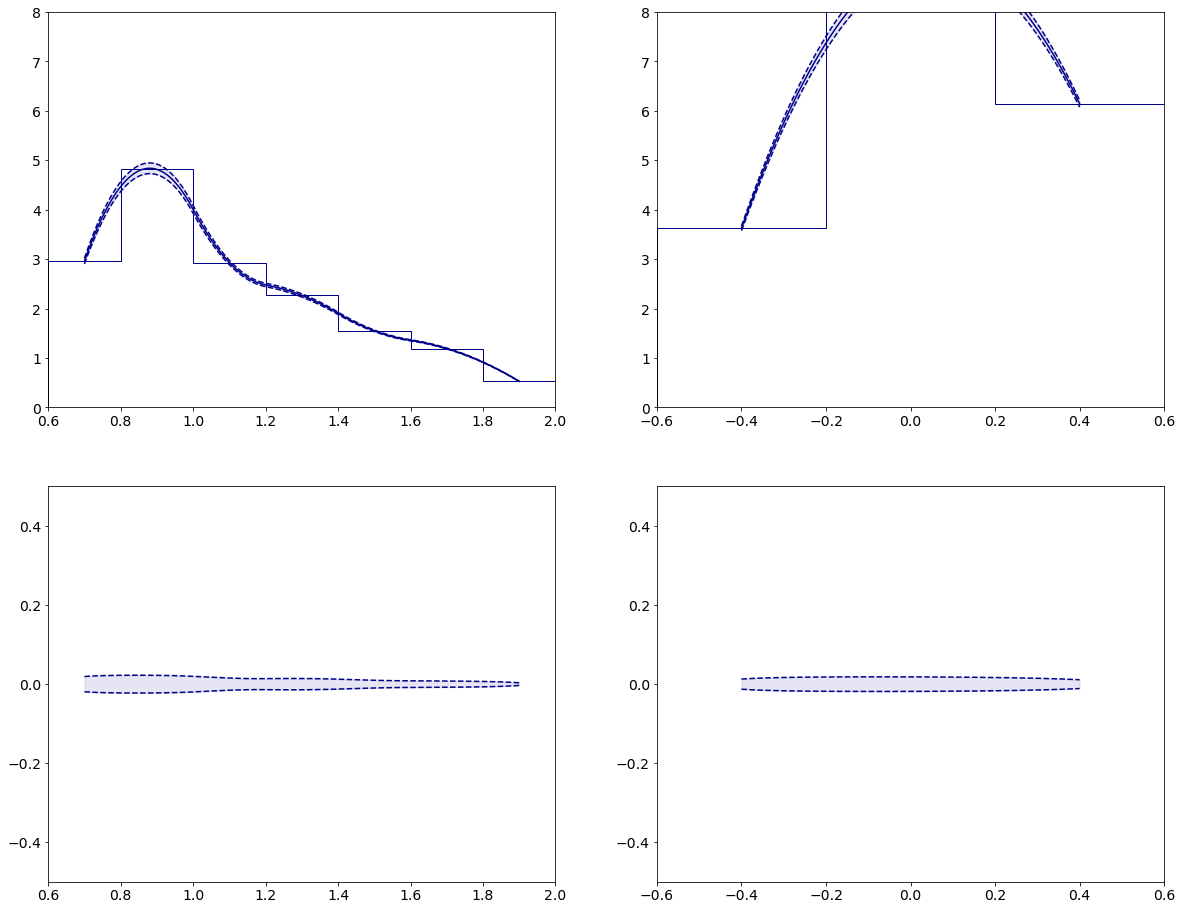

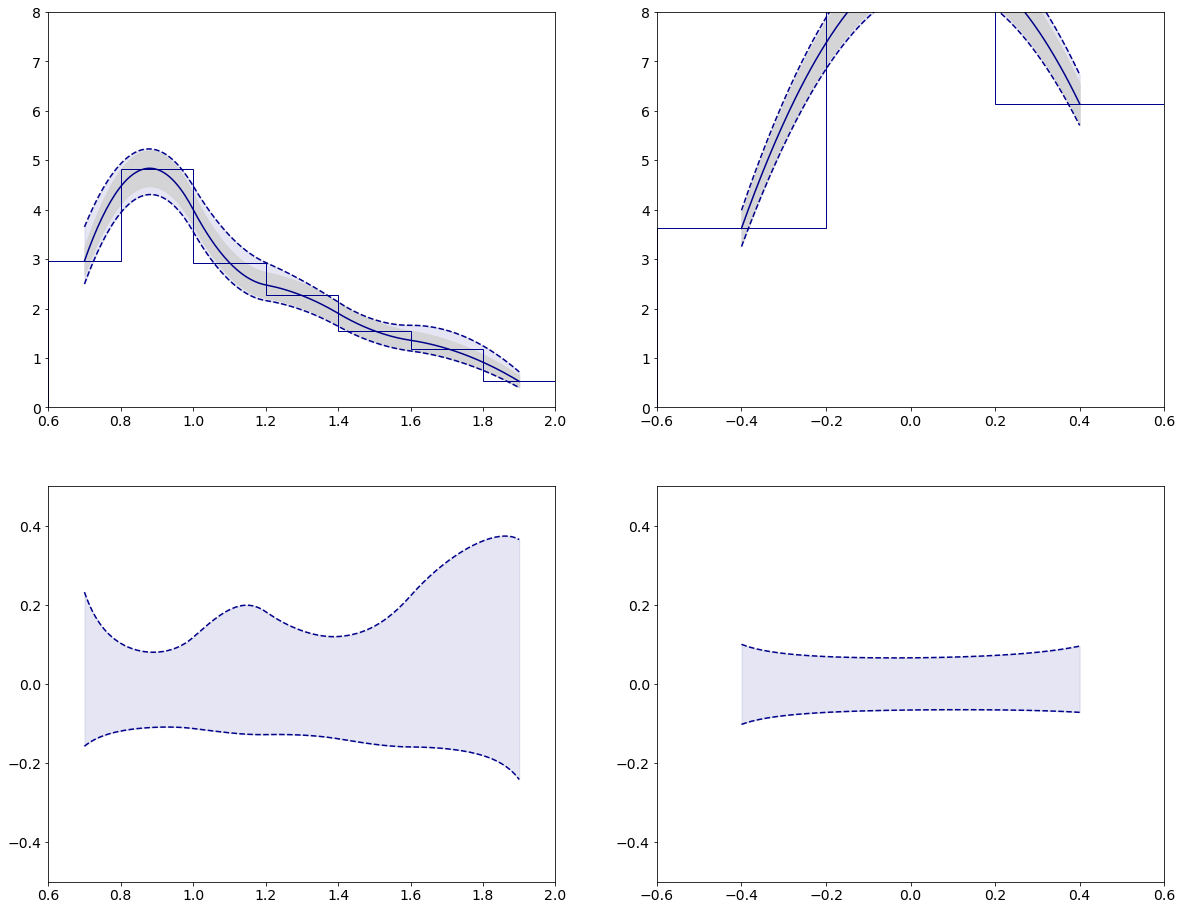

In [85]:
# ylim_ = (0.,0.3)
ylim_ = (0.,8.)
ylim_ratio_ = (-0.50,0.50)
color_ = "darkblue"

label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W1e-6"
#         label_ = "GGToWW-AQGC-muon-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )
    
if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W1e-6-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W1e-6-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W1e-6-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W1e-6-Electron_2018.png", bbox_inches='tight' )

GGToWW-AQGC-2018-electron-A0W2e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 6.07979259 13.85746826 10.51149643  7.74836577  5.67768923  3.12298585
  2.3348957 ]
[ 6.04571893 13.85746826 10.44575429  7.57520194  5.47844949  3.0165683
  2.3348957 ]
0      0.005636
1      0.005026
2      0.004505
3      0.004053
4      0.003659
         ...   
195    0.004435
196    0.003338
197    0.002231
198    0.001117
199    0.000000
Length: 200, dtype: float64 0.00835012228910055
0      0.000000
1      0.000162
2      0.000295
3      0.000405
4      0.000495
         ...   
195   -0.001019
196   -0.000742
197   -0.000479
198   -0.000232
199    0.000000
Length: 200, dtype: float64 -0.008973210442793816
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[10.87693578 26.92767007 19.04625882]
[10.69860219 26.82498187 18.8102668 ]
0      0.016478
1      0.015725
2      0.015016
3      0.014348
4      0.013716
         ...   
195    0.002810
196    0.002960
197    0.003114
198    0.003274
199   

0      0.032784
1      0.031875
2      0.031019
3      0.030212
4      0.029451
         ...   
195    0.021823
196    0.022116
197    0.022419
198    0.022731
199    0.023053
Length: 200, dtype: float64 0.016391570158053693
0     -0.034234
1     -0.033730
2     -0.033255
3     -0.032806
4     -0.032382
         ...   
195   -0.016305
196   -0.016227
197   -0.016147
198   -0.016065
199   -0.015981
Length: 200, dtype: float64 -0.021740525452419765
GGToWW-AQGC-2018-electron-A0W2e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[ 6.15742923 14.15937995 10.68286765  7.81215776  5.64342448  3.0771262
  2.34100975]
[ 5.93400864 13.55555656 10.34012522  7.61684047  5.51357491  3.02651314
  2.32878165]
0      0.018478
1      0.019013
2      0.019466
3      0.019851
4      0.020181
         ...   
195    0.003057
196    0.002935
197    0.002821
198    0.002715
199    0.002619
Length: 200, dtype: float64 0.013764089782163697
0     -0.018478
1     -0.019013
2     -0.019466
3     -0.019

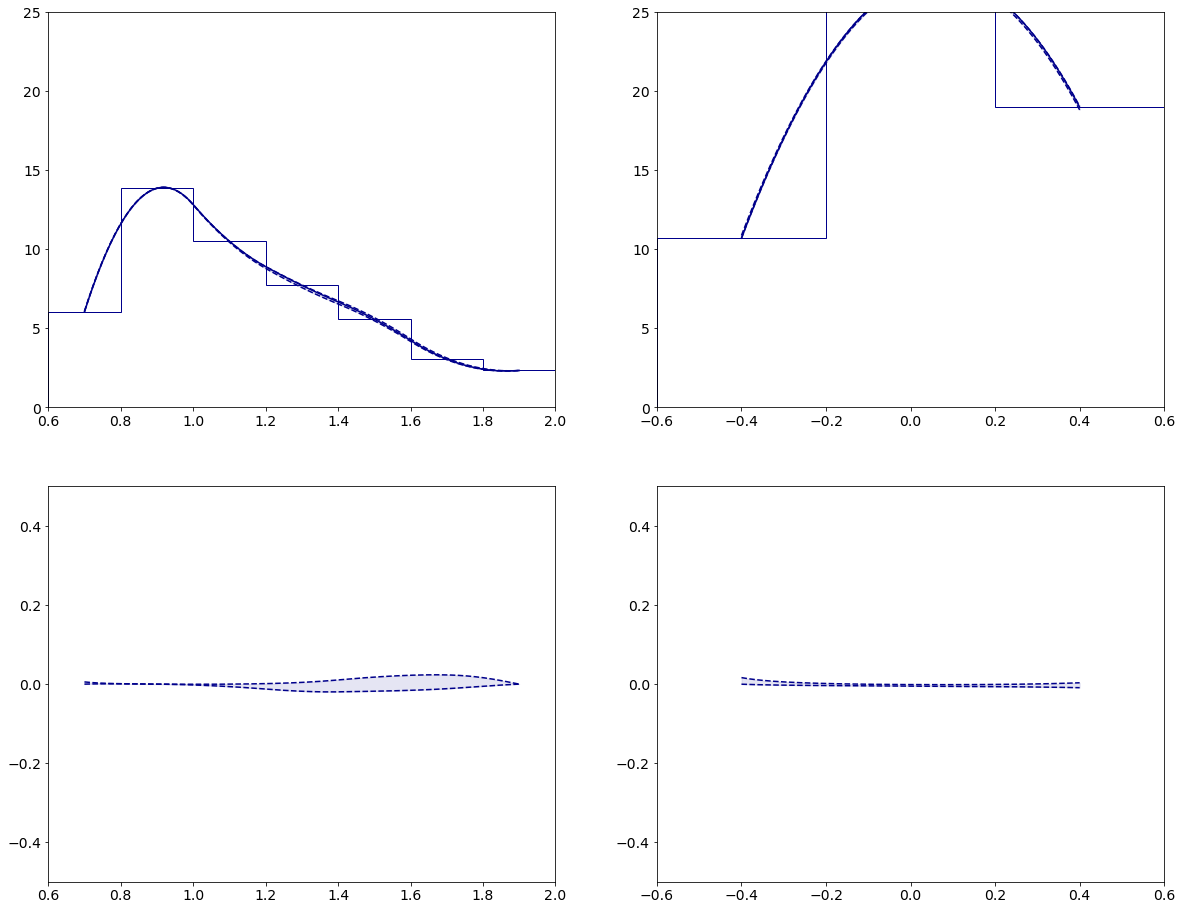

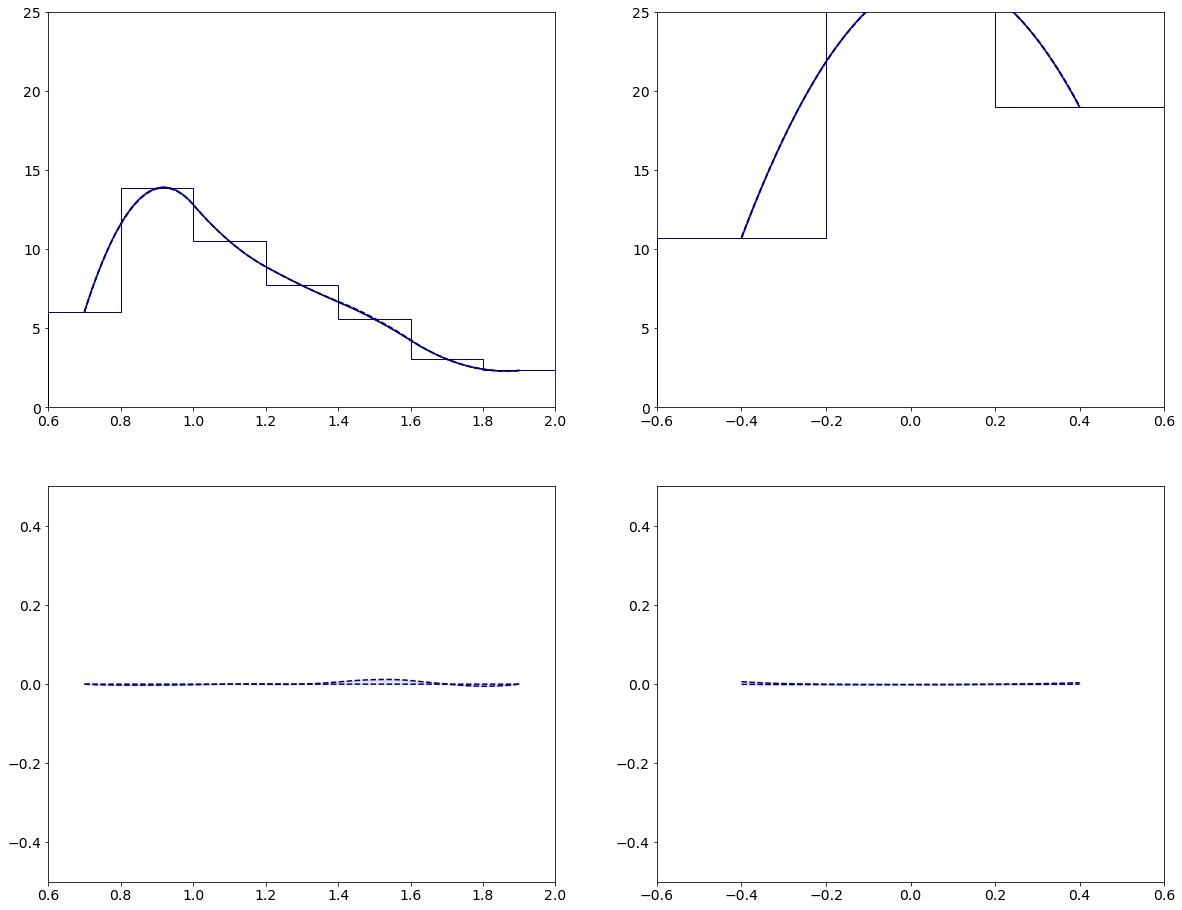

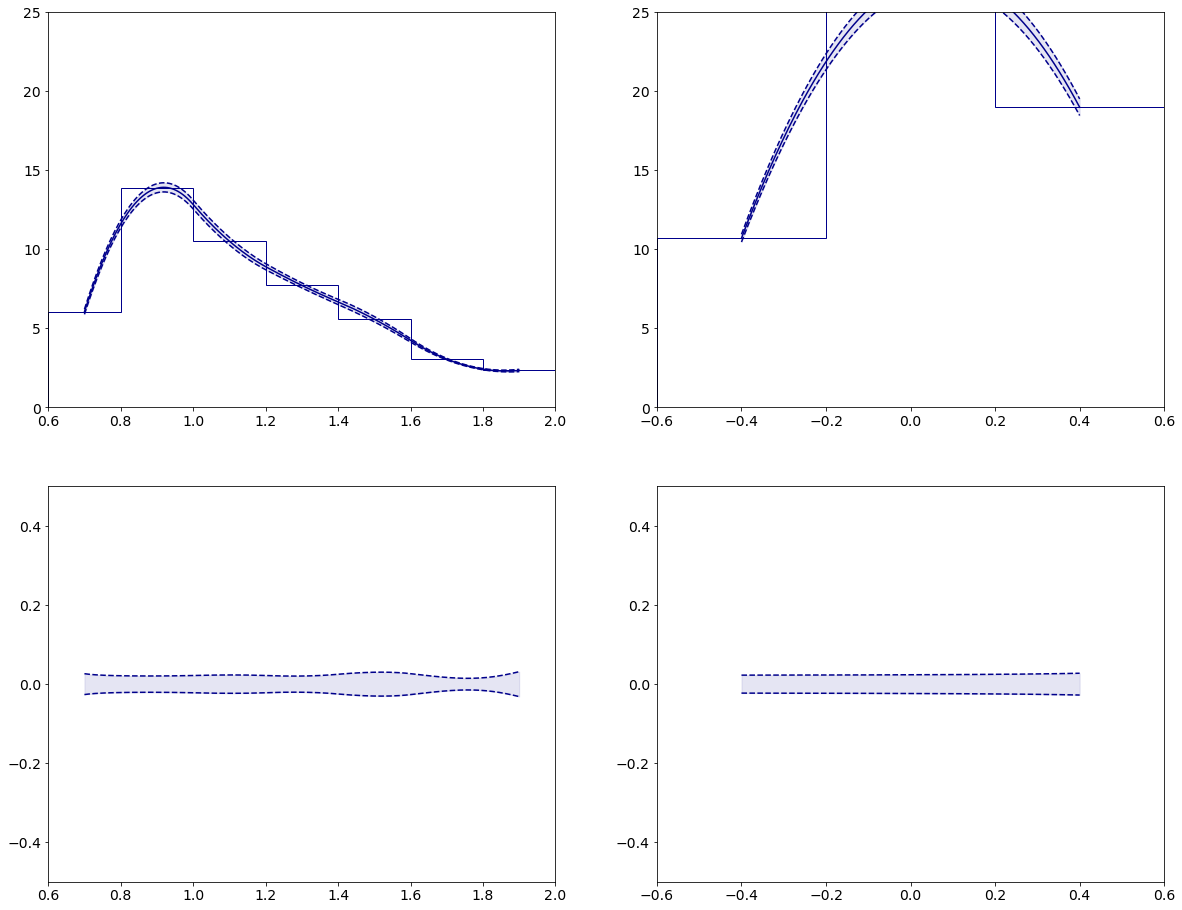

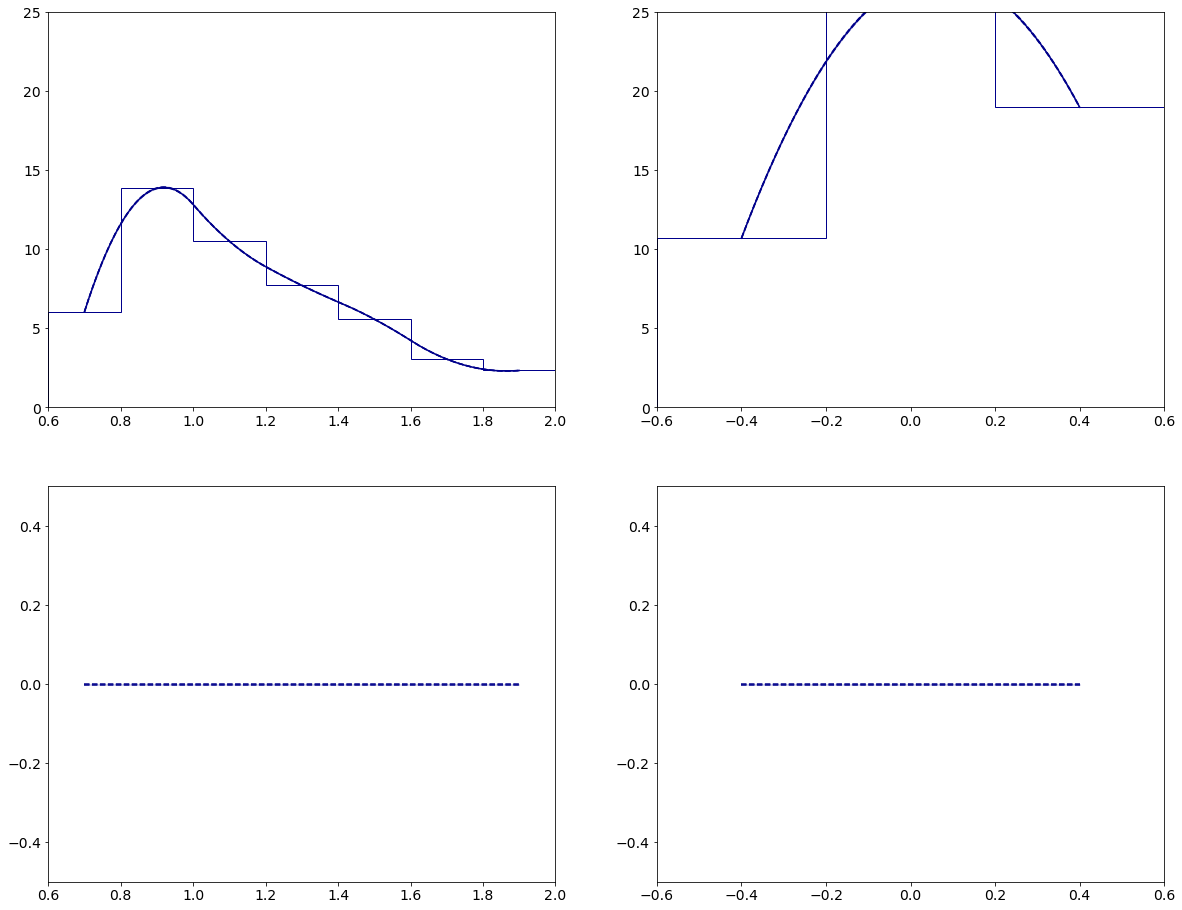

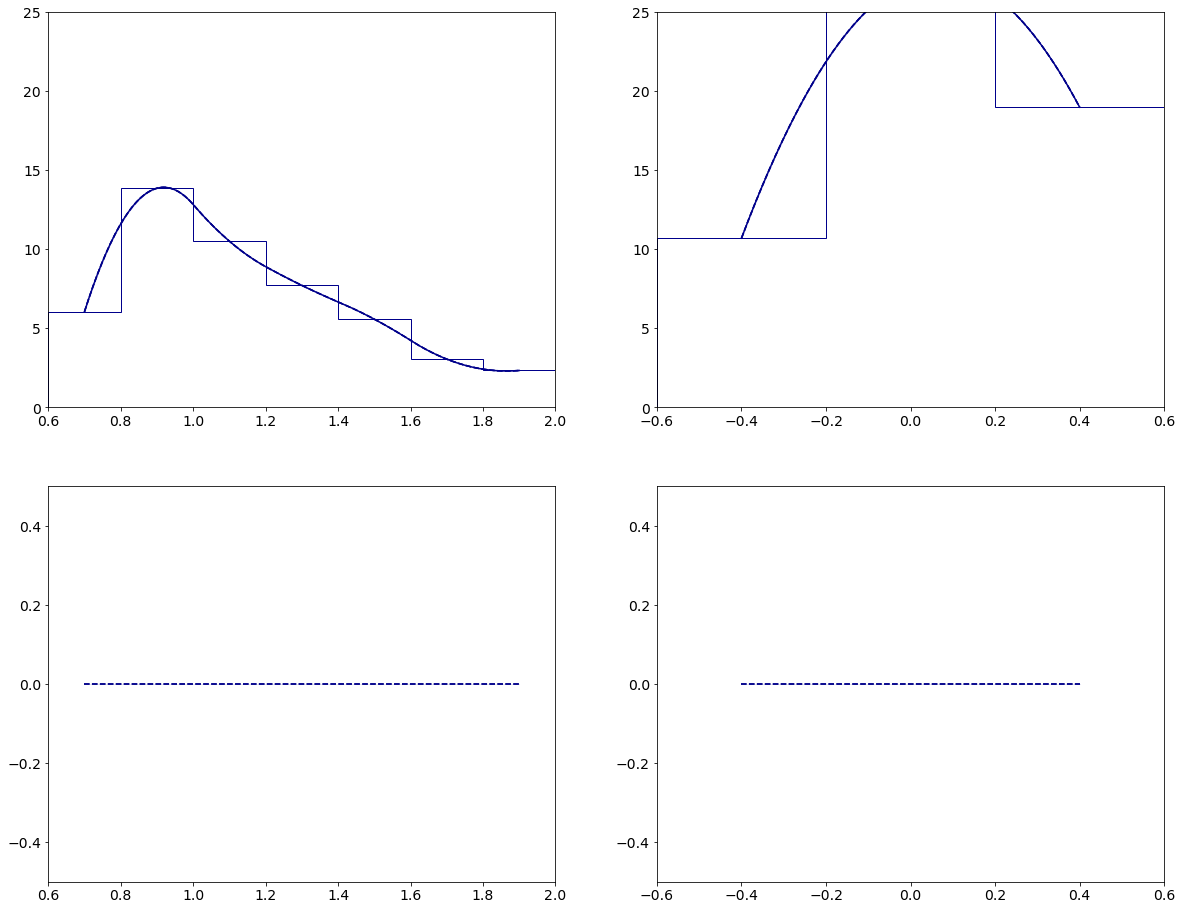

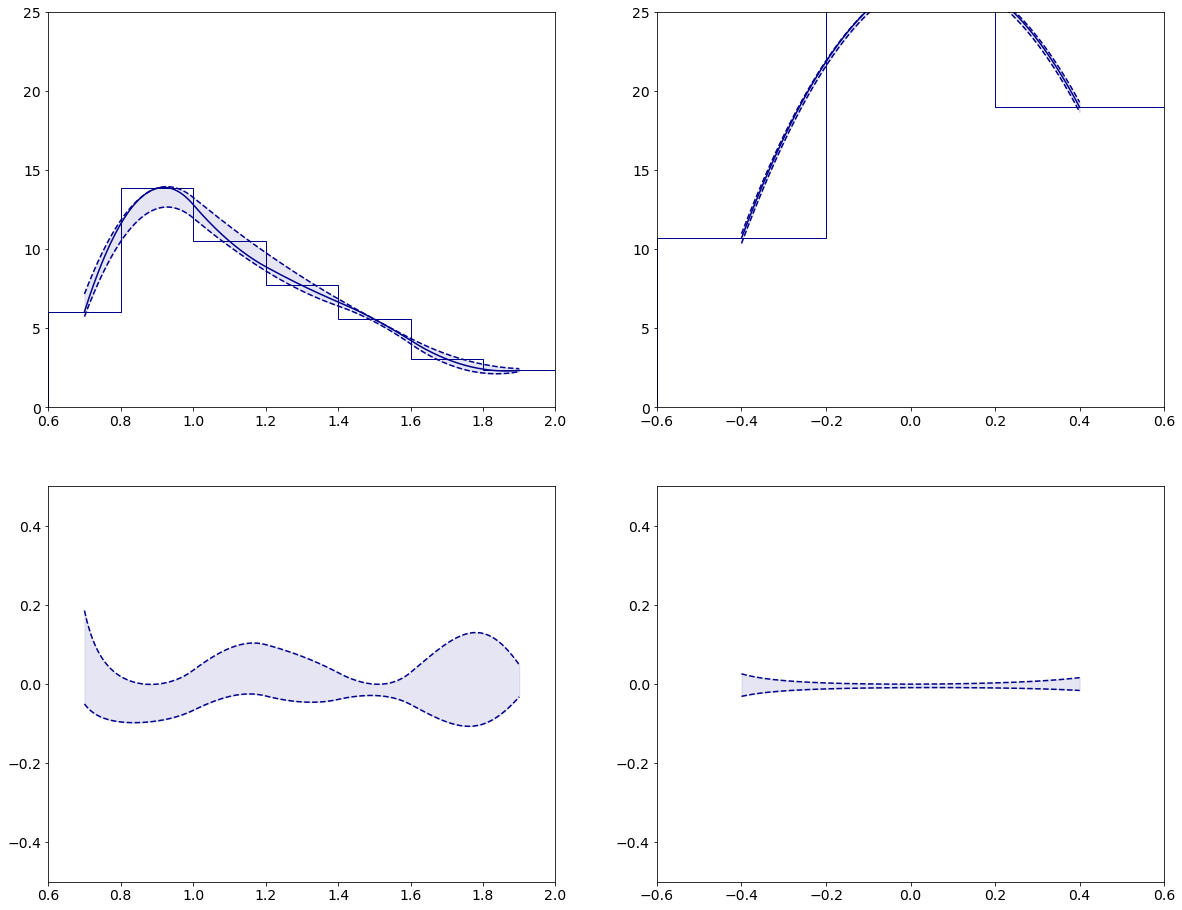

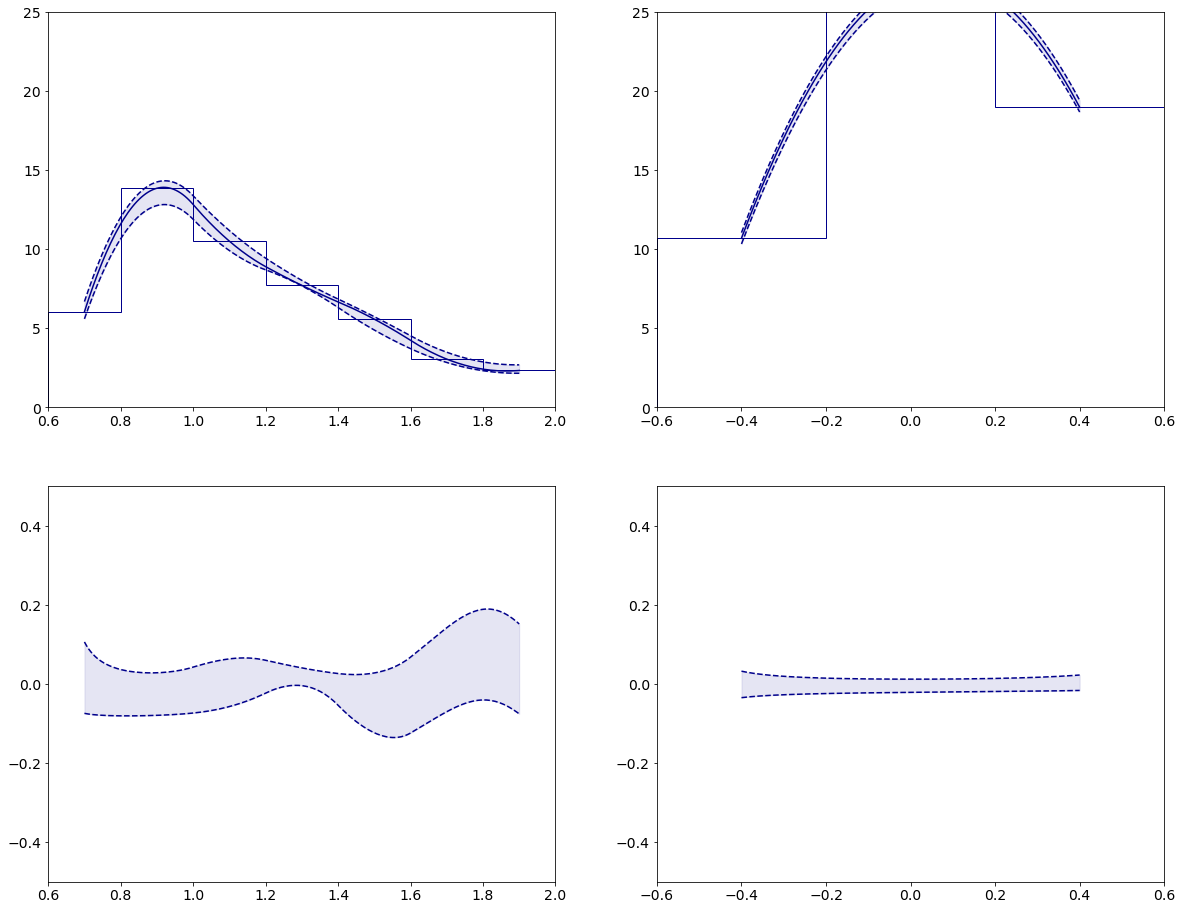

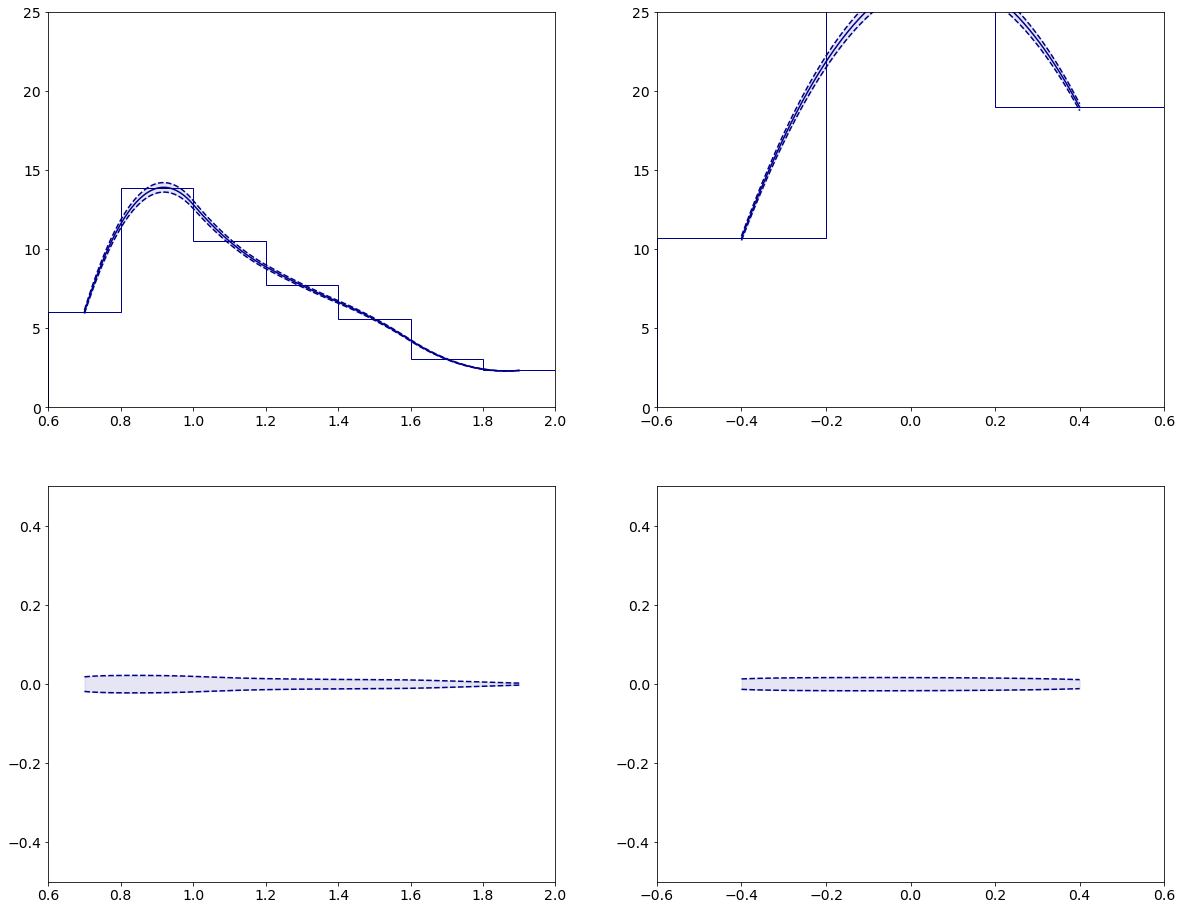

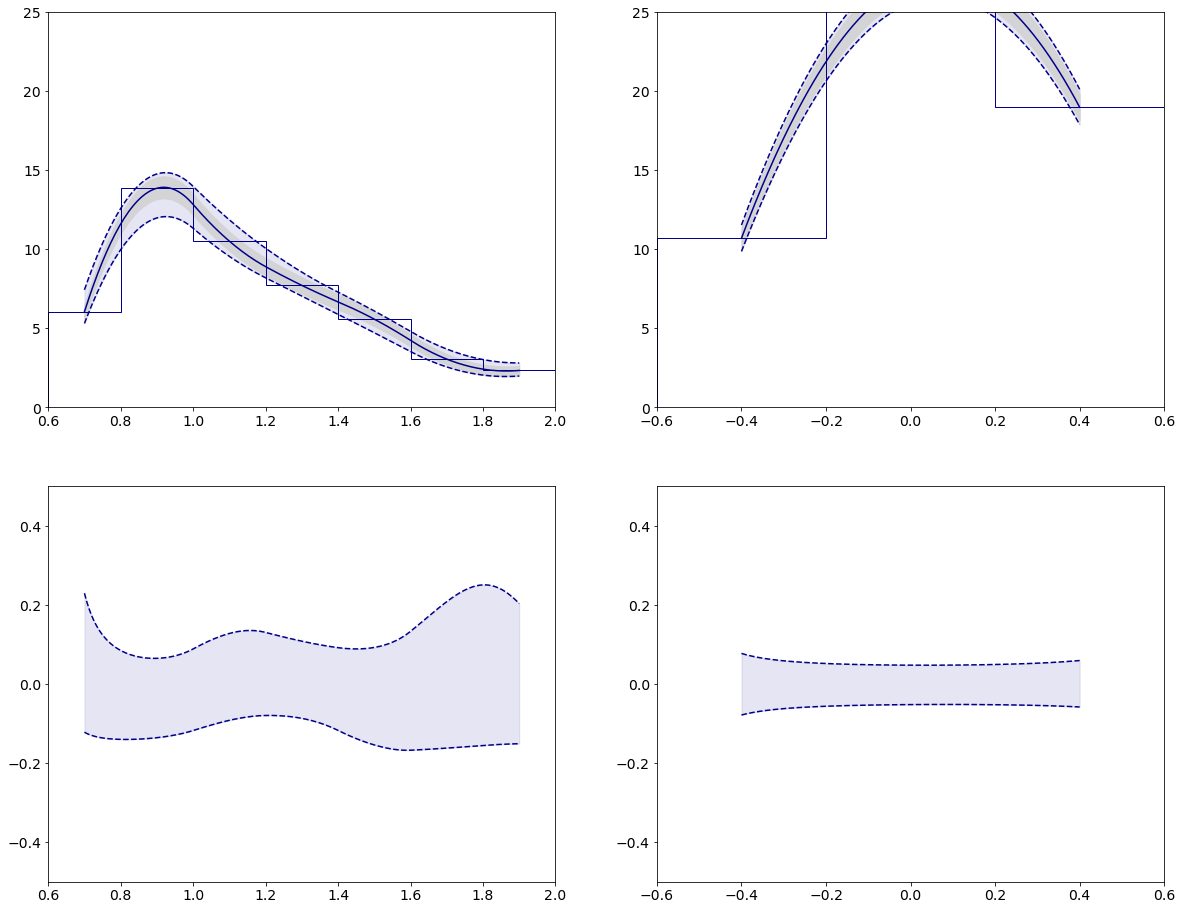

In [86]:
label_ = ""
coupling_str_ = "A0W2e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,25.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )
    
if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W2e-6-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W2e-6-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W2e-6-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W2e-6-Electron_2018.png", bbox_inches='tight' )

GGToWW-AQGC-2018-electron-A0W5e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[28.64931431 71.21253894 54.00783692 46.46971041 32.38162003 22.48919677
 12.19613283]
[28.39046465 71.12535942 53.57902188 45.93693921 31.93246039 22.20338332
 11.55842756]
0      0.002971
1      0.002783
2      0.002626
3      0.002490
4      0.002374
         ...   
195    0.018228
196    0.019065
197    0.019963
198    0.020927
199    0.021963
Length: 200, dtype: float64 0.006089400133904755
0     -0.006091
1     -0.005121
2     -0.004315
3     -0.003638
4     -0.003064
         ...   
195   -0.024132
196   -0.025774
197   -0.027537
198   -0.029433
199   -0.031473
Length: 200, dtype: float64 -0.005395484728751525
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 59.53592127 149.81748023 101.34133694]
[ 59.08509011 147.87258473 100.19629987]
0      0.000178
1      0.000517
2      0.000836
3      0.001136
4      0.001421
         ...   
195    0.006614
196    0.006550
197    0.006483
198    0.00641

0      0.010884
1      0.011109
2      0.011321
3      0.011520
4      0.011709
         ...   
195    0.012325
196    0.012222
197    0.012116
198    0.012006
199    0.011892
Length: 200, dtype: float64 0.014603497128006728
0     -0.010884
1     -0.011109
2     -0.011321
3     -0.011520
4     -0.011709
         ...   
195   -0.012325
196   -0.012222
197   -0.012116
198   -0.012006
199   -0.011892
Length: 200, dtype: float64 -0.014603497128002957
{'jes': {'R_MWW_MX': array([28.64931431, 71.21253894, 54.00783692, 46.46971041, 32.38162003,
       22.48919677, 12.19613283]), 'Diff_YWW_YX': array([ 59.53592127, 149.81748023, 101.34133694])}, 'jer': {'R_MWW_MX': array([28.56445043, 71.12601453, 53.92558593, 46.20082868, 32.20171697,
       22.39730669, 12.02071113]), 'Diff_YWW_YX': array([ 59.52531808, 148.68887319, 100.88033748])}, 'sf_electron_id': {'R_MWW_MX': array([29.41451754, 73.04829476, 55.31118965, 47.57448433, 33.00402902,
       22.77670504, 12.22616756]), 'Diff_YWW_YX': array([

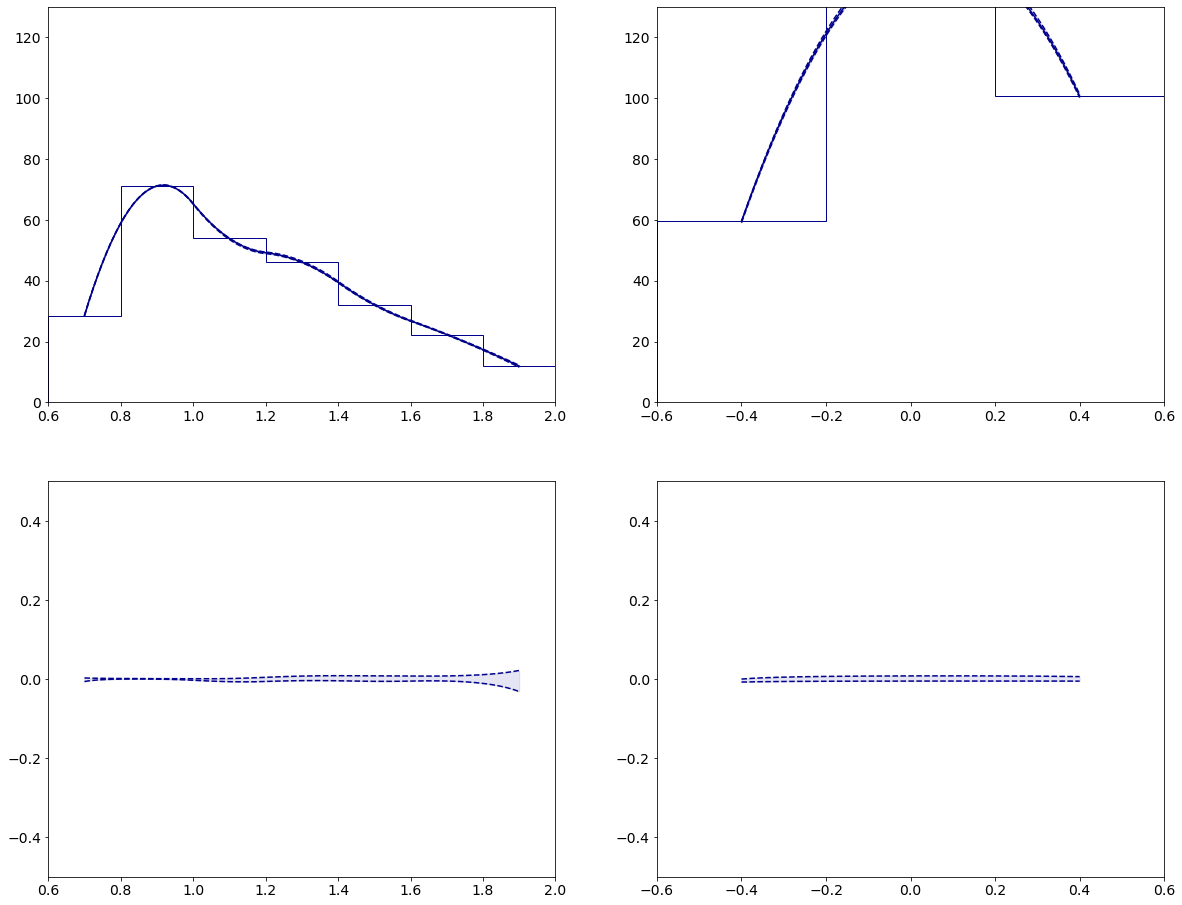

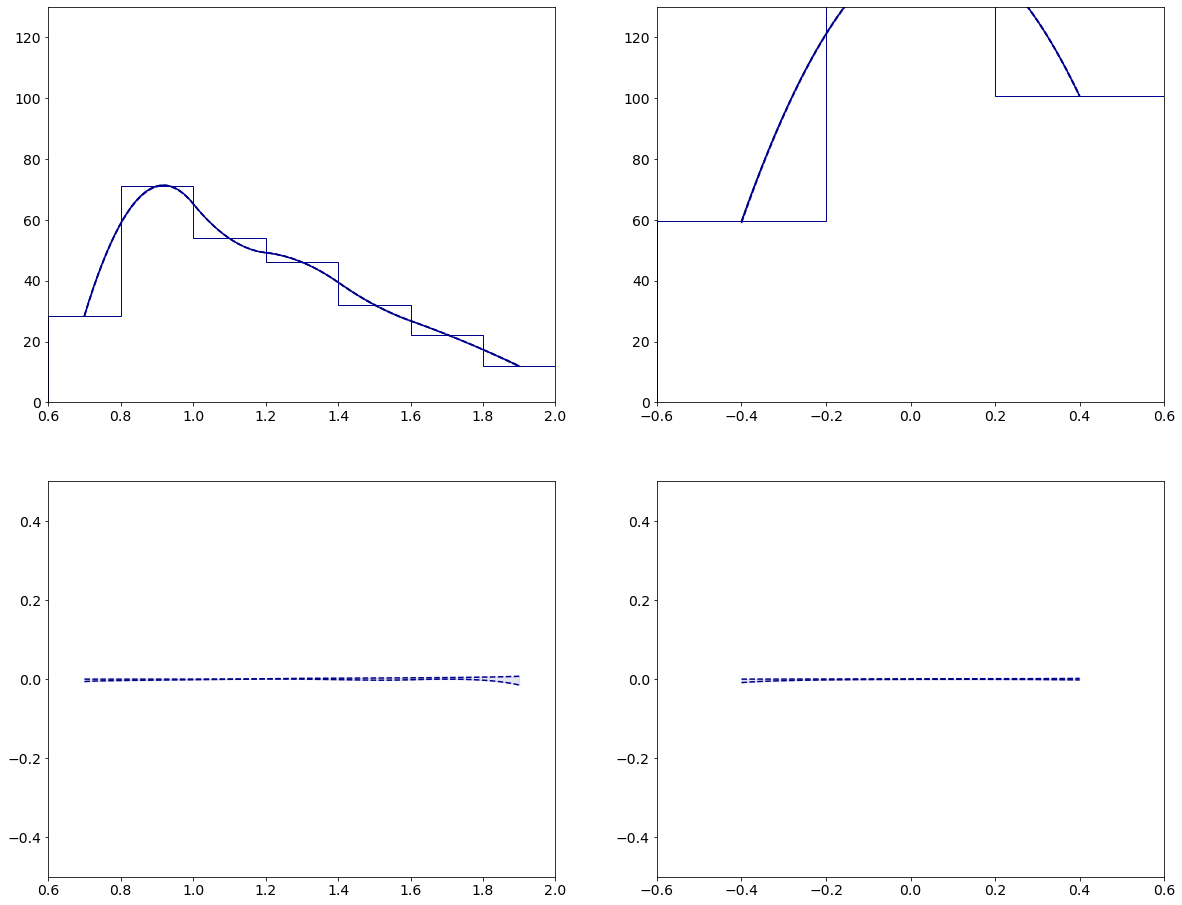

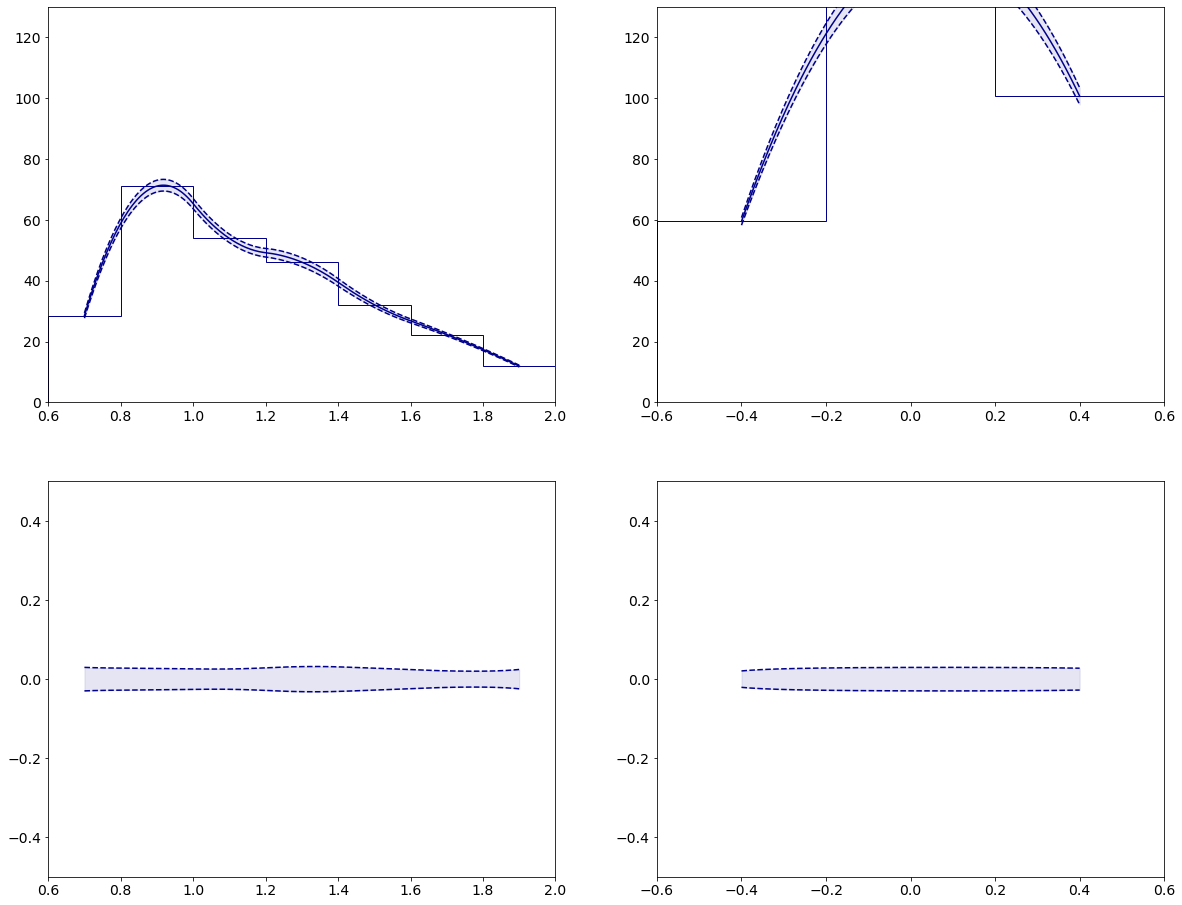

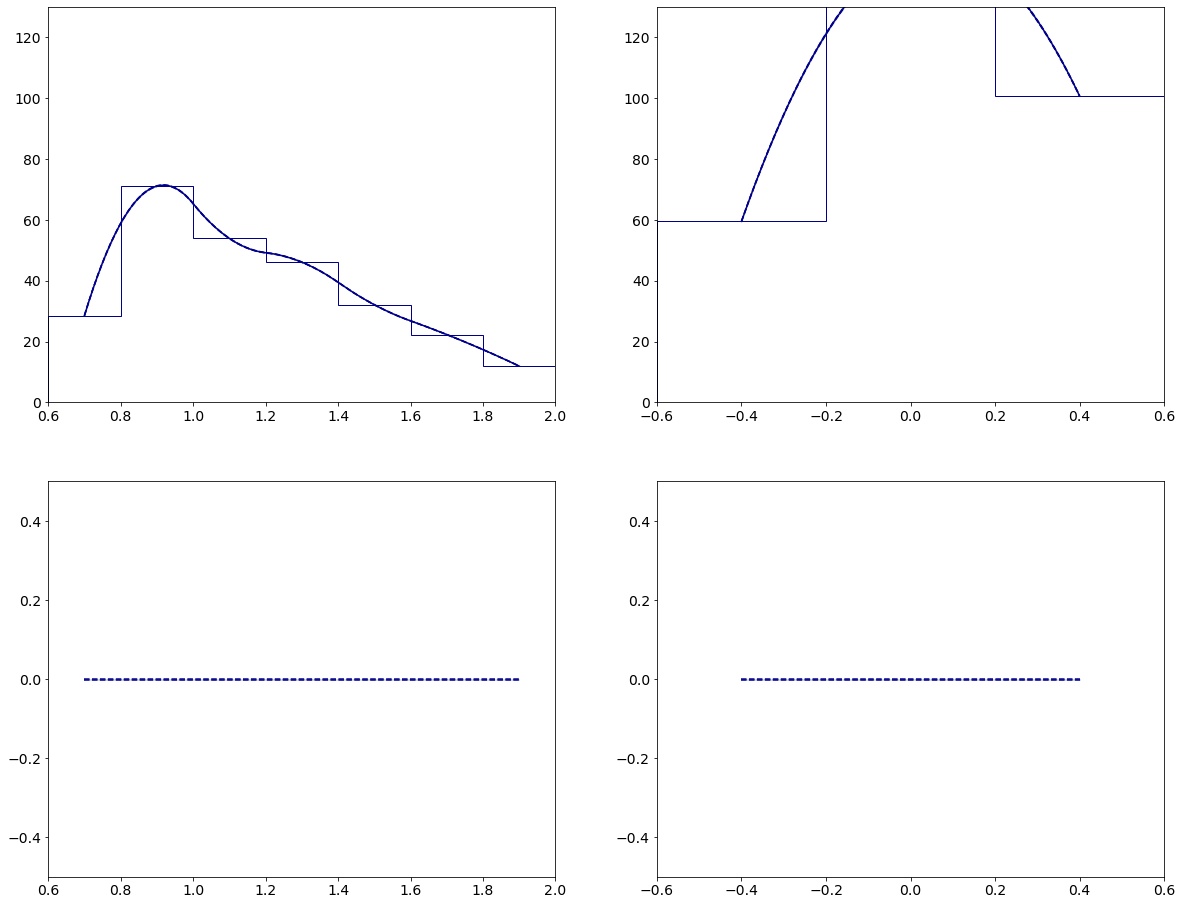

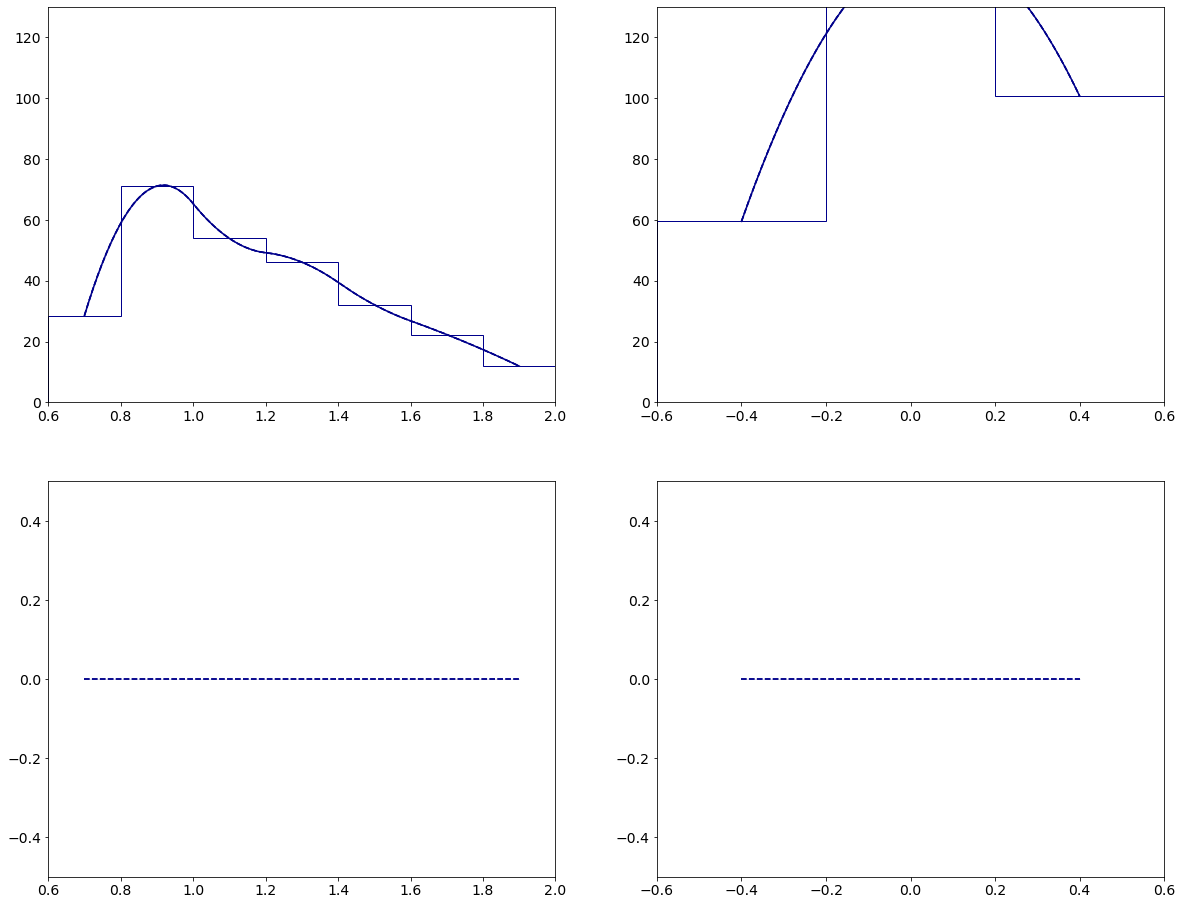

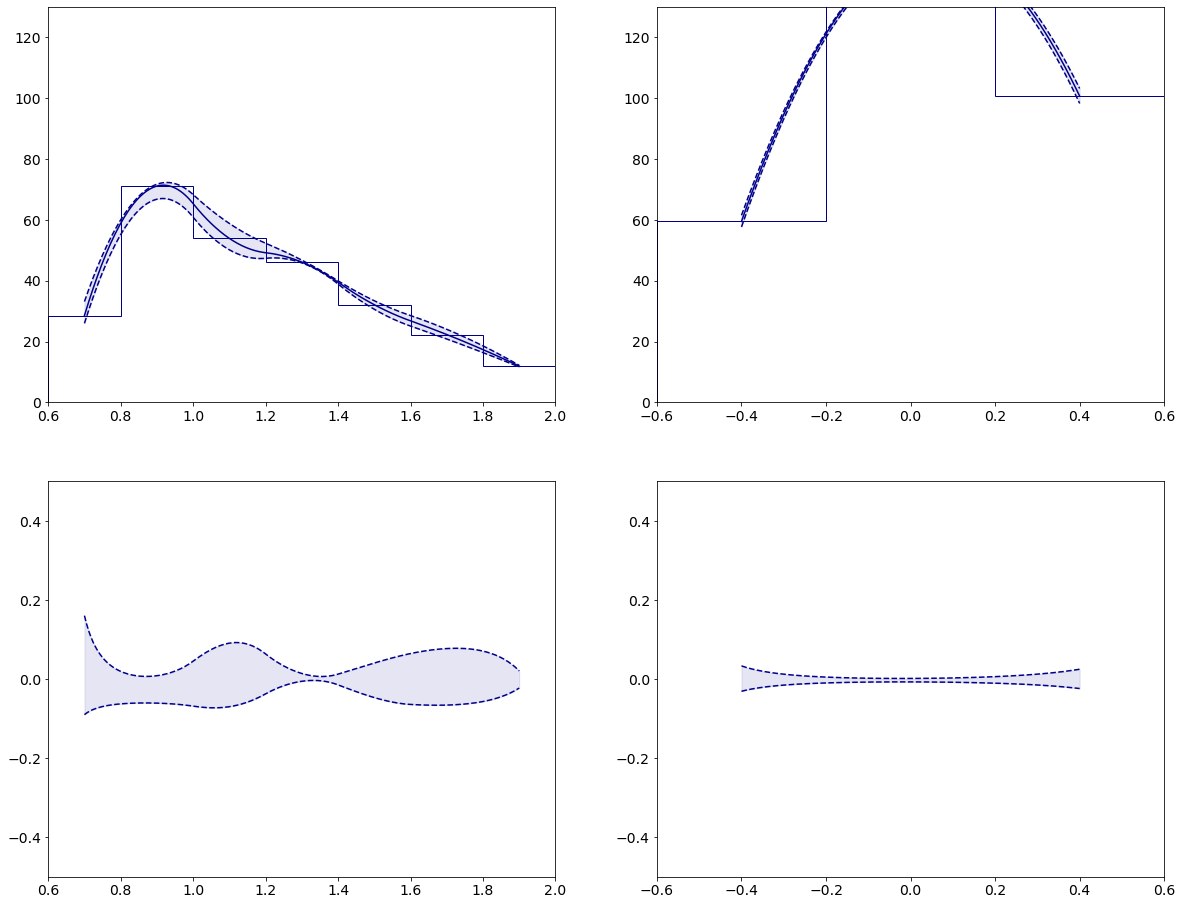

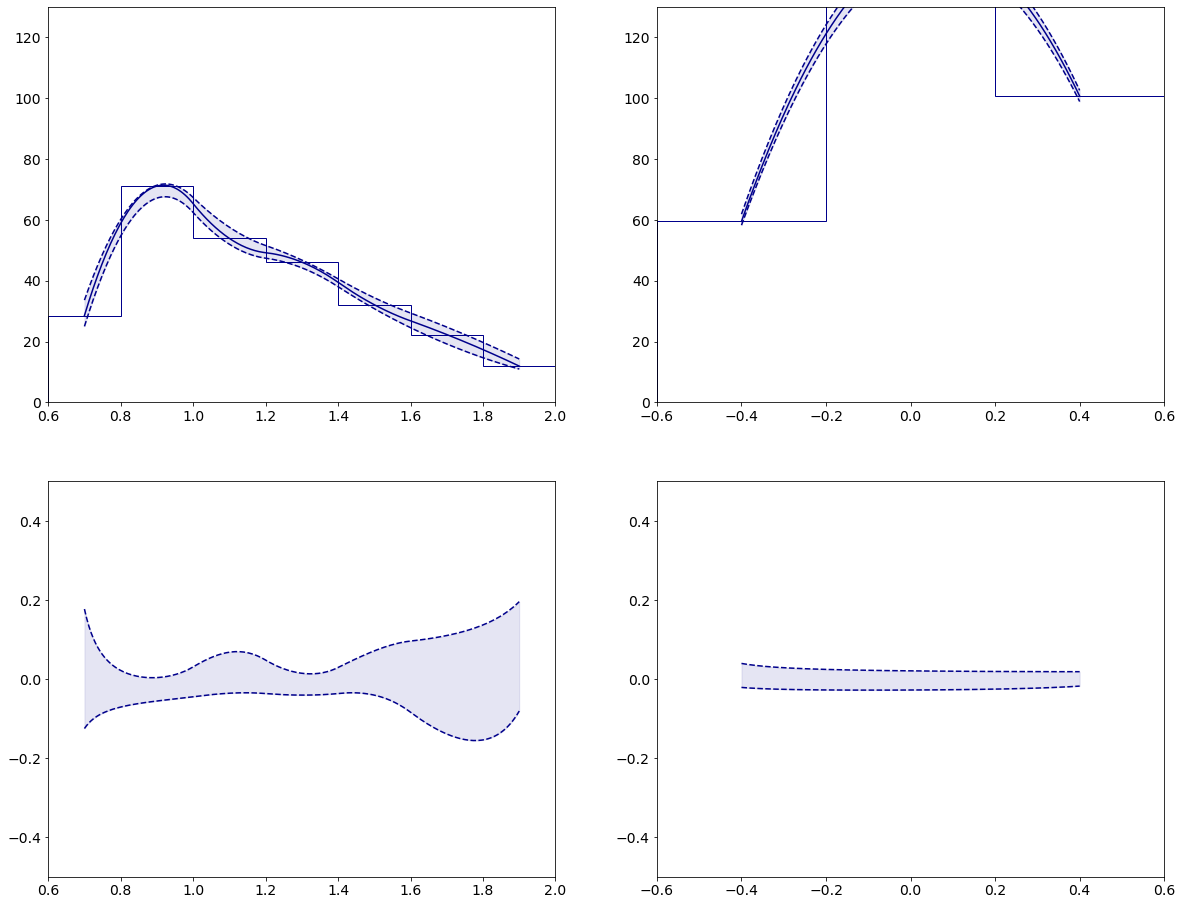

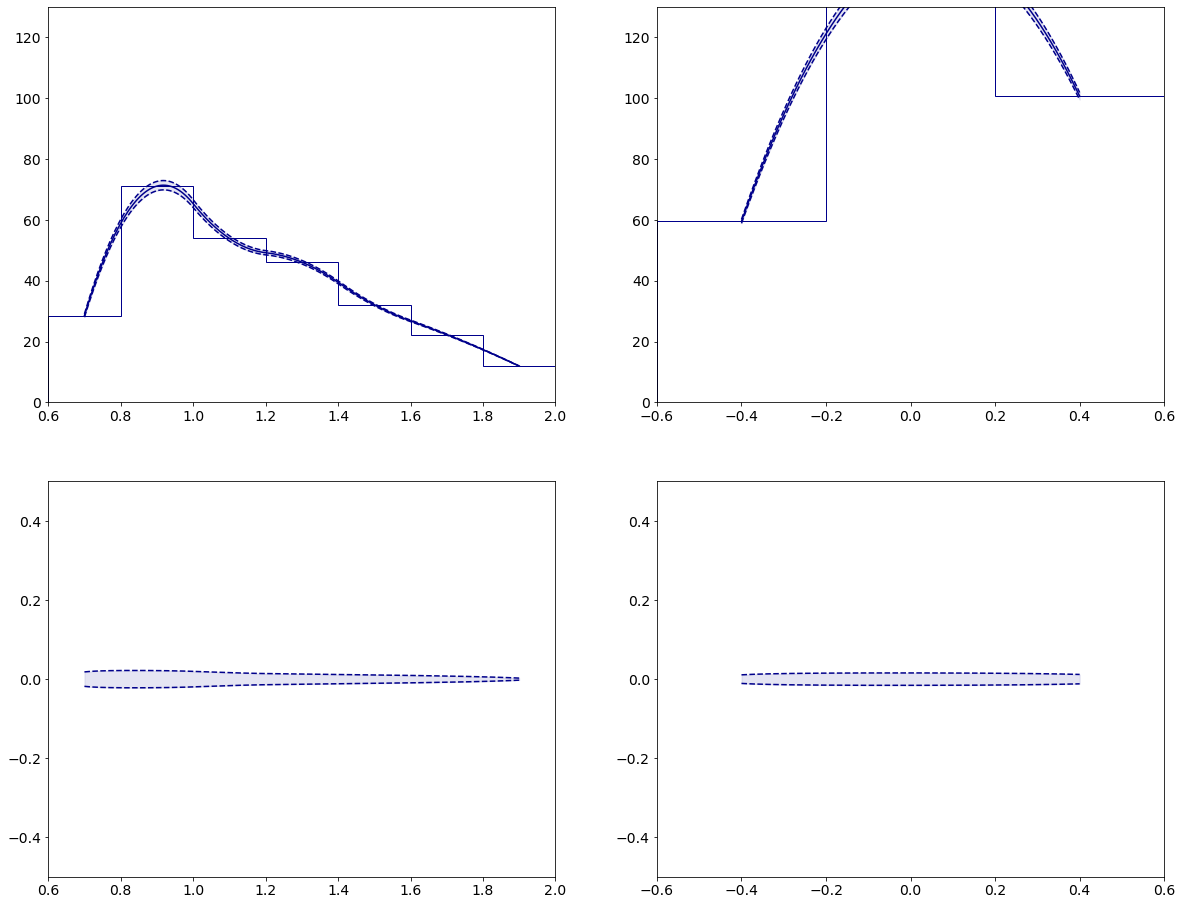

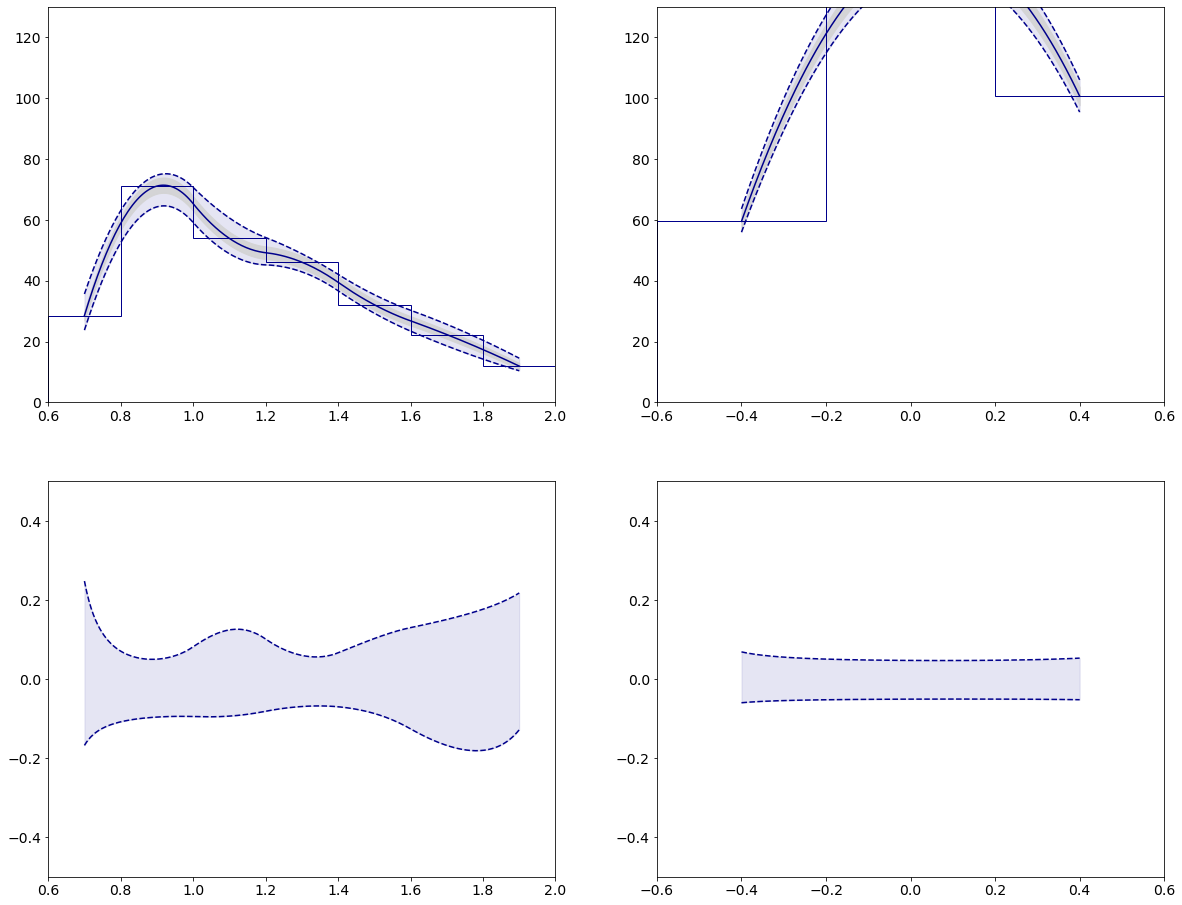

In [87]:
label_ = ""
coupling_str_ = "A0W5e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W5e-6"
#         label_ = "GGToWW-AQGC-muon-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,3.)
# ylim_ = (0.,5.)
ylim_ = (0.,130.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )    

if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W5e-6-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W5e-6-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W5e-6-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W5e-6-Electron_2018.png", bbox_inches='tight' )

In [88]:
print ( counts )
print ( err )
print ( bins )
print ( max_variations_total )
print ( min_variations_total )

{'GGToWW-AQGC-2018-electron-A0W1e-6': {'R_MWW_MX': array([2.96194161, 4.81585572, 2.93077055, 2.2649675 , 1.54969334,
       1.19134415, 0.52605824]), 'Diff_YWW_YX': array([3.62291284, 9.04464049, 6.14424064])}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'R_MWW_MX': array([ 6.04571893, 13.85746826, 10.51149643,  7.71449912,  5.5784997 ,
        3.05181967,  2.3348957 ]), 'Diff_YWW_YX': array([10.70060846, 26.95852061, 18.98098904])}, 'GGToWW-AQGC-2018-electron-A0W5e-6': {'R_MWW_MX': array([28.56445043, 71.12601453, 53.92558593, 46.11254307, 32.11224335,
       22.30985539, 11.93402313]), 'Diff_YWW_YX': array([ 59.52531808, 148.60218518, 100.70257826])}}
{'GGToWW-AQGC-2018-electron-A0W1e-6': {'R_MWW_MX': array([0.28442269, 0.36262466, 0.28270451, 0.24922801, 0.20563922,
       0.18219496, 0.12090622]), 'Diff_YWW_YX': array([0.31387229, 0.49747544, 0.40956609])}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'R_MWW_MX': array([0.45975502, 0.69733345, 0.60759115, 0.52024474, 0.44357695,
       0.33007

### Background

### Load and select events

In [89]:
##criar flag para usar bkg assim ou da MC+mix_protons

# ['crossingAngle', 'betaStar', 'instLumi', 'jet0_pt', 'jet0_eta',
#        'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
#        'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
#        'jet0_pz', 'calo_met', 'met', 'met_x', 'met_y', 'met_phi',
#        'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
#        'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
#        'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
#        'WLeptonicEta', 'WLeptonicPhi', 'muon0_pt', 'muon0_eta',
#        'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
#        'muon0_dxy', 'muon0_dz', 'muon0_trackerLayersWithMeasurement',
#        'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd',
#        'betaStar_rnd', 'period', 'jet0_pt_nom', 'jet0_energy_nom',
#        'jet0_mass_nom', 'jet0_corrmass_nom', 'jet0_px_nom', 'jet0_py_nom',
#        'jet0_pz_nom', 'muon0_pt_nom', 'muon0_energy_nom', 'muon0_px_nom',
#        'muon0_py_nom', 'muon0_pz_nom', 'WLeptonicPt_nom',
#        'WLeptonicPx_nom', 'WLeptonicPy_nom', 'WLeptonicPz_nom',
#        'WLeptonicE_nom', 'WLeptonicM_nom', 'WW_energy_nom', 'WW_pz_nom',
#        'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom',
#        'within_aperture', 'xlow', 'xhigh', 'ylow', 'yhigh', 'MX', 'YX',
#        'diffMWW_MX', 'ratioMWW_MX', 'shiftedRatioMWW_MX', 'diffYWW_YX',
#        'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']

In [90]:
# resample_factor = 20
# resample_factor = 50

# label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

if not bkg_MC_mix_protons: 
    labels_background = []
    fileNames_bkg = {}
    resample_factor = 50
    if data_sample == '2017':
        if lepton_type == 'muon':
            labels_background = [
                "data-random-resample_50-single-arm-muon-2017B",
                "data-random-resample_50-single-arm-muon-2017C",
                "data-random-resample_50-single-arm-muon-2017D",
                "data-random-resample_50-single-arm-muon-2017E",
                "data-random-resample_50-single-arm-muon-2017F"
            ]
            fileNames_bkg = {
                "data-random-resample_50-single-arm-muon-2017B": "data-store-data-random-resample_50-single-arm-2017B.h5",
                "data-random-resample_50-single-arm-muon-2017C": "data-store-data-random-resample_50-single-arm-2017C.h5",
                "data-random-resample_50-single-arm-muon-2017D": "data-store-data-random-resample_50-single-arm-2017D.h5",
                "data-random-resample_50-single-arm-muon-2017E": "data-store-data-random-resample_50-single-arm-2017E.h5",
                "data-random-resample_50-single-arm-muon-2017F": "data-store-data-random-resample_50-single-arm-2017F.h5"
            }
        elif lepton_type == 'electron':
            labels_background = [
                "data-random-resample_50-single-arm-electron-2017B",
                "data-random-resample_50-single-arm-electron-2017C",
                "data-random-resample_50-single-arm-electron-2017D",
                "data-random-resample_50-single-arm-electron-2017E",
                "data-random-resample_50-single-arm-electron-2017F"
            ]
            fileNames_bkg = {
                "data-random-resample_50-single-arm-electron-2017B": "data-store-data-random-resample_50-single-arm-electron-2017B.h5",
                "data-random-resample_50-single-arm-electron-2017C": "data-store-data-random-resample_50-single-arm-electron-2017C.h5",
                "data-random-resample_50-single-arm-electron-2017D": "data-store-data-random-resample_50-single-arm-electron-2017D.h5",
                "data-random-resample_50-single-arm-electron-2017E": "data-store-data-random-resample_50-single-arm-electron-2017E.h5",
                "data-random-resample_50-single-arm-electron-2017F": "data-store-data-random-resample_50-single-arm-electron-2017F.h5"
            }
    elif data_sample == '2018':
        if lepton_type == 'muon':
            labels_background = [
                "data-random-resample_50-2018-muon-2018A",
                "data-random-resample_50-2018-muon-2018B",
                "data-random-resample_50-2018-muon-2018C",
                #"data-random-resample_50-2018-muon-2018D",
                "data-random-resample_50-2018-muon-2018D-1",
                "data-random-resample_50-2018-muon-2018D-2",
                "data-random-resample_50-2018-muon-2018D-3",
                "data-random-resample_50-2018-muon-2018D-4",
                "data-random-resample_50-2018-muon-2018D-5",
                "data-random-resample_50-2018-muon-2018D-6"
            ]
            fileNames_bkg = {
                "data-random-resample_50-2018-muon-2018A": "data-store-data-random-resample_50-2018-muon-2018A.h5",
                "data-random-resample_50-2018-muon-2018B": "data-store-data-random-resample_50-2018-muon-2018B.h5",
                "data-random-resample_50-2018-muon-2018C": "data-store-data-random-resample_50-2018-muon-2018C.h5",
                #"data-random-resample_50-2018-muon-2018D": "data-store-data-random-resample_50-2018-muon-2018D.h5",
                "data-random-resample_50-2018-muon-2018D-1": "data-store-data-random-resample_50-2018-muon-2018D-1.h5",
                "data-random-resample_50-2018-muon-2018D-2": "data-store-data-random-resample_50-2018-muon-2018D-2.h5",
                "data-random-resample_50-2018-muon-2018D-3": "data-store-data-random-resample_50-2018-muon-2018D-3.h5",
                "data-random-resample_50-2018-muon-2018D-4": "data-store-data-random-resample_50-2018-muon-2018D-4.h5",
                "data-random-resample_50-2018-muon-2018D-5": "data-store-data-random-resample_50-2018-muon-2018D-5.h5",
                "data-random-resample_50-2018-muon-2018D-6": "data-store-data-random-resample_50-2018-muon-2018D-6.h5"
            }             
        elif lepton_type == 'electron':
            labels_background = [
                "data-random-resample_50-2018-electron-2018A",
                "data-random-resample_50-2018-electron-2018B",
                "data-random-resample_50-2018-electron-2018C",
                #"data-random-resample_50-2018-electron-2018D",
                "data-random-resample_50-2018-electron-2018D-1",
                "data-random-resample_50-2018-electron-2018D-2",
                "data-random-resample_50-2018-electron-2018D-3",
                "data-random-resample_50-2018-electron-2018D-4",
                "data-random-resample_50-2018-electron-2018D-5",
                "data-random-resample_50-2018-electron-2018D-6"
            ]
            fileNames_bkg = {
                "data-random-resample_50-2018-electron-2018A": "data-store-data-random-resample_50-2018-electron-2018A.h5",
                "data-random-resample_50-2018-electron-2018B": "data-store-data-random-resample_50-2018-electron-2018B.h5",
                "data-random-resample_50-2018-electron-2018C": "data-store-data-random-resample_50-2018-electron-2018C.h5",
                #"data-random-resample_50-2018-electron-2018D": "data-store-data-random-resample_50-2018-electron-2018D.h5",
                "data-random-resample_50-2018-electron-2018D-1": "data-store-data-random-resample_50-2018-electron-2018D-1.h5",
                "data-random-resample_50-2018-electron-2018D-2": "data-store-data-random-resample_50-2018-electron-2018D-2.h5",
                "data-random-resample_50-2018-electron-2018D-3": "data-store-data-random-resample_50-2018-electron-2018D-3.h5",
                "data-random-resample_50-2018-electron-2018D-4": "data-store-data-random-resample_50-2018-electron-2018D-4.h5",
                "data-random-resample_50-2018-electron-2018D-5": "data-store-data-random-resample_50-2018-electron-2018D-5.h5",
                "data-random-resample_50-2018-electron-2018D-6": "data-store-data-random-resample_50-2018-electron-2018D-6.h5"
            }

    
    base_path_ = "output"
    for label_ in fileNames_bkg:
        fileNames_bkg[ label_ ] = "{}/{}".format( base_path_, fileNames_bkg[ label_ ] )
    print ( fileNames_bkg )

    # file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
    # print ( file_path_ )

    df_counts_bkg = None
    # df_protons_multiRP_bkg_index = None
    df_protons_multiRP_bkg_events = None
    df_protons_multiRP_bkg_events_nTracks40 = None

    df_counts_bkg_list_ = []
    # df_protons_multiRP_bkg_index_list_ = []
    df_protons_multiRP_bkg_events_list_ = []
    df_protons_multiRP_bkg_events_list_nTracks40_ = []
    for label_ in labels_background:
        print ( label_ )
        file_path_ = fileNames_bkg[ label_ ]
        print ( file_path_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            
            df_counts_bkg__ = store_[ "counts" ]
    #         df_protons_multiRP_bkg_index__  = store_[ "protons_multiRP" ]
            df_protons_multiRP_bkg_events__ = store_[ "events_multiRP" ]
            if lepton_type == 'muon':
                df_protons_multiRP_bkg_events__ = df_protons_multiRP_bkg_events__.loc[ :, 
                    ['crossingAngle',
                     'jet0_eta', 'jet0_phi', 
                     'jet0_tau1', 'jet0_tau2',
                     'met', 'met_phi',
                     'num_bjets_ak4',
                     'pfcand_nextracks', 'pfcand_nextracks_noDRl',
                     'WLeptonicEta', 'WLeptonicPhi',
                     'muon0_eta', 'muon0_phi', 'muon0_iso',
                     'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'period',
                     'jet0_pt_nom', 'jet0_energy_nom', 'jet0_corrmass_nom',
                     'muon0_pt_nom', 
                     'WLeptonicPt_nom', 
                     'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom',
                     'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']
                ]
            if lepton_type == 'electron':
                df_protons_multiRP_bkg_events__ = df_protons_multiRP_bkg_events__.loc[ :, 
                    ['crossingAngle',
                     'jet0_eta', 'jet0_phi', 
                     'jet0_tau1', 'jet0_tau2',
                     'met', 'met_phi',
                     'num_bjets_ak4',
                     'pfcand_nextracks', 'pfcand_nextracks_noDRl',
                     'WLeptonicEta', 'WLeptonicPhi',
                     'electron0_eta', 'electron0_phi', #'electron0_iso',
                     'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'period',
                     'jet0_pt_nom', 'jet0_energy_nom', 'jet0_corrmass_nom',
                     'electron0_pt_nom', 
                     'WLeptonicPt_nom', 
                     'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom',
                     'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']
                ]

            print ( df_protons_multiRP_bkg_events__.shape[0] )
            df_protons_multiRP_bkg_events_nTracks40__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type, max_num_tracks=40 )
            print ( df_protons_multiRP_bkg_events_nTracks40__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_protons_multiRP_bkg_events_def__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type )
            print ( df_protons_multiRP_bkg_events_def__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )    
    
            df_counts_bkg_list_.append( df_counts_bkg__ )
    #         df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index__ )
    #         df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events__ )
            df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_def__ )
            df_protons_multiRP_bkg_events_list_nTracks40_.append( df_protons_multiRP_bkg_events_nTracks40__ )

    df_counts_bkg = df_counts_bkg_list_[0]
    for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
        df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list_[ idx_ ] )

    # df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ )
    df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )
    df_protons_multiRP_bkg_events_nTracks40 = pd.concat( df_protons_multiRP_bkg_events_list_nTracks40_ )

In [91]:
if bkg_MC_mix_protons:
    labels_background = []
    fileNames_bkg = {}
    resample_factor = 1
    if data_sample == '2017':
        if lepton_type == 'muon':
            labels_background = [ "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6" ]
            fileNames_bkg = {
                "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6": "data-store-GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6.h5",
                "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6": "data-store-GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6.h5",
                "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6": "data-store-GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6.h5"
            }
        elif lepton_type == 'electron':
            labels_background = [ "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6" ] 
            fileNames_bkg = {
                "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6": "data-store-GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6.h5",
                "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6": "data-store-GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6.h5",
                "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6": "data-store-GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6.h5"
            }
    elif data_sample == '2018':
        if lepton_type == 'muon':
            labels_background = [ "Bkg-mix_protons-2018-muon-TTJets", "Bkg-mix_protons-2018-muon-WJetsToLNu_2J", "Bkg-mix_protons-2018-muon-QCD_Pt_300to470", "Bkg-mix_protons-2018-muon-QCD_Pt_470to600", "Bkg-mix_protons-2018-muon-QCD_Pt_600to800", "Bkg-mix_protons-2018-muon-QCD_Pt_800to1000", "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400", "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays", "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays", "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays", "Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays", "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays" ]
            fileNames_bkg = {
                #"Bkg-mix_protons-2018-muon-TTJets": "output-Bkg-mix_protons-2018-muon-TTJets.h5",
                #"Bkg-mix_protons-2018-muon-WJetsToLNu_0J": "output-Bkg-mix_protons-2018-muon-WJetsToLNu_0J.h5",
                "Bkg-mix_protons-2018-muon-WJetsToLNu_2J": "output-Bkg-mix_protons-2018-muon-WJetsToLNu_2J.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_300to470": "output-Bkg-mix_protons-2018-muon-QCD_Pt_300to470.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_470to600": "output-Bkg-mix_protons-2018-muon-QCD_Pt_470to600.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_600to800": "output-Bkg-mix_protons-2018-muon-QCD_Pt_600to800.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_800to1000": "output-Bkg-mix_protons-2018-muon-QCD_Pt_800to1000.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400": "output-Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400.h5",
                "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays": "output-Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays.h5",
                "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays": "output-Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays.h5",
                "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays": "output-Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays.h5",
                "Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays": "output-Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays.h5",
                "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays": "output-Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays.h5"
            }
  
        elif lepton_type == 'electron':
            labels_background = [ "Bkg-mix_protons-2018-electron-TTJets", "Bkg-mix_protons-2018-electron-WJetsToLNu_2J", "Bkg-mix_protons-2018-electron-QCD_Pt_300to470", "Bkg-mix_protons-2018-electron-QCD_Pt_470to600", "Bkg-mix_protons-2018-electron-QCD_Pt_600to800", "Bkg-mix_protons-2018-electron-QCD_Pt_800to1000", "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400", "Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays", "Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays", "Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays", "Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays", "Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays" ]
            fileNames_bkg = {
                "Bkg-mix_protons-2018-electron-TTJets": "output-Bkg-mix_protons-2018-electron-TTJets.h5",
                #"Bkg-mix_protons-2018-electron-WJetsToLNu_0J": "output-Bkg-mix_protons-2018-electron-WJetsToLNu_0J.h5",
                "Bkg-mix_protons-2018-electron-WJetsToLNu_2J": "output-Bkg-mix_protons-2018-electron-WJetsToLNu_2J.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_300to470": "output-Bkg-mix_protons-2018-electron-QCD_Pt_300to470.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_470to600": "output-Bkg-mix_protons-2018-electron-QCD_Pt_470to600.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_600to800": "output-Bkg-mix_protons-2018-electron-QCD_Pt_600to800.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_800to1000": "output-Bkg-mix_protons-2018-electron-QCD_Pt_800to1000.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400": "output-Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400.h5",
                "Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays": "output-Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays.h5",
                "Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays": "output-Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays.h5",
                "Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays": "output-Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays.h5",
                "Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays": "output-Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays.h5",
                "Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays": "output-Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays.h5"
    
            }

    df_counts_bkg = {}
    df_protons_multiRP_bkg_index = {}
    df_protons_multiRP_bkg_pre_sel_events = {}
    df_protons_multiRP_bkg_events = {}
    df_protons_multiRP_bkg_events_nTracks40 = {}
#    df_counts_bkg_list_ = []
#    df_protons_multiRP_bkg_index_list_ = []
#    df_protons_multiRP_bkg_events_list_ = []
#    df_protons_multiRP_bkg_events_list_nTracks40_ = []
    
    base_path_ = "output"
    for label_ in labels_background:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_bkg[ label_ ] = store_[ "counts" ]
            df_protons_multiRP_bkg_index[ label_ ] = store_[ "protons_multiRP" ]
            df_protons_multiRP_bkg_pre_sel_events[ label_ ] = store_[ "events_multiRP" ]
            
            df_bkg__ = df_protons_multiRP_bkg_pre_sel_events[ label_ ]
            M_ = -0.055114753311384504
            df_bkg__["jet0_tau21_ddt"] = ( df_bkg__.loc[ :, "jet0_tau2"] / df_bkg__.loc[ :, "jet0_tau1"] ) - (M_*(np.log((((df_bkg__.loc[ :, "jet0_corrmass" + "_nom"])**2)/(df_bkg__.loc[ :, "jet0_pt" + "_nom"])))))          
            print ( df_bkg__.shape[0] )
            
            df_protons_multiRP_bkg_events__, selection_keys__, selections__ = select_events( df_bkg__, lepton_type )
            print ( df_protons_multiRP_bkg_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_protons_multiRP_bkg_events[ label_ ] = {}
            df_protons_multiRP_bkg_events[ label_ ][ "_nom" ] = df_protons_multiRP_bkg_events__
            
            df_protons_multiRP_bkg_events_nTracks40__, selection_keys__, selections__ = select_events( df_bkg__, lepton_type, max_num_tracks=40 )
            print ( df_protons_multiRP_bkg_events_nTracks40__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_protons_multiRP_bkg_events_nTracks40[ label_ ] = {}
            df_protons_multiRP_bkg_events_nTracks40[ label_ ][ "_nom" ] = df_protons_multiRP_bkg_events_nTracks40__

#            df_counts_bkg_list_.append( df_counts_bkg__ )
#            df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index__ )
#            df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events__ )
#            df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_def__ )
#            df_protons_multiRP_bkg_events_list_nTracks40_.append( df_protons_multiRP_bkg_events_nTracks40__ )

#    df_counts_bkg = df_counts_bkg_list_[0]
#    for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
#        df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list_[ idx_ ] )

#    # df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ )
#    df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )
#    df_protons_multiRP_bkg_events_nTracks40 = pd.concat( df_protons_multiRP_bkg_events_list_nTracks40_ )

Bkg-mix_protons-2018-electron-TTJets
['/counts', '/events_multiRP', '/protons_multiRP']


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


499852
162
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 499852, 'Electron': 499626, 'Jet': 388730, 'Jet_Electron': 379796, 'MET': 323466, 'Jet_MET': 277066, 'BJet_Veto': 154674, 'Xi_CMS': 140123, 'WLeptonic': 86811, 'Jet_WLeptonic': 83011, 'MWW': 79299, 'ExtraTracks': 162}
17624
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 499852, 'Electron': 499626, 'Jet': 388730, 'Jet_Electron': 379796, 'MET': 323466, 'Jet_MET': 277066, 'BJet_Veto': 154674, 'Xi_CMS': 140123, 'WLeptonic': 86811, 'Jet_WLeptonic': 83011, 'MWW': 79299, 'ExtraTracks': 17624}
Bkg-mix_protons-2018-electron-WJetsToLNu_2J


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


['/counts', '/events_multiRP', '/protons_multiRP']
62861
23
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 62861, 'Electron': 62861, 'Jet': 45678, 'Jet_Electron': 45285, 'MET': 36518, 'Jet_MET': 33575, 'BJet_Veto': 33186, 'Xi_CMS': 28176, 'WLeptonic': 19390, 'Jet_WLeptonic': 18895, 'MWW': 17517, 'ExtraTracks': 23}
6324
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 62861, 'Electron': 62861, 'Jet': 45678, 'Jet_Electron': 45285, 'MET': 36518, 'Jet_MET': 33575, 'BJet_Veto': 33186, 'Xi_CMS': 28176, 'WLeptonic': 19390, 'Jet_WLeptonic': 18895, 'MWW': 17517, 'ExtraTracks': 6324}
Bkg-mix_protons-2018-electron-QCD_Pt_300to470
['/counts', '/events_multiRP', '/protons_multiRP']
151
0
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'Ex

In [92]:
if not bkg_MC_mix_protons:
    print(df_protons_multiRP_bkg_events)
if bkg_MC_mix_protons:
    print(df_protons_multiRP_bkg_events[ label_ ][ "_nom" ])

                                                  crossingAngle  betaStar  \
run lumiblock event   hash_id              slice                            
1   4562      4561912 2918554560669842153  0              130.0       0.4   
    4123      4122662 9695584956572593119  0              140.0       0.4   
    872       871429  1215025389810004031  0              143.0       0.4   
    7786      7785377 1227062086277061261  0              158.0       0.4   
    3929      3928777 3201753451647984708  0              150.0       0.4   
    4802      4801472 9323153866739882684  0              150.0       0.4   
    3627      3626983 12708658875072184335 0              147.0       0.4   
    7244      7243084 6276481174857245335  0              155.0       0.4   

                                                  instLumi     jet0_pt  \
run lumiblock event   hash_id              slice                         
1   4562      4561912 2918554560669842153  0           0.0  267.532532   
    412

In [93]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat['GGToWW-AQGC-2018-electron-A0W1e-6']['_nom']

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_sig 1   62        612   1815521296983520992  0              144.0   
                 131       1310  13385357435107877852 0              130.0   
                 207       2065  8703686341981162628  0              140.0   
                 248       2475  8881324604311512676  0              141.0   
                 265       2650  11288904111778694218 0              133.0   
...                                                                    ...   
2protons_mix 1   9811      98104 4729429882986723945  0              130.0   
                 9843      98427 18312296815386887108 0              155.0   
                 9895      98950 3375252608188985190  0              131.0   
                 9907      99069 2852803090669365060  0              135.0   
                 9976      99756 15709357494856713619 0              130.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_sig 1   62        612   1815521296983520992  0           0.4   
                 131       1310  13385357435107877852 0           0.4   
                 207       2065  8703686341981162628  0           0.4   
                 248       2475  8881324604311512676  0           0.4   
                 265       2650  11288904111778694218 0           0.4   
...                                                               ...   
2protons_mix 1   9811      98104 4729429882986723945  0           0.4   
                 9843      98427 18312296815386887108 0           0.4   
                 9895      98950 3375252608188985190  0           0.4   
                 9907      99069 2852803090669365060  0           0.4   
                 9976      99756 15709357494856713619 0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_sig 1   62        612   1815521296983520992  0           0.0   
                 131       1310  13385357435107877852 0           0.0   
                 207       2065  8703686341981162628  0           0.0   
                 248       2475  8881324604311512676  0           0.0   
                 265       2650  11288904111778694218 0           0.0   
...                                                               ...   
2protons_mix 1   9811      98104 4729429882986723945  0           0.0   
                 9843      98427 18312296815386887108 0           0.0   
                 9895      98950 3375252608188985190  0           0.0   
                 9907      99069 2852803090669365060  0           0.0   
                 9976      99756 15709357494856713619 0           0.0   

                                                                jet0_pt  \
             run lumiblock event hash_id              slice               
2protons_sig 1   62        612   1815521296983520992  0      432.893616   
                 131       1310  13385357435107877852 0      612.153870   
                 207       2065  8703686341981162628  0      291.281006   
                 248       2475  8881324604311512676  0      692.290466   
                 265       2650  11288904111778694218 0      508.046814   
...                                                                 ...   
2protons_mix 1   9811      98104 4729429882986723945  0      647.633667   
                 9843      98427 18312296815386887108 0      249.879089   
                 9895      98950 3375252608188985190  0      747.304688   
                 9907      99069 2852803090669365060  0      761.447876   
                 9976      99756 15709357494856713619 0      307.528717   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_sig 1   62     

In [94]:
df_counts_bkg

{'Bkg-mix_protons-2018-electron-TTJets': All                     5877626
 Jet                     5877626
 Electron                2684376
 ProtonRnd_check_none    2680721
 ProtonRnd               1823541
 dtype: int64,
 'Bkg-mix_protons-2018-electron-WJetsToLNu_2J': All                     732621
 Jet                     732621
 Electron                338718
 ProtonRnd_check_none    338068
 ProtonRnd               229988
 dtype: int64,
 'Bkg-mix_protons-2018-electron-QCD_Pt_300to470': All                     5086
 Jet                     5086
 Electron                3722
 ProtonRnd_check_none     827
 ProtonRnd                572
 dtype: int64,
 'Bkg-mix_protons-2018-electron-QCD_Pt_470to600': All                     5210
 Jet                     5210
 Electron                3900
 ProtonRnd_check_none     942
 ProtonRnd                660
 dtype: int64,
 'Bkg-mix_protons-2018-electron-QCD_Pt_600to800': All                     7629
 Jet                     7629
 Electron            

In [95]:
if not bkg_MC_mix_protons:
    print(df_protons_multiRP_bkg_events.columns.values)

In [96]:
if not bkg_MC_mix_protons:
    print(df_protons_multiRP_bkg_events_nTracks40)
if bkg_MC_mix_protons:
    print(df_protons_multiRP_bkg_events_nTracks40[ label_ ][ "_nom" ])

                                                  crossingAngle  betaStar  \
run lumiblock event   hash_id              slice                            
1   1679      1678842 8777334993445181518  0              130.0       0.4   
    4416      4415321 12532548632456492339 0              130.0       0.4   
    3761      3760069 13621461928642574057 0              137.0       0.4   
    3265      3264822 17051487973951684259 0              134.0       0.4   
    572       571253  9799085401825416718  0              131.0       0.4   
...                                                         ...       ...   
    7858      7857642 11120848733954560356 0              151.0       0.4   
    619       618837  18128503459637148653 0              150.0       0.4   
    3314      3313819 15966255385989444803 0              153.0       0.4   
    3641      3640804 12828057220988387096 0              155.0       0.4   
    5439      5438082 5645494921506245300  0              150.0       0.4   

In [97]:
if not bkg_MC_mix_protons:
    norm_factors['Bkg'] = np.array( [ ( 1. / resample_factor ) ] )
    df_protons_multiRP_bkg_events_nTracks40[ "norm" ] = np.product( norm_factors['Bkg'] )
    df_protons_multiRP_bkg_events[ "norm" ] = np.product( norm_factors['Bkg'] )

In [98]:
if bkg_MC_mix_protons:
    labels_samples_bkg = {
        "Bkg-mix_protons-2018-muon-TTJets": r"$t \bar{t} + \rm{jets}$",
        "Bkg-mix_protons-2018-electron-TTJets": r"$t \bar{t} + \rm{jets}$",
        "Bkg-mix_protons-2018-muon-WJetsToLNu_0J": r"$W + 0\rm{jet}$",
        "Bkg-mix_protons-2018-electron-WJetsToLNu_0J": r"$W + 0\rm{jet}$",
        "Bkg-mix_protons-2018-muon-WJetsToLNu_1J": r"$W + 1\rm{jet}$",
        "Bkg-mix_protons-2018-electron-WJetsToLNu_1J": r"$W + 1\rm{jet}$",
        "Bkg-mix_protons-2018-muon-WJetsToLNu_2J": r"$W + 2\rm{jets}$",
        "Bkg-mix_protons-2018-electron-WJetsToLNu_2J": r"$W + 2\rm{jets}$",
        "Bkg-mix_protons-2018-muon-WJetsToLNu": r"$W + \rm{jets}$",
        "Bkg-mix_protons-2018-electron-WJetsToLNu": r"$W + \rm{jets}$",
        "Bkg-mix_protons-2018-muon-DYJetsToLL_0J": r"$\rm{DY} + 0\rm{jet}$",
        "Bkg-mix_protons-2018-electron-DYJetsToLL_0J": r"$\rm{DY} + 0\rm{jet}$",
        "Bkg-mix_protons-2018-muon-DYJetsToLL_1J": r"$\rm{DY} + 1\rm{jet}$",
        "Bkg-mix_protons-2018-electron-DYJetsToLL_1J": r"$\rm{DY} + 1\rm{jet}$",
        "Bkg-mix_protons-2018-muon-DYJetsToLL_2J": r"$\rm{DY} + 2\rm{jet}$",
        "Bkg-mix_protons-2018-electron-DYJetsToLL_2J": r"$\rm{DY} + 2\rm{jet}$",
        "Bkg-mix_protons-2018-muon-DYJetsToLL": r"$\rm{DY} + \rm{jets}$",
        "Bkg-mix_protons-2018-electron-DYJetsToLL": r"$\rm{DY} + \rm{jets}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_170to300": r"QCD $170$--$300\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_170to300": r"QCD $170$--$300\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_300to470": r"QCD $300$--$470\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_300to470": r"QCD $300$--$470\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_470to600": r"QCD $470$--$600\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_470to600": r"QCD $470$--$600\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_600to800": r"QCD $600$--$800\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_600to800": r"QCD $600$--$800\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_800to1000": r"QCD $800$--$1000\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_800to1000": r"QCD $800$--$1000\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400": r"QCD $1000$--$1400\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400": r"QCD $1000$--$1400\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_1400to1800": r"QCD $1400$--$1800\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_1400to1800": r"QCD $1400$--$1800\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_1800to2400": r"QCD $1800$--$2400\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_1800to2400": r"QCD $1800$--$2400\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_2400to3200": r"QCD $2400$--$3200\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_2400to3200": r"QCD $2400$--$3200\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_3200toInf": r"QCD $3200$--$\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_3200toInf": r"QCD $3200$--$\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD": r"QCD",
        "Bkg-mix_protons-2018-electron-QCD": r"QCD",
        "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays": r"single top $s$-channel $4f$",
        "Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays": r"single top $s$-channel $4f$",
        "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays": r"single top $t$-channel $\bar{t}$ $4f$",
        "Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays": r"single top $t$-channel $\bar{t}$ $4f$",
        "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays": r"single top $t$-channel $t$ $4f$",
        "Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays": r"single top $t$-channel $t$ $4f$",
        "Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays": r"single top $tW$ $\bar{t}$ $5f$",
        "Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays": r"single top $tW$ $\bar{t}$ $5f$",
        "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays": r"single top $tW$ $t$ $5f$",
        "Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays": r"single top $tW$ $t$ $5f$",
        "Bkg-mix_protons-2018-muon-ST": r"single top",
        "Bkg-mix_protons-2018-electron-ST": r"single top",
        "Bkg-mix_protons-2018-muon-WW": r"$WW$",
        "Bkg-mix_protons-2018-electron-WW": r"$WW$",
        "Bkg-mix_protons-2018-muon-WZ": r"$WZ$",
        "Bkg-mix_protons-2018-electron-WZ": r"$WZ$",
        "Bkg-mix_protons-2018-muon-ZZ": r"$ZZ$",
        "Bkg-mix_protons-2018-electron-ZZ": r"$ZZ$",
        "Bkg-mix_protons-2018-muon-VV": r"$VV$",
        "Bkg-mix_protons-2018-electron-VV": r"$VV$"
}

In [99]:
if bkg_MC_mix_protons:
    sample_names_bkg = {}
    if data_sample == '2017':
        pass
    elif data_sample == '2018':
        #sample_names_bkg[ "Bkg-2018-muon-TTJets" ] = 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-WJetsToLNu_0J" ] = 'WJetsToLNu_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-WJetsToLNu_1J" ] = 'WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-WJetsToLNu_2J" ] = 'WJetsToLNu_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-DYJetsToLL_0J" ] = 'DYJetsToLL_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-DYJetsToLL_1J" ] = 'DYJetsToLL_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-DYJetsToLL_2J" ] = 'DYJetsToLL_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_300to470" ] = 'QCD_Pt_300to470_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_470to600" ] = 'QCD_Pt_470to600_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_600to800" ] = 'QCD_Pt_600to800_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_800to1000" ] = 'QCD_Pt_800to1000_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400" ] = 'QCD_Pt_1000to1400_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-QCD_Pt_170to300" ] = 'QCD_Pt_170to300_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-QCD_Pt_1400to1800" ] = 'QCD_Pt_1400to1800_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-QCD_Pt_1800to2400" ] = 'QCD_Pt_1800to2400_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-QCD_Pt_2400to3200" ] = 'QCD_Pt_2400to3200_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-QCD_Pt_3200toInf" ] = 'QCD_Pt_3200toInf_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays" ] = 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays" ] = 'ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays" ] = 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays" ] = 'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays" ] = 'ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-WW" ] = 'WW_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-WZ" ] = 'WZ_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-muon-ZZ" ] = 'ZZ_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-TTJets" ] = 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-WJetsToLNu_0J" ] = 'WJetsToLNu_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-WJetsToLNu_1J" ] = 'WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-WJetsToLNu_2J" ] = 'WJetsToLNu_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-DYJetsToLL_0J" ] = 'DYJetsToLL_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-DYJetsToLL_1J" ] = 'DYJetsToLL_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-DYJetsToLL_2J" ] = 'DYJetsToLL_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-QCD_Pt_170to300" ] = 'QCD_Pt_170to300_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_300to470" ] = 'QCD_Pt_300to470_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_470to600" ] = 'QCD_Pt_470to600_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_600to800" ] = 'QCD_Pt_600to800_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_800to1000" ] = 'QCD_Pt_800to1000_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400" ] = 'QCD_Pt_1000to1400_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-QCD_Pt_1400to1800" ] = 'QCD_Pt_1400to1800_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-QCD_Pt_1800to2400" ] = 'QCD_Pt_1800to2400_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-QCD_Pt_2400to3200" ] = 'QCD_Pt_2400to3200_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-QCD_Pt_3200toInf" ] = 'QCD_Pt_3200toInf_TuneCP5_13TeV-pythia8'      
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays" ] = 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays" ] = 'ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays" ] = 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays" ] = 'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays" ] = 'ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-WW" ] = 'WW_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-WZ" ] = 'WZ_TuneCP5_13TeV-pythia8'
        #sample_names_bkg[ "Bkg-2018-electron-ZZ" ] = 'ZZ_TuneCP5_13TeV-pythia8'
        

In [100]:
if bkg_MC_mix_protons:
    lumi_periods = None
    if data_sample == '2017':
        if lepton_type == 'muon':
            lumi_periods = lumi_periods_2017[ 'muon' ]
        elif lepton_type == 'electron':
            lumi_periods = lumi_periods_2017[ 'electron' ]
    elif data_sample == '2018':
        if lepton_type == 'muon':
            lumi_periods = lumi_periods_2018[ 'muon' ]
        elif lepton_type == 'electron':
            lumi_periods = lumi_periods_2018[ 'electron' ]
    
    lumi = np.sum( list( lumi_periods.values() ) )
    print ( lumi )
    
    norm_factors = {}
    for label__ in labels_background:
        print ( label__ )
        print ( samples_info[ sample_names_bkg[ label__ ] ] )
        sample_nevents_, sample_cross_section_, sel_eff_, _ = samples_info[ sample_names_bkg[ label__ ] ]
        sample_cross_section_ = sample_cross_section_ * sel_eff_
#         if norm_to_1fb:
#             sample_cross_section_ = 1.e-03
        print ( sample_cross_section_ )
        norm_factors[ label__ ] = np.array( [ lumi / ( sample_nevents_ ), sample_cross_section_*1000, 1.0 ] )
        print ( norm_factors[ label__ ] )
        norm_factors_product_ = np.product( norm_factors[ label__ ] )
        print ( norm_factors_product_ )
        if df_protons_multiRP_bkg_events[ label__ ][ "_nom" ].shape[0] > 0:
            df_protons_multiRP_bkg_events[ label__ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_

        if df_protons_multiRP_bkg_events_nTracks40[ label__ ][ "_nom" ].shape[0] > 0:
            df_protons_multiRP_bkg_events_nTracks40[ label__ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_

58.85237825936951
Bkg-mix_protons-2018-electron-TTJets
[200205760.0, 831.76, 1.0, 800]
831.76
[2.93959466e-07 8.31760000e+05 1.00000000e+00]
0.24450372527250555
Bkg-mix_protons-2018-electron-WJetsToLNu_2J
[1755467.0, 3338, 1.0, 800]
3338.0
[3.35251977e-05 3.33800000e+06 1.00000000e+00]
111.90710997687533
Bkg-mix_protons-2018-electron-QCD_Pt_300to470
[23160000.0, 6830, 1.0, 800]
6830.0
[2.54112169e-06 6.83000000e+06 1.00000000e+00]
17.355861118803702
Bkg-mix_protons-2018-electron-QCD_Pt_470to600
[14669000.0, 551.2, 1.0, 800]
551.2
[4.01202388e-06 5.51200000e+05 1.00000000e+00]
2.2114275612900998
Bkg-mix_protons-2018-electron-QCD_Pt_600to800
[67508000.0, 156.7, 1.0, 800]
156.7
[8.71783763e-07 1.56700000e+05 1.00000000e+00]
0.13660851563138002
Bkg-mix_protons-2018-electron-QCD_Pt_800to1000
[16569000.0, 26.25, 1.0, 800]
26.25
[3.55195716e-06 2.62500000e+04 1.00000000e+00]
0.09323887556934334
Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400
[11516000.0, 7.465, 1.0, 800]
7.465
[5.11048787e-06

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [101]:
df_protons_multiRP_bkg_events

{'Bkg-mix_protons-2018-electron-TTJets': {'_nom':                                                     crossingAngle  betaStar  \
  run lumiblock event     hash_id              slice                            
  1   303714    788744896 16022824634606727775 0              130.0       0.4   
      93796     243586384 1783071830308615286  0              148.0       0.4   
      79282     205894352 9105911221561781829  0              145.0       0.4   
      241687    627658880 6099704596787506168  0              142.0       0.4   
      109206    283607776 1668897736258781001  0              149.0       0.4   
  ...                                                           ...       ...   
      274574    713068480 16098603254050143038 0              139.0       0.4   
      181653    471750656 3868875582086255050  0              137.0       0.4   
      151921    394538368 13136026641342141861 0              147.0       0.4   
      280200    727677696 3647795821959542071  0             

In [102]:
label_WJetsToLNu = ''
samples_WJetsToLNu = []
label_DYJetsToLL = ''
samples_DYJetsToLL = []
label_QCD = ''
samples_QCD = []
label_ST = ''
samples_ST = []
label_VV = ''
samples_VV = []
if data_sample == '2017':
    if lepton_type == 'muon':
        label_WJetsToLNu = ''
        samples_WJetsToLNu = [ ]
        label_DYJetsToLL = ''
        samples_DYJetsToLL = []
        label_QCD = ''
        samples_QCD = []
        label_ST = ''
        samples_ST = []
        label_VV = ''
        samples_VV = []
    elif lepton_type == 'electron':
        label_WJetsToLNu = ''
        samples_WJetsToLNu = [ ]
        label_DYJetsToLL = ''
        samples_DYJetsToLL = []
        label_QCD = ''
        samples_QCD = []
        label_ST = ''
        samples_ST = []
        label_VV = ''
        samples_VV = []
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_WJetsToLNu = "Bkg-mix_protons-2018-muon-WJetsToLNu"
        #samples_WJetsToLNu = [ "Bkg-mix_protons-2018-muon-WJetsToLNu_0J", "Bkg-mix_protons-2018-muon-WJetsToLNu_1J", "Bkg-mix_protons-2018-muon-WJetsToLNu_2J" ]
        samples_WJetsToLNu = [ "Bkg-mix_protons-2018-muon-WJetsToLNu_2J" ]
        #label_DYJetsToLL = "Bkg-mix_protons-2018-muon-DYJetsToLL"
        #samples_DYJetsToLL = [ "Bkg-mix_protons-2018-muon-DYJetsToLL_0J", "Bkg-mix_protons-2018-muon-DYJetsToLL_1J", "Bkg-2018-mix_protons-muon-DYJetsToLL_2J" ]
        label_QCD = "Bkg-mix_protons-2018-muon-QCD"
        #samples_QCD = [ "Bkg-mix_protons-2018-muon-QCD_Pt_170to300", "Bkg-mix_protons-2018-muon-QCD_Pt_300to470", "Bkg-mix_protons-2018-muon-QCD_Pt_470to600",
        #                "Bkg-mix_protons-2018-muon-QCD_Pt_600to800","Bkg-mix_protons-2018-muon-QCD_Pt_800to1000", "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400",
        #                "Bkg-mix_protons-2018-muon-QCD_Pt_1400to1800", "Bkg-mix_protons-2018-muon-QCD_Pt_1800to2400", "Bkg-mix_protons-2018-muon-QCD_Pt_2400to3200", "Bkg-mix_protons-2018-muon-QCD_Pt_3200toInf" ]
        samples_QCD = [ "Bkg-mix_protons-2018-muon-QCD_Pt_300to470", "Bkg-mix_protons-2018-muon-QCD_Pt_470to600",
                        "Bkg-mix_protons-2018-muon-QCD_Pt_600to800","Bkg-mix_protons-2018-muon-QCD_Pt_800to1000", "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400" ]
        label_ST = "Bkg-mix_protons-2018-muon-ST"
        samples_ST = [ "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays", "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays",
                       "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays","Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays", "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays" ]
        #label_VV = "Bkg-mix_protons-2018-muon-VV"
        #samples_VV = [ "Bkg-mix_protons-2018-muon-WW",
        #               "Bkg-mix_protons-2018-muon-WZ",
        #               "Bkg-mix_protons-2018-muon-ZZ" ]
    elif lepton_type == 'electron':
        label_WJetsToLNu = "Bkg-mix_protons-2018-electron-WJetsToLNu"
        #samples_WJetsToLNu = [ "Bkg-mix_protons-2018-electron-WJetsToLNu_0J", "Bkg-mix_protons-2018-electron-WJetsToLNu_1J", "Bkg-mix_protons-2018-electron-WJetsToLNu_2J" ]
        samples_WJetsToLNu = [ "Bkg-mix_protons-2018-electron-WJetsToLNu_2J" ]        
        #label_DYJetsToLL = "Bkg-mix_protons-2018-electron-DYJetsToLL"
        #samples_DYJetsToLL = [ "Bkg-mix_protons-2018-electron-DYJetsToLL_0J", "Bkg-mix_protons-2018-electron-DYJetsToLL_1J", "Bkg-mix_protons-2018-electron-DYJetsToLL_2J" ]
        label_QCD = "Bkg-mix_protons-2018-electron-QCD"
        #samples_QCD = [ "Bkg-mix_protons-2018-electron-QCD_Pt_170to300", "Bkg-mix_protons-2018-electron-QCD_Pt_300to470", "Bkg-mix_protons-2018-electron-QCD_Pt_470to600",
        #                "Bkg-mix_protons-2018-electron-QCD_Pt_600to800","Bkg-mix_protons-2018-electron-QCD_Pt_800to1000", "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400",
        #                "Bkg-mix_protons-2018-electron-QCD_Pt_1400to1800", "Bkg-mix_protons-2018-electron-QCD_Pt_1800to2400", "Bkg-mix_protons-2018-electron-QCD_Pt_2400to3200", "Bkg-mix_protons-2018-electron-QCD_Pt_3200toInf" ]
        samples_QCD = [ "Bkg-mix_protons-2018-electron-QCD_Pt_300to470", "Bkg-mix_protons-2018-electron-QCD_Pt_470to600",
                        "Bkg-mix_protons-2018-electron-QCD_Pt_600to800","Bkg-mix_protons-2018-electron-QCD_Pt_800to1000", "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400" ]
        label_ST = "Bkg-mix_protons-2018-electron-ST"
        samples_ST = [ "Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays", "Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays",
                       "Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays","Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays", "Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays" ]
        #label_VV = "Bkg-mix_protons-2018-electron-VV"
        #samples_VV = [ "Bkg-mix_protons-2018-electron-WW",
        #               "Bkg-mix_protons-2018-electron-WZ",
        #               "Bkg-mix_protons-2018-electron-ZZ" ]

df_protons_multiRP_bkg_events[ label_WJetsToLNu ] = {}
df_protons_multiRP_bkg_events[ label_DYJetsToLL ] = {}
df_protons_multiRP_bkg_events[ label_QCD ] = {}
df_protons_multiRP_bkg_events[ label_ST ] = {}
df_protons_multiRP_bkg_events[ label_VV ] = {}
df_protons_multiRP_bkg_events_nTracks40[ label_WJetsToLNu ] = {}
df_protons_multiRP_bkg_events_nTracks40[ label_DYJetsToLL ] = {}
df_protons_multiRP_bkg_events_nTracks40[ label_QCD ] = {}
df_protons_multiRP_bkg_events_nTracks40[ label_ST ] = {}
df_protons_multiRP_bkg_events_nTracks40[ label_VV ] = {}


for variation__ in df_protons_multiRP_bkg_events[ samples_WJetsToLNu[ 0 ] ]:
    print ( variation__ )
    df_events_list__ = []
    for label__ in samples_WJetsToLNu:
        df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
    df_protons_multiRP_bkg_events[ label_WJetsToLNu ][ variation__ ] = pd.concat( df_events_list__ )
    
    #df_events_list__ = []
    #for label__ in samples_DYJetsToLL:
    #    df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
    #df_protons_multiRP_bkg_events[ label_DYJetsToLL ][ variation__ ] = pd.concat( df_events_list__ )

    df_events_list__ = []
    for label__ in samples_QCD:
        df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
    df_protons_multiRP_bkg_events[ label_QCD ][ variation__ ] = pd.concat( df_events_list__ )
    
    df_events_list__ = []
    for label__ in samples_ST:
        df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
    df_protons_multiRP_bkg_events[ label_ST ][ variation__ ] = pd.concat( df_events_list__ )
    
    #df_events_list__ = []
    #for label__ in samples_VV:
    #    df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
    #df_protons_multiRP_bkg_events[ label_VV ][ variation__ ] = pd.concat( df_events_list__ )
    
labels_background.append( label_WJetsToLNu )
#labels_background.append( label_DYJetsToLL )
labels_background.append( label_QCD )
labels_background.append( label_ST )
#labels_background.append( label_VV )
# print ( df_selected_events_MC[ label_WJetsToLNu ] )

for variation__ in df_protons_multiRP_bkg_events_nTracks40[ samples_WJetsToLNu[ 0 ] ]:
    print ( variation__ )
    df_events_list__ = []
    for label__ in samples_WJetsToLNu:
        df_events_list__.append( df_protons_multiRP_bkg_events_nTracks40[ label__ ][ variation__ ] )
    df_protons_multiRP_bkg_events_nTracks40[ label_WJetsToLNu ][ variation__ ] = pd.concat( df_events_list__ )
    
    #df_events_list__ = []
    #for label__ in samples_DYJetsToLL:
    #    df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
    #df_protons_multiRP_bkg_events[ label_DYJetsToLL ][ variation__ ] = pd.concat( df_events_list__ )

    df_events_list__ = []
    for label__ in samples_QCD:
        df_events_list__.append( df_protons_multiRP_bkg_events_nTracks40[ label__ ][ variation__ ] )
    df_protons_multiRP_bkg_events_nTracks40[ label_QCD ][ variation__ ] = pd.concat( df_events_list__ )
    
    df_events_list__ = []
    for label__ in samples_ST:
        df_events_list__.append( df_protons_multiRP_bkg_events_nTracks40[ label__ ][ variation__ ] )
    df_protons_multiRP_bkg_events_nTracks40[ label_ST ][ variation__ ] = pd.concat( df_events_list__ )
    
    #df_events_list__ = []
    #for label__ in samples_VV:
    #    df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
    #df_protons_multiRP_bkg_events[ label_VV ][ variation__ ] = pd.concat( df_events_list__ )
    
labels_background.append( label_WJetsToLNu )
#labels_background.append( label_DYJetsToLL )
labels_background.append( label_QCD )
labels_background.append( label_ST )
#labels_background.append( label_VV )
# print ( df_selected_events_MC[ label_WJetsToLNu ] )

_nom
_nom


In [103]:
df_protons_multiRP_bkg_events[ label_ST ]

{'_nom':                                                    crossingAngle  betaStar  \
 run lumiblock event    hash_id              slice                            
 1   4300      4299099  9325289566262442244  0              135.0       0.4   
     19039     19038534 12010955759027814231 0              143.0       0.4   
     2577      2576864  8390763811842032843  0              142.0       0.4   
     10770     10769938 9199509522329124253  0              151.0       0.4   
     10192     10191828 4411994729203186696  0              142.0       0.4   
 ...                                                          ...       ...   
     7786      7785377  1227062086277061261  0              158.0       0.4   
     3929      3928777  3201753451647984708  0              150.0       0.4   
     4802      4801472  9323153866739882684  0              150.0       0.4   
     3627      3626983  12708658875072184335 0              147.0       0.4   
     7244      7243084  6276481174857245335 

In [104]:
labels_bkg_plot = []
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_bkg_plot = [ ]
    elif lepton_type == 'electron':
        labels_bkg_plot = [ ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        #labels_bkg_plot = [ "Bkg-mix_protons-2018-muon-WJetsToLNu", "Bkg-mix_protons-2018-muon-DYJetsToLL", "Bkg-mix_protons-2018-muon-TTJets", "Bkg-mix_protons-2018-muon-QCD", "Bkg-mix_protons-2018-muon-ST", "Bkg-mix_protons-2018-muon-VV" ]
        labels_bkg_plot = [ "Bkg-mix_protons-2018-muon-TTJets", "Bkg-mix_protons-2018-muon-WJetsToLNu", "Bkg-mix_protons-2018-muon-QCD", "Bkg-mix_protons-2018-muon-ST" ]
#         labels_bkg_plot = [ "Bkg-mix_protons-2018-muon-TTJets", "Bkg-mix_protons-2018-muon-WJetsToLNu", "Bkg-mix_protons-2018-muon-DYJetsToLL", "Bkg-mix_protons-2018-muon-VV" ]
    elif lepton_type == 'electron':
        #labels_bkg_plot = [ "Bkg-mix_protons-2018-electron-WJetsToLNu", "Bkg-mix_protons-2018-electron-DYJetsToLL", "Bkg-mix_protons-2018-electron-TTJets", "Bkg-mix_protons-2018-electron-QCD", "Bkg-mix_protons-2018-electron-ST", "Bkg-mix_protons-2018-electron-VV" ]
        labels_bkg_plot = [ "Bkg-mix_protons-2018-electron-TTJets", "Bkg-mix_protons-2018-electron-WJetsToLNu", "Bkg-mix_protons-2018-electron-QCD", "Bkg-mix_protons-2018-electron-ST" ]
        #labels_bkg_plot = [ "Bkg-mix_protons-2018-electron-TTJets", "Bkg-mix_protons-2018-electron-WJetsToLNu", "Bkg-mix_protons-2018-electron-DYJetsToLL", "Bkg-mix_protons-2018-electron-QCD", "Bkg-mix_protons-2018-electron-ST", "Bkg-mix_protons-2018-electron-VV" ]

In [105]:
def plot_regions_background( df_bkg_events ):
    if bkg_MC_mix_protons:
        for label_ in labels_bkg_plot:
            df__ = df_bkg_events[ label_ ][ "_nom" ]
    
    if not bkg_MC_mix_protons:
        df__ = df_bkg_events
        
    weights__ = ( df__[ "norm" ] )
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_bkg_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_bkg_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
    msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

    n_events_bkg   = np.sum( weights__ )
    err_n_events_bkg = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_bkg_A = np.sum( weights__[ msk_bkg_A ] )
    err_n_events_bkg_A = np.sqrt( np.sum( weights__[ msk_bkg_A ] ** 2 ) )
    n_events_bkg_B = np.sum( weights__[ msk_bkg_B ] )
    err_n_events_bkg_B = np.sqrt( np.sum( weights__[ msk_bkg_B ] ** 2 ) )
    n_events_bkg_C = np.sum( weights__[ msk_bkg_C ] )
    err_n_events_bkg_C = np.sqrt( np.sum( weights__[ msk_bkg_C ] ** 2 ) )
    n_events_bkg_D = np.sum( weights__[ msk_bkg_D ] )
    err_n_events_bkg_D = np.sqrt( np.sum( weights__[ msk_bkg_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_bkg, err_n_events_bkg ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_bkg_A, err_n_events_bkg_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_bkg_B, err_n_events_bkg_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_bkg_C, err_n_events_bkg_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_bkg_D, err_n_events_bkg_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    label_str_ = r"A ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    label_str_ = r"B ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"C ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"D ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=12 )
    ax.text( 0.80, 0.75, "Background", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )

    if save_figures:
        if lepton_type == 'muon':
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Muon_2018.png", bbox_inches='tight' )
        if lepton_type == 'electron':
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Electron_2018.png", bbox_inches='tight' )
        
    return ( ( n_events_bkg_A, err_n_events_bkg_A ),
             ( n_events_bkg_B, err_n_events_bkg_B ),
             ( n_events_bkg_C, err_n_events_bkg_C ),
             ( n_events_bkg_D, err_n_events_bkg_D ) )

Number of events: 2535.9863055226615 +/- 68.44610320228563
Number of events (A): 434.6443745673685 +/- 28.016840750082793
Number of events (B): 975.0411187944044 +/- 42.55080411897232
Number of events (C): 318.50749847767105 +/- 24.27203091241482
Number of events (D): 807.7933136832181 +/- 38.73271565715556


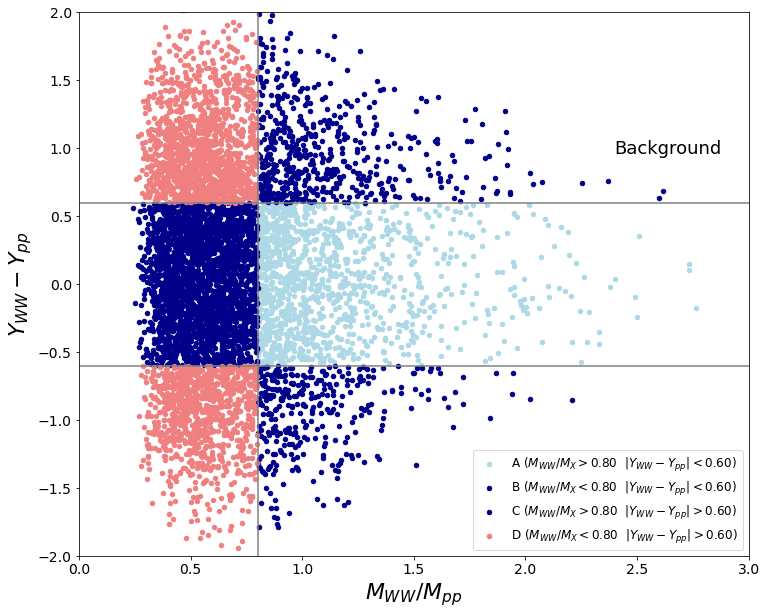

In [106]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events_nTracks40 )
n_events_bkg_A_nTracks40, err_n_events_bkg_A_nTracks40 = res_[ 0 ]
n_events_bkg_B_nTracks40, err_n_events_bkg_B_nTracks40 = res_[ 1 ]
n_events_bkg_C_nTracks40, err_n_events_bkg_C_nTracks40 = res_[ 2 ]
n_events_bkg_D_nTracks40, err_n_events_bkg_D_nTracks40 = res_[ 3 ]

Number of events: 23.742315613366394 +/- 6.427870386305145
Number of events (A): 0.5229025749447936 +/- 0.14409783637700227
Number of events (B): 10.391414960012618 +/- 4.512230602979177
Number of events (C): 3.2859998183694037 +/- 2.2986315505723525
Number of events (D): 9.541998260039573 +/- 3.956364681995534


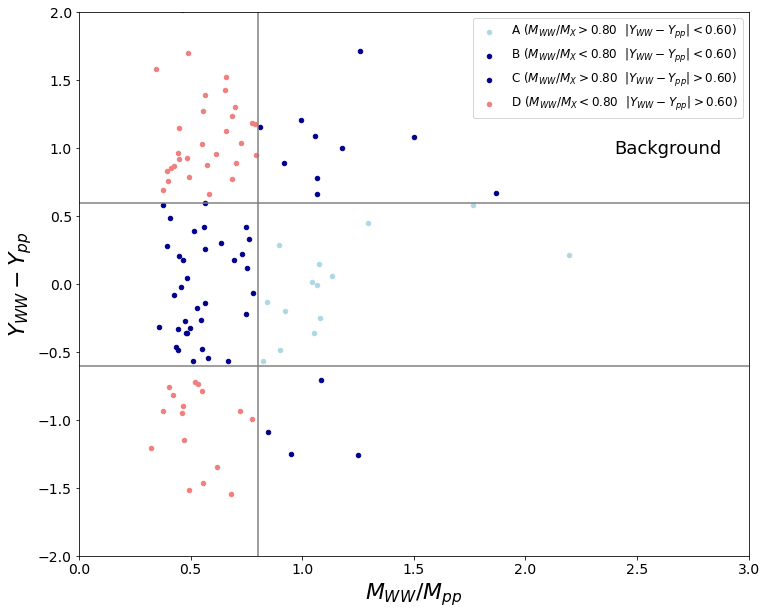

In [107]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events )
n_events_bkg_A, err_n_events_bkg_A = res_[ 0 ]
n_events_bkg_B, err_n_events_bkg_B = res_[ 1 ]
n_events_bkg_C, err_n_events_bkg_C = res_[ 2 ]
n_events_bkg_D, err_n_events_bkg_D = res_[ 3 ]

### Data

In [108]:
# label_data = ""
# if lepton_type == 'muon':
#     label_data = "data-single-arm"
# elif lepton_type == 'electron':
#     label_data = "data-single-arm-electron"

labels_data = []
fileNames_data = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_data = [ "data-single-arm" ]
        fileNames_data = {
            "data-single-arm": "data-store-data-single-arm.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [ "data-single-arm-electron" ]
        fileNames_data = {
            "data-single-arm-electron": "data-store-data-single-arm-electron.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_data = [
            "data-2018-muon-2018A",
            "data-2018-muon-2018B",
            "data-2018-muon-2018C",
            "data-2018-muon-2018D"
        ]
        fileNames_data = {
            "data-2018-muon-2018A": "data-store-data-2018-muon-2018A.h5",
            "data-2018-muon-2018B": "data-store-data-2018-muon-2018B.h5",
            "data-2018-muon-2018C": "data-store-data-2018-muon-2018C.h5",
            "data-2018-muon-2018D": "data-store-data-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [
            "data-2018-electron-2018A",
            "data-2018-electron-2018B",
            "data-2018-electron-2018C",
            "data-2018-electron-2018D"
        ]
        fileNames_data = {
            "data-2018-electron-2018A": "data-store-data-2018-electron-2018A.h5",
            "data-2018-electron-2018B": "data-store-data-2018-electron-2018B.h5",
            "data-2018-electron-2018C": "data-store-data-2018-electron-2018C.h5",
            "data-2018-electron-2018D": "data-store-data-2018-electron-2018D.h5"
        }

base_path_ = 'output'
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label_data )
for label_ in fileNames_data:
    fileNames_data[ label_ ] = "{}/{}".format( base_path_, fileNames_data[ label_ ] )
print ( fileNames_data )

# df_counts_data = None
# # df_protons_multiRP_data_index = None
# df_protons_multiRP_data_events = None
# with pd.HDFStore( file_path_, 'r' ) as store_:
#     print ( list( store_ ) )
#     df_counts_data = store_[ "counts" ]
# #     df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_data_events = store_[ "events_multiRP" ]

df_counts_data = None
# df_protons_multiRP_data_index = None
df_protons_multiRP_data_events = None

df_counts_data_list_ = []
# df_protons_multiRP_data_index_list_ = []
df_protons_multiRP_data_events_list_ = []
for label_ in labels_data:
    print ( label_ )
    file_path_ = fileNames_data[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_data__ = store_[ "counts" ]
#         df_protons_multiRP_data_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_data_events__ = store_[ "events_multiRP" ]
        M_ = -0.055114753311384504
        df_protons_multiRP_data_events__["jet0_tau21_ddt"] = ( df_protons_multiRP_data_events__.loc[ :, "jet0_tau2"] / df_protons_multiRP_data_events__.loc[ :, "jet0_tau1"] ) - (M_*(np.log((((df_protons_multiRP_data_events__.loc[ :, "jet0_corrmass" + "_nom"])**2)/(df_protons_multiRP_data_events__.loc[ :, "jet0_pt" + "_nom"])))))          
        df_counts_data_list_.append( df_counts_data__ )
#         df_protons_multiRP_data_index_list_.append( df_protons_multiRP_data_index__ )
        df_protons_multiRP_data_events_list_.append( df_protons_multiRP_data_events__ )

df_counts_data = df_counts_data_list_[0]
for idx_ in range( 1, len( df_counts_data_list_ ) ):
    df_counts_data = df_counts_data.add( df_counts_data_list_[ idx_ ] )

# df_protons_multiRP_data_index = pd.concat( df_protons_multiRP_data_index_list_ )
df_protons_multiRP_data_events = pd.concat( df_protons_multiRP_data_events_list_ )

{'data-2018-electron-2018A': 'output/data-store-data-2018-electron-2018A.h5', 'data-2018-electron-2018B': 'output/data-store-data-2018-electron-2018B.h5', 'data-2018-electron-2018C': 'output/data-store-data-2018-electron-2018C.h5', 'data-2018-electron-2018D': 'output/data-store-data-2018-electron-2018D.h5'}
data-2018-electron-2018A
output/data-store-data-2018-electron-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-electron-2018B
output/data-store-data-2018-electron-2018B.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-electron-2018C
output/data-store-data-2018-electron-2018C.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-electron-2018D
output/data-store-data-2018-electron-2018D.h5
['/counts', '/events_multiRP', '/protons_multiRP']


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [109]:
df_counts_data

All                  2235351
Jet                  2235351
Electron             2178460
Proton_check_none    2178460
Proton               1489176
dtype: int64

In [110]:
df_protons_multiRP_data_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event     slice                                       
315420 569       415859968 0              150.0       0.3   7.335082   
                 415994624 0              150.0       0.3   7.335082   
                 416269728 0              150.0       0.3   7.335082   
       576       420723008 0              150.0       0.3   7.299857   
       588       428084928 0              150.0       0.3   7.248056   
...                                         ...       ...        ...   
324980 86        93571808  0              160.0       0.3  17.818436   
                 93697128  0              160.0       0.3  17.818436   
                 95066112  0              160.0       0.3  17.818436   
                 94853360  0              160.0       0.3  17.818436   
                 93976848  0              160.0       0.3  17.818436   

                                     jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run    lumiblock event     slice                                                
315420 569       415859968 0      608.162476  1.434174  1.011866  1361.746460   
                 415994624 0      287.280121  2.372029  0.063373  1555.964600   
                 416269728 0      225.901459 -1.468740  1.415144   521.622437   
       576       420723008 0      246.782150 -1.979400  2.953928   912.560608   
       588       428084928 0      224.025955 -0.686134  2.884113   284.702423   
...                                      ...       ...       ...          ...   
324980 86        93571808  0      235.776550 -0.391764 -0.561611   269.513000   
                 93697128  0      229.597092 -2.070120  2.412343   927.328064   
                 95066112  0      227.246124  0.337063 -2.862624   245.255035   
                 94853360  0      349.213898  0.084602 -2.582409   363.411011   
                 93976848  0      223.390411 -0.328062 -1.150173   239.332855   

                                   jet0_mass  jet0_corrmass  jet0_tau1  ...  \
run    lumiblock event     slice                                        ...   
315420 569       415859968 0      161.051514     178.300476   0.358361  ...   
                 415994624 0       67.014351      75.819611   0.367382  ...   
                 416269728 0       43.473766      49.807541   0.236888  ...   
       576       420723008 0       25.702829      28.579819   0.226266  ...   
       588       428084928 0       32.530506      35.172401   0.185432  ...   
...                                      ...            ...        ...  ...   
324980 86        93571808  0       74.817886      81.825966   0.376961  ...   
                 93697128  0       42.001530      47.022583   0.234673  ...   
                 95066112  0       10.363019      11.289539   0.134940  ...   
                 94853360  0       50.456558      55.272923   0.237426  ...   
                 93976848  0        6.550750       7.145022   0.081536  ...   

                                        YX   diffMWW_MX  ratioMWW_MX  \
run    lumiblock event     slice                                       
315420 569       415859968 0      0.153087  -242.610943     0.798457   
                 415994624 0     -0.175648  -680.762664     0.473707   
                 416269728 0     -0.217348  -498.629674     0.525796   
       576       420723008 0     -0.453273  -744.592023     0.379335   
       588       428084928 0      0.100485  -451.016411     0.428089   
...                                    ...          ...          ...   
324980 86        93571808  0     -0.148315  -178.428344     0.704188   
                 93697128  0     -0.132744  -980.578600     0.488616   
                 95066112  0     -0.357017  -379.769054     0.645008   
                 94853360  0     -0.494514  -151.175298     0.820336   
                 93976848  0     -0.266485 -1503.348466     0.214613   

                                  shiftedRatioMWW_MX  diffYWW_YX       MX_nom 

In [161]:
var_str__ = {}
var_str__[ "_nom" ] = "_nom"

def plot_sideband_tau21_ddt( plot_var, variation, df_bkg_events, df_data__ ):
    plot_var__ = plot_var
    variation__ = variation
    var1__ = ( "jet0_tau21_ddt" )
    var2__ = ( "R_MWW_MX" + "_nom" )
    var3__ = ( "Diff_YWW_YX" + "_nom" )
    var4__ = ( "jet0_corrmass" + "_nom" )
    arr_data_MC_ = []
    weights_data_MC_ = []
    arr_signal_ = []
    weights_signal__ = []
    colors_MC_ = []
    colors_sig_ = []
    labels_MC_ = []
    labels_sig_ = []
    
    colors_MC = [ "blue", "dimgray", "orange", "red", "cyan", "lime" ]
    colors_sig = [ "lightblue", "black", "lightcoral" ]

    linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]
    
    msk_data_cut1 = (  df_data__[ var1__ ]  <= 0.7  )
    msk_data_cut2 = ( ( df_data__[ var2__ ] >= 0.80  ) & ( np.abs( df_data__[ var3__ ] ) <= 0.60 ) )
    msk_data_pruned_mass = ( ( df_data__[ var4__ ] >= 50.0 ) & ( df_data__[ var4__ ] <= 110.0 ) )
    msk_data_A =  msk_data_cut1 &  msk_data_cut2 & msk_data_pruned_mass
    msk_data_B = ~msk_data_cut1 &  msk_data_cut2 & msk_data_pruned_mass
    msk_data_C =  msk_data_cut1 & ~msk_data_cut2 & msk_data_pruned_mass
    msk_data_D = ~msk_data_cut1 & ~msk_data_cut2 & msk_data_pruned_mass
    
    if not bkg_MC_mix_protons:
        df__ = df_bkg_events
    for idx__, label__ in enumerate( labels_bkg_plot ):   
        if bkg_MC_mix_protons:
            df__ = df_bkg_events[ label__ ][ "_nom" ]        
        if df__.shape[0] > 0:
            msk_bkg_cut1 = (  df__[ var1__ ]  <= 0.7  )
            msk_bkg_cut2 = ( ( df__[ var2__ ] >= 0.80  ) & ( np.abs( df__[ var3__ ] ) <= 0.60 ) )
            msk_bkg_pruned_mass = ( ( df__[ var4__ ] >= 50.0 ) & ( df__[ var4__ ] <= 110.0 ) )
            msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2 & msk_bkg_pruned_mass
            msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2 & msk_bkg_pruned_mass
            msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2 & msk_bkg_pruned_mass
            msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2 & msk_bkg_pruned_mass
            
            weights__ = ( df__[ "norm" ] )
            
            if bkg_MC_mix_protons:
                arr_data_MC_.append( df_bkg_events[ label__ ][ variation__ ][ plot_var__ + var_str__[ variation__ ] ][ msk_bkg_C ] )
                weights_data_MC_.append( df_bkg_events[ label__ ][ variation__ ][ "norm" ][ msk_bkg_C ] )
                colors_MC_.append( colors_[ idx__ % len( colors_ ) ] )
                labels_MC_.append( labels_samples_bkg[ label__ ] )
            if not bkg_MC_mix_protons:
                arr_data_MC_.append( df_bkg_events[ plot_var__ + var_str__[ variation__ ] ] )
                weights_data_MC_.append( df_bkg_events[ "norm" ] ) 
                colors_MC_.append( colors_[ idx__ % len( colors_ ) ] )
                labels_MC_.append( labels_samples_bkg[ label__ ] )
                       
    n_events_bkg   = np.sum( weights__ )
    err_n_events_bkg = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_bkg_A = np.sum( weights__[ msk_bkg_A ] )
    err_n_events_bkg_A = np.sqrt( np.sum( weights__[ msk_bkg_A ] ** 2 ) )
    n_events_bkg_B = np.sum( weights__[ msk_bkg_B ] )
    err_n_events_bkg_B = np.sqrt( np.sum( weights__[ msk_bkg_B ] ** 2 ) )
    n_events_bkg_C = np.sum( weights__[ msk_bkg_C ] )
    err_n_events_bkg_C = np.sqrt( np.sum( weights__[ msk_bkg_C ] ** 2 ) )
    n_events_bkg_D = np.sum( weights__[ msk_bkg_D ] )
    err_n_events_bkg_D = np.sqrt( np.sum( weights__[ msk_bkg_D ] ** 2 ) )

    print ( "Number of bkg events: {} +/- {}".format( n_events_bkg, err_n_events_bkg ) )
    print ( "Number of bkg events (A): {} +/- {}".format( n_events_bkg_A, err_n_events_bkg_A ) )
    print ( "Number of bkg events (B): {} +/- {}".format( n_events_bkg_B, err_n_events_bkg_B ) )
    print ( "Number of bkg events (C): {} +/- {}".format( n_events_bkg_C, err_n_events_bkg_C ) )
    print ( "Number of bkg events (D): {} +/- {}".format( n_events_bkg_D, err_n_events_bkg_D ) )
    
    var_weights__ = "nom"
    
    for idx__, label__ in enumerate( labels_signals ):
        #df_signal__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label__ ][ variation__ ]
        df_signal__ = df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label__ ][ variation__ ]
        
        msk_sig_cut1 = (  df_signal__[ var1__ ]  <= 0.7  )
        msk_sig_cut2 = ( ( df_signal__[ var2__ ] >= 0.80  ) & ( np.abs( df_signal__[ var3__ ] ) <= 0.60 ) )
        msk_sig_pruned_mass = ( ( df_signal__[ var4__ ] >= 50.0 ) & ( df_signal__[ var4__ ] <= 110.0 ) )
        msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2 & msk_sig_pruned_mass
        msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2 & msk_sig_pruned_mass
        msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2 & msk_sig_pruned_mass
        msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2 & msk_sig_pruned_mass   
    
        weights_sig__ = ( df_signal__[ "norm" ] )
        
        arr_signal_.append( df_signal__[ plot_var__ + var_str__[ variation__ ] ][ msk_sig_C ] )
        #weights_signal__.append( weights_sig_plus_mix_categories_concat[ label__ ][ var_weights__ ][ variation__ ][ msk_sig_C ] )
        weights_signal__.append( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label__ ][ variation__ ][ "norm" ][ msk_sig_C ] )
        colors_sig_.append( colors_sig[ idx__ % len( colors_ ) ] )
        labels_sig_.append( labels_samples[ label__ ] ) 
          
    
    n_events_sig   = np.sum( weights_sig__ )
    err_n_events_sig = np.sqrt( np.sum( weights_sig__ ** 2 ) )
    n_events_sig_A = np.sum( weights_sig__[ msk_sig_A ] )
    err_n_events_sig_A = np.sqrt( np.sum( weights_sig__[ msk_sig_A ] ** 2 ) )
    n_events_sig_B = np.sum( weights_sig__[ msk_sig_B ] )
    err_n_events_sig_B = np.sqrt( np.sum( weights_sig__[ msk_sig_B ] ** 2 ) )
    n_events_sig_C = np.sum( weights_sig__[ msk_sig_C ] )
    err_n_events_sig_C = np.sqrt( np.sum( weights_sig__[ msk_sig_C ] ** 2 ) )
    n_events_sig_D = np.sum( weights_sig__[ msk_sig_D ] )
    err_n_events_sig_D = np.sqrt( np.sum( weights_sig__[ msk_sig_D ] ** 2 ) )

    print ( "Number of signal events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of signal events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of signal events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of signal events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of signal events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )
    
    x_min =  0.
    x_max =  3000.
    y_min = -5.0
    y_max =  5.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )   
    
    plt.hist( arr_data_MC_, weights=weights_data_MC_, 
              stacked=True, color=colors_MC_, label=labels_MC_, range=[0,3000], bins=10 )
    
    plt.hist( arr_signal_, weights=weights_signal__,
              histtype='step', color=colors_sig_, label=labels_sig_, range=[0,3000], bins=10 )
    
    counts_bins_data_, bin_edges_ = np.histogram( df_data__[ plot_var__ + variation__ ] [ msk_data_C ], range=[0,3000], bins=10 )
    errors_bins_data_ = np.sqrt( counts_bins_data_ )
    bin_centres_ = ( bin_edges_[:-1] + bin_edges_[1:] ) / 2.
    plt.errorbar( bin_centres_, counts_bins_data_, yerr=errors_bins_data_, fmt='o', color='black', label=r"Data" )
    
    plt.yscale('log')
    
    plt.xlabel( "MWW", fontsize=18 )
    plt.ylabel( "Events", fontsize=18 )
    plt.legend( loc='best', fontsize=14 )

    if save_figures:
        if lepton_type == 'muon':
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Muon_2018.png", bbox_inches='tight' )
        if lepton_type == 'electron':
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Electron_2018.png", bbox_inches='tight' )
        
    return ( ( n_events_bkg_A, err_n_events_bkg_A ),
             ( n_events_bkg_B, err_n_events_bkg_B ),
             ( n_events_bkg_C, err_n_events_bkg_C ),
             ( n_events_bkg_D, err_n_events_bkg_D ) )

Number of bkg events: 23.742315613366394 +/- 6.427870386305145
Number of bkg events (A): 0.03796056755188807 +/- 0.03796056755188807
Number of bkg events (B): 0.0 +/- 0.0
Number of bkg events (C): 7.917136069027224 +/- 3.9357448669362842
Number of bkg events (D): 2.247851777937188 +/- 2.247851777937188
Number of signal events: 353.92367808489377 +/- 5.554520856749386
Number of signal events (A): 190.03783700124842 +/- 4.070163279872505
Number of signal events (B): 22.49071648913857 +/- 1.4002108481795617
Number of signal events (C): 62.76479020224718 +/- 2.3391056247622912
Number of signal events (D): 8.804505292259671 +/- 0.8760810207199045


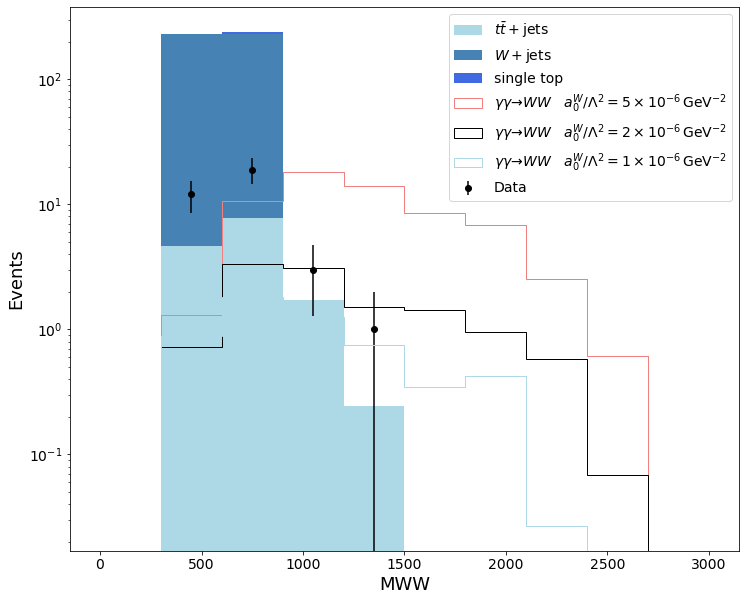

In [162]:
plot_var__ = "MWW"
variation__ = "_nom"

res_ = plot_sideband_tau21_ddt( plot_var=plot_var__, variation=variation__, df_bkg_events=df_protons_multiRP_bkg_events, df_data__=df_protons_multiRP_data_events )
n_events_bkg_A, err_n_events_bkg_A = res_[ 0 ]
n_events_bkg_B, err_n_events_bkg_B = res_[ 1 ]
n_events_bkg_C, err_n_events_bkg_C = res_[ 2 ]
n_events_bkg_D, err_n_events_bkg_D = res_[ 3 ]

In [155]:
var_str__ = {}
var_str__[ "_nom" ] = "_nom"

def plot_sideband_prunedmass( plot_var, variation, df_bkg_events, df_data__ ):
    plot_var__ = plot_var
    variation__ = variation
    var1__ = ( "jet0_corrmass" + "_nom" ) 
    var2__ = ( "R_MWW_MX" + "_nom" )
    var3__ = ( "Diff_YWW_YX" + "_nom" )
    var4__ = ( "jet0_tau21_ddt" )
    arr_data_MC_ = []
    weights_data_MC_ = []
    arr_signal_ = []
    weights_signal__ = []
    colors_MC_ = []
    colors_sig_ = []
    labels_MC_ = []
    labels_sig_ = []
    
    colors_MC = [ "blue", "dimgray", "orange", "red", "cyan", "lime" ]
    colors_sig = [ "lightblue", "black", "lightcoral" ]

    linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]
    
    msk_data_cut1 = ( ( df_data__[ var1__ ] >= 50.0 ) & ( df_data__[ var1__ ] <= 110.0 ) )
    msk_data_cut2 = ( ( df_data__[ var2__ ] >= 0.80  ) & ( np.abs( df_data__[ var3__ ] ) <= 0.60 ) )
    msk_data_tau21 = (  df_data__[ var4__ ]  <= 0.7  )
    msk_data_A =  msk_data_cut1 &  msk_data_cut2 & msk_data_tau21
    msk_data_B = ~msk_data_cut1 &  msk_data_cut2 & msk_data_tau21
    msk_data_C =  msk_data_cut1 & ~msk_data_cut2 & msk_data_tau21
    msk_data_D = ~msk_data_cut1 & ~msk_data_cut2 & msk_data_tau21

    if not bkg_MC_mix_protons:
        df__ = df_bkg_events
    for idx__, label__ in enumerate( labels_bkg_plot ):
        if bkg_MC_mix_protons:
            df__ = df_bkg_events[ label__ ][ "_nom" ]          
        if df__.shape[0] > 0:
            msk_bkg_cut1 = ( ( df__[ var1__ ] >= 50.0 ) & ( df__[ var1__ ] <= 110.0 ) )
            msk_bkg_cut2 = ( ( df__[ var2__ ] >= 0.80  ) & ( np.abs( df__[ var3__ ] ) <= 0.60 ) )
            msk_bkg_tau21 = (  df__[ var4__ ]  <= 0.7  )
            msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2 & msk_bkg_tau21
            msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2 & msk_bkg_tau21
            msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2 & msk_bkg_tau21
            msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2 & msk_bkg_tau21
            
            weights__ = ( df__[ "norm" ] )    
            
            if bkg_MC_mix_protons:
                arr_data_MC_.append( df_bkg_events[ label__ ][ variation__ ][ plot_var__ + var_str__[ variation__ ] ][ msk_bkg_A ] )
                weights_data_MC_.append( df_bkg_events[ label__ ][ variation__ ][ "norm" ][ msk_bkg_A ] )
            if not bkg_MC_mix_protons:
                arr_data_MC_.append( df_bkg_events[ plot_var__ + var_str__[ variation__ ] ] )
                weights_data_MC_.append( df_bkg_events[ "norm" ] )
            colors_MC_.append( colors_MC[ idx__ % len( colors_ ) ] )
            labels_MC_.append( labels_samples_bkg[ label__ ] )
    
    n_events_bkg   = np.sum( weights__ )
    err_n_events_bkg = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_bkg_A = np.sum( weights__[ msk_bkg_A ] )
    err_n_events_bkg_A = np.sqrt( np.sum( weights__[ msk_bkg_A ] ** 2 ) )
    n_events_bkg_B = np.sum( weights__[ msk_bkg_B ] )
    err_n_events_bkg_B = np.sqrt( np.sum( weights__[ msk_bkg_B ] ** 2 ) )
    n_events_bkg_C = np.sum( weights__[ msk_bkg_C ] )
    err_n_events_bkg_C = np.sqrt( np.sum( weights__[ msk_bkg_C ] ** 2 ) )
    n_events_bkg_D = np.sum( weights__[ msk_bkg_D ] )
    err_n_events_bkg_D = np.sqrt( np.sum( weights__[ msk_bkg_D ] ** 2 ) )

    print ( "Number of bkg events: {} +/- {}".format( n_events_bkg, err_n_events_bkg ) )
    print ( "Number of bkg events (A): {} +/- {}".format( n_events_bkg_A, err_n_events_bkg_A ) )
    print ( "Number of bkg events (B): {} +/- {}".format( n_events_bkg_B, err_n_events_bkg_B ) )
    print ( "Number of bkg events (C): {} +/- {}".format( n_events_bkg_C, err_n_events_bkg_C ) )
    print ( "Number of bkg events (D): {} +/- {}".format( n_events_bkg_D, err_n_events_bkg_D ) )
    
    var_weights__ = "nom"

    #nrows_ = ( int( len(labels_signals)/2 ) + 1 if ( len(labels_signals) % 2 ) > 0 else int( len(labels_signals)/2 ) )
    #fig, axes = plt.subplots( nrows_, 2, figsize=(2*12,nrows_*10) )

    #row_ = 0
    #col_ = 0
    
    for idx__, label__ in enumerate( labels_signals ):
        df_signal__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label__ ][ variation__ ]
        
        msk_sig_cut1 = ( ( df_signal__[ var1__ ] >= 50.0 ) & ( df_signal__[ var1__ ] <= 110.0 ) )
        msk_sig_cut2 = ( ( df_signal__[ var2__ ] >= 0.80  ) & ( np.abs( df_signal__[ var3__ ] ) <= 0.60 ) )
        msk_sig_tau21 = (  df_signal__[ var4__ ]  <= 0.7  )
        msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2 & msk_sig_tau21
        msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2 & msk_sig_tau21
        msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2 & msk_sig_tau21
        msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2 & msk_sig_tau21  
        
        weights_sig__ = ( weights_sig_plus_mix_categories_concat[ label__ ][ var_weights__ ][ variation__ ] )
        
        arr_signal_.append( df_signal__[ plot_var__ + var_str__[ variation__ ] ][ msk_sig_A ] )
        weights_signal__.append( weights_sig_plus_mix_categories_concat[ label__ ][ var_weights__ ][ variation__ ][ msk_sig_A ] )
        colors_sig_.append( colors_sig[ idx__ % len( colors_ ) ] )
        labels_sig_.append( labels_samples[ label__ ] )
        
    n_events_sig   = np.sum( weights_sig__ )
    err_n_events_sig = np.sqrt( np.sum( weights_sig__ ** 2 ) )
    n_events_sig_A = np.sum( weights_sig__[ msk_sig_A ] )
    err_n_events_sig_A = np.sqrt( np.sum( weights_sig__[ msk_sig_A ] ** 2 ) )
    n_events_sig_B = np.sum( weights_sig__[ msk_sig_B ] )
    err_n_events_sig_B = np.sqrt( np.sum( weights_sig__[ msk_sig_B ] ** 2 ) )
    n_events_sig_C = np.sum( weights_sig__[ msk_sig_C ] )
    err_n_events_sig_C = np.sqrt( np.sum( weights_sig__[ msk_sig_C ] ** 2 ) )
    n_events_sig_D = np.sum( weights_sig__[ msk_sig_D ] )
    err_n_events_sig_D = np.sqrt( np.sum( weights_sig__[ msk_sig_D ] ** 2 ) )

    print ( "Number of signal events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of signal events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of signal events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of signal events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of signal events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )
       
    x_min =  0.
    x_max =  3000.
    y_min = -5.0
    y_max =  5.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )   
    
    plt.hist( arr_data_MC_, weights=weights_data_MC_,
              stacked=True, color=colors_MC_, label=labels_MC_, range=[0,3000], bins=10 )
    
    plt.hist( arr_signal_, weights=weights_signal__,
              histtype='step', color=colors_sig_, label=labels_sig_, range=[0,3000], bins=10 )
    
    counts_bins_data_, bin_edges_ = np.histogram( df_data__[ plot_var__+  variation__ ] [ msk_data_A ], range=[0,3000], bins=10 )
    errors_bins_data_ = np.sqrt( counts_bins_data_ )
    bin_centres_ = ( bin_edges_[:-1] + bin_edges_[1:] ) / 2.
    plt.errorbar( bin_centres_, counts_bins_data_, yerr=errors_bins_data_, fmt='o', color='black', label=r"Data" )
    
    plt.yscale('log')
    
    plt.xlabel( "MWW", fontsize=18 )
    plt.ylabel( "Events", fontsize=18 )
    plt.legend( loc='best', fontsize=14 )

    if save_figures:
        if lepton_type == 'muon':
            plt.savefig( "plots/" + plot_var__ + "PrunedMass-Sideband-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/" + plot_var__ + "PrunedMass-Sideband-Muon_2018.png", bbox_inches='tight' )
        if lepton_type == 'electron':
            plt.savefig( "plots/" + plot_var__ + "PrunedMass-Sideband-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/" + plot_var__ + "PrunedMass-Sideband-Electron_2018.png", bbox_inches='tight' )
        
    return ( ( n_events_bkg_A, err_n_events_bkg_A ), 
             ( n_events_bkg_B, err_n_events_bkg_B ), 
             ( n_events_bkg_C, err_n_events_bkg_C ), 
             ( n_events_bkg_D, err_n_events_bkg_D ),  
             ( n_events_sig_A, err_n_events_sig_A ),
             ( n_events_sig_B, err_n_events_sig_B ), 
             ( n_events_sig_C, err_n_events_sig_C ),
             ( n_events_sig_D, err_n_events_sig_D ) )

Number of bkg events: 23.742315613366394 +/- 6.427870386305145
Number of bkg events (A): 0.03796056755188807 +/- 0.03796056755188807
Number of bkg events (B): 0.13049837326486902 +/- 0.06611616171836687
Number of bkg events (C): 7.917136069027224 +/- 3.9357448669362842
Number of bkg events (D): 4.079560687695989 +/- 2.3261324766433122
Number of signal events: 361.0462518374221 +/- 5.681978629711598
Number of signal events (A): 140.51880464957793 +/- 3.543948238794762
Number of signal events (B): 27.771723587912657 +/- 1.5683026116811984
Number of signal events (C): 40.083712399633434 +/- 1.8844819273201707
Number of signal events (D): 5.5173399245705745 +/- 0.6965818932777365


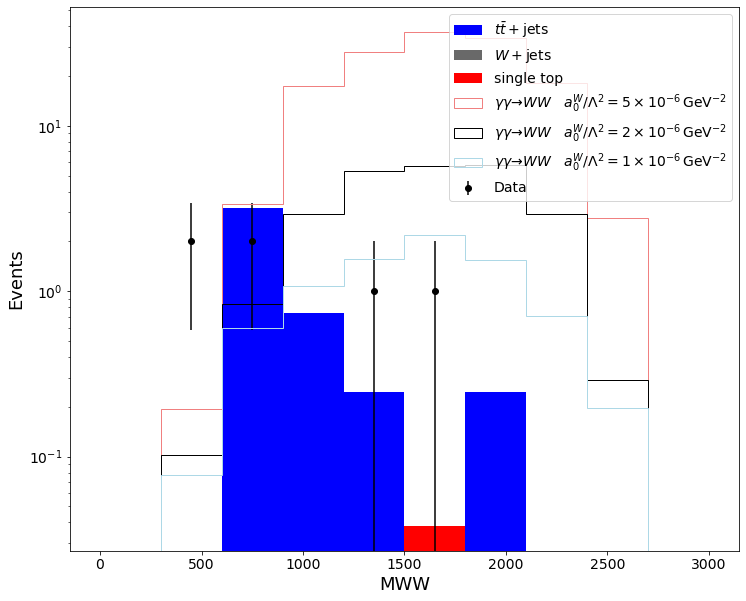

In [156]:
plot_var__ = "MWW"
variation__ = "_nom"

res_ = plot_sideband_prunedmass( plot_var=plot_var__, variation=variation__, df_bkg_events=df_protons_multiRP_bkg_events, df_data__=df_protons_multiRP_data_events )
n_events_bkg_A, err_n_events_bkg_A = res_[ 0 ]
n_events_bkg_B, err_n_events_bkg_B = res_[ 1 ]
n_events_bkg_C, err_n_events_bkg_C = res_[ 2 ]
n_events_bkg_D, err_n_events_bkg_D = res_[ 3 ]

### Select events

In [115]:
print ( df_protons_multiRP_data_events.shape[0] )
df_protons_multiRP_data_events_nTracks40, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type, max_num_tracks=40 )
print ( df_protons_multiRP_data_events_nTracks40.shape[0] )
print ( selection_keys_ )
print ( selections_ )
df_protons_multiRP_data_events__, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type )
df_protons_multiRP_data_events = df_protons_multiRP_data_events__
print ( df_protons_multiRP_data_events.shape[0] )
print ( selection_keys_ )
print ( selections_ )

413802


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


45630
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 413802, 'Electron': 413587, 'Jet': 296537, 'Jet_Electron': 293079, 'MET': 208413, 'Jet_MET': 181900, 'BJet_Veto': 164763, 'Xi_CMS': 136077, 'WLeptonic': 91717, 'Jet_WLeptonic': 89611, 'MWW': 82143, 'ExtraTracks': 45630}
462
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 413802, 'Electron': 413587, 'Jet': 296537, 'Jet_Electron': 293079, 'MET': 208413, 'Jet_MET': 181900, 'BJet_Veto': 164763, 'Xi_CMS': 136077, 'WLeptonic': 91717, 'Jet_WLeptonic': 89611, 'MWW': 82143, 'ExtraTracks': 462}


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [116]:
def plot_regions_data( df_protons_multiRP_data_events ):
    df__ = df_protons_multiRP_data_events
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_data_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_data_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    # msk_data_A =  msk_data_cut1 &  msk_data_cut2
    msk_data_B = ~msk_data_cut1 &  msk_data_cut2
    msk_data_C =  msk_data_cut1 & ~msk_data_cut2
    msk_data_D = ~msk_data_cut1 & ~msk_data_cut2

    # n_events_data = df__.shape[0]
    # n_events_data_A = df__[ msk_data_A ].shape[0]
    n_events_data_B = df__[ msk_data_B ].shape[0]
    n_events_data_C = df__[ msk_data_C ].shape[0]
    n_events_data_D = df__[ msk_data_D ].shape[0]

    # print ( "Number of events: {} - Ratio: {}".format( n_events_data, ( n_events_data / ( n_events_bkg ) ) ) )
    # print ( "Number of events (A): {} - Ratio: {}".format( n_events_data_A, ( n_events_data_A / ( n_events_bkg_A ) ) ) )
    # print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B ) ) ) )
    # print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C ) ) ) )
    # print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D ) ) ) )
    print ( "Number of events (B): {}".format( n_events_data_B ) )
    print ( "Number of events (C): {}".format( n_events_data_C ) )
    print ( "Number of events (D): {}".format( n_events_data_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    # label_str_ = "A (Data/Background: {:.2f})".format( ( n_events_data_A / ( n_events_bkg_A ) ) )
    # label_str_ = r"{}".format( label_str_ )
    # df__[ msk_data_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    # label_str_ = "B (Data/Background: {:.2f})".format( ( n_events_data_B / ( n_events_bkg_B ) ) )
    label_str_ = "B (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    # label_str_ = "C (Data/Background: {:.2f})".format( ( n_events_data_C / ( n_events_bkg_C ) ) )
    label_str_ = "C (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    # label_str_ = "D (Data/Background: {:.2f})".format( ( n_events_data_D / ( n_events_bkg_D ) ) )
    label_str_ = "D (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=16 )
    # leg_ = plt.legend( loc='best', fontsize=16 )
    # leg_.set_title( title_str_, prop={'size': 16} )
    # leg_._legend_box.align = "right"
    ax.text( 0.85, 0.75, "Data", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )
    
    return ( n_events_data_B, n_events_data_C, n_events_data_D )

Number of events (B): 15080
Number of events (C): 5404
Number of events (D): 17754


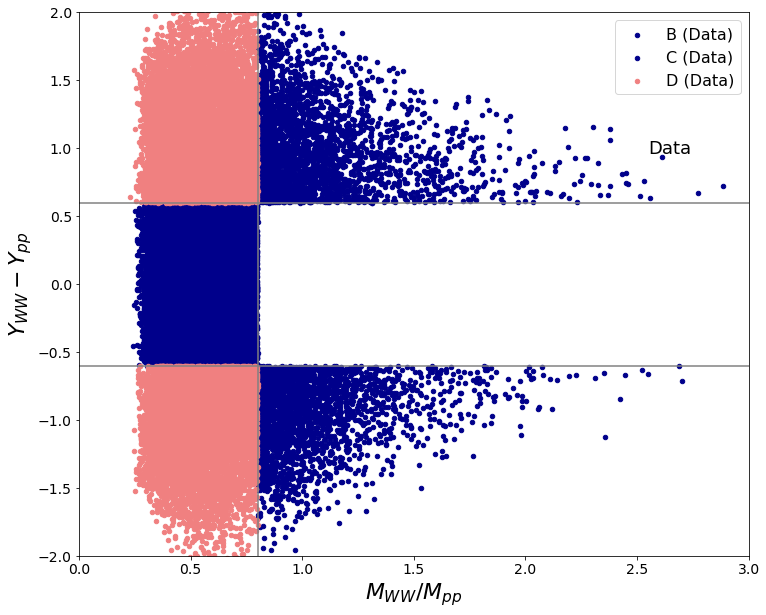

In [117]:
res_ = plot_regions_data( df_protons_multiRP_data_events_nTracks40 )
n_events_data_B_nTracks40 = res_[ 0 ]
n_events_data_C_nTracks40 = res_[ 1 ]
n_events_data_D_nTracks40 = res_[ 2 ]

Number of events (B): 141
Number of events (C): 67
Number of events (D): 165


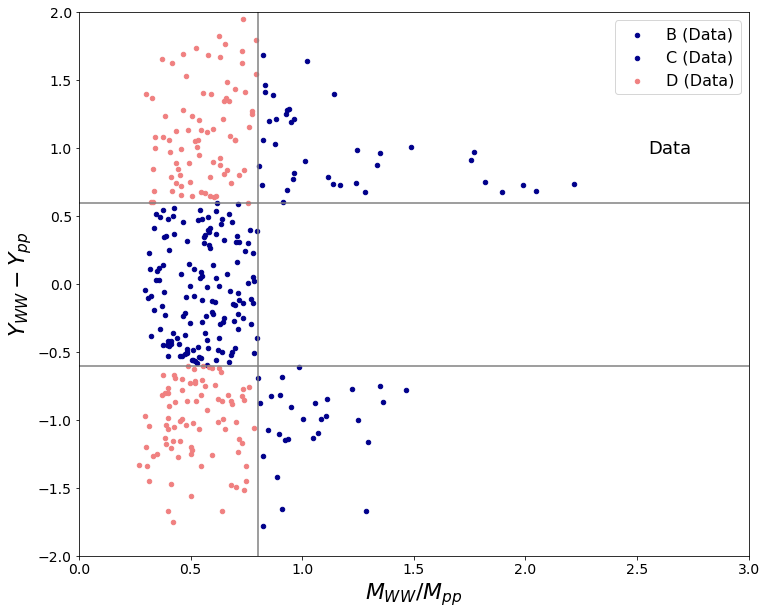

In [118]:
res_ = plot_regions_data( df_protons_multiRP_data_events )
n_events_data_B = res_[ 0 ]
n_events_data_C = res_[ 1 ]
n_events_data_D = res_[ 2 ]

In [119]:
ratio_ = ( n_events_data_B_nTracks40 / n_events_bkg_B_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_nTracks40 ) + ( err_n_events_bkg_B_nTracks40 / n_events_bkg_B_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_C_nTracks40 / n_events_bkg_C_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_C_nTracks40 ) + ( err_n_events_bkg_C_nTracks40 / n_events_bkg_C_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_D_nTracks40 / n_events_bkg_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_D_nTracks40 ) + ( err_n_events_bkg_D_nTracks40 / n_events_bkg_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

15.466014416546615 0.6865871356536358
16.966633519866242 1.3133895057239109
21.97839434823839 1.0666683891399462


In [120]:
n_events_data_B_D_nTracks40 = ( n_events_data_B_nTracks40 + n_events_data_D_nTracks40 )
# err_n_events_data_B_D_nTracks40 = np.sqrt( n_events_data_B_D_nTracks40 )
n_events_bkg_B_D_nTracks40 = ( n_events_bkg_B_nTracks40 + n_events_bkg_D_nTracks40 )
err_n_events_bkg_B_D_nTracks40 = np.sqrt( err_n_events_bkg_B_nTracks40 ** 2 + err_n_events_bkg_D_nTracks40 ** 2 )
ratio_ = ( n_events_data_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_D_nTracks40 ) + ( err_n_events_bkg_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

18.416741006269586 0.6030121006079678


GGToWW-AQGC-2018-electron-A0W5e-6
R_MWW_MX
0      0.248027
1      0.221434
2      0.199230
3      0.180447
4      0.164381
         ...   
195    0.205533
196    0.208441
197    0.211483
198    0.214670
199    0.218016
Length: 200, dtype: float64 0.10985764765462003
0     -0.167555
1     -0.158957
2     -0.151747
3     -0.145617
4     -0.140346
         ...   
195   -0.150811
196   -0.145943
197   -0.140552
198   -0.134592
199   -0.128014
Length: 200, dtype: float64 -0.11009715717570565
Diff_YWW_YX
0      0.068919
1      0.067996
2      0.067127
3      0.066307
4      0.065532
         ...   
195    0.052331
196    0.052527
197    0.052730
198    0.052939
199    0.053157
Length: 200, dtype: float64 0.05065570497493464
0     -0.059714
1     -0.059333
2     -0.058975
3     -0.058637
4     -0.058318
         ...   
195   -0.051777
196   -0.051834
197   -0.051893
198   -0.051955
199   -0.052019
Length: 200, dtype: float64 -0.05187783550505836
GGToWW-AQGC-2018-electron-A0W2e-6
R_MWW_MX
0   

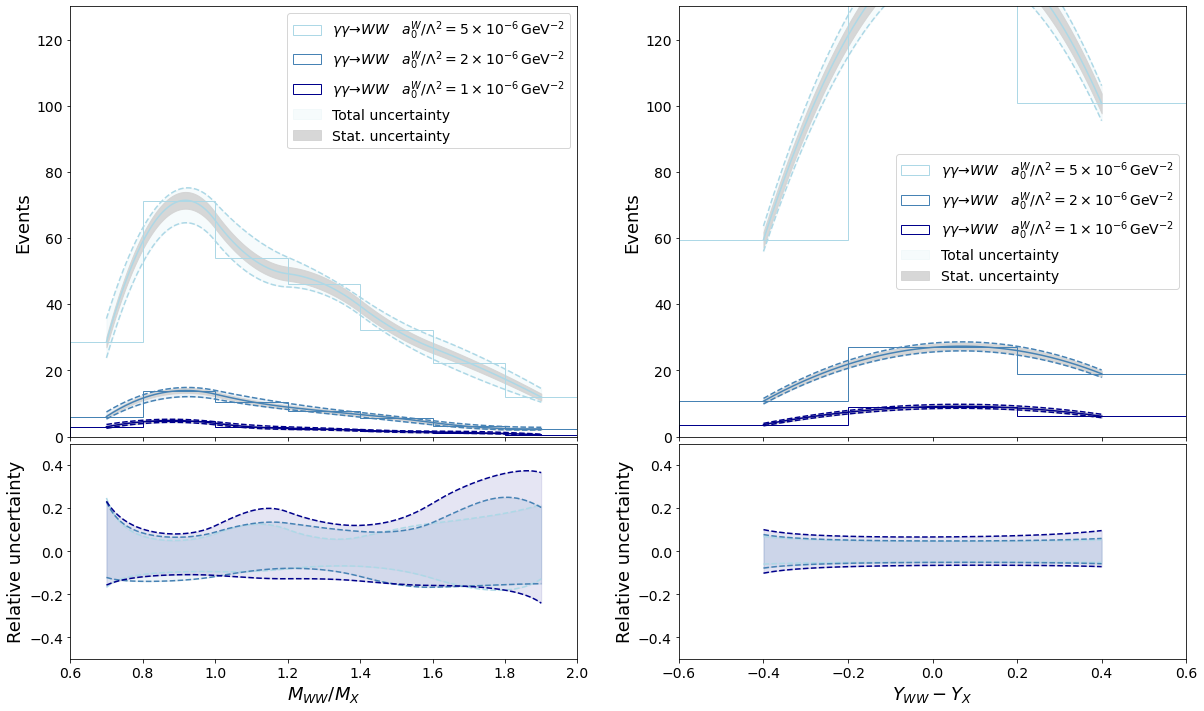

In [121]:
relative_uncertainty_ = True

# ylim_ = (0.,5.)
# ylim_ = (0.,3.)
# ylim_ = (0.,0.60)
ylim_ = (0.,130.)
ylim_ratio_ = (-0.50,0.50)

yscale_=None
# yscale_='log'

colors = [ "lightblue", "steelblue", "darkblue", "royalblue"  ]

# fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

class Obj2D:
    def __init__( self ):
        self.obj_ = [ [], [] ]
    def __getitem__( self, idx ):
        if isinstance( idx, tuple ): return self.obj_[ idx[0] ][ idx[1] ]
        else : return self.obj_[ idx ]

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

def plot_signal( axes ):
    for idx_label_, label_ in enumerate( labels_signals[::-1] ):
        print ( label_ )
        color_ = colors[ idx_label_ ]

        spline_nom_ = {}
        spline_max_ = {}
        spline_min_ = {}
        spline_max_err_ = {}
        spline_min_err_ = {}
        spline_nom_arr_ = {}
        spline_max_arr_ = {}
        spline_min_arr_ = {}
        spline_max_err_arr_ = {}
        spline_min_err_arr_ = {}

        idx_row_ = 0
        idx_col_ = 0
        for var__ in vars_:
            print ( var__ )
            idx_row_ = 0
            counts_ = counts[ label_ ][ var__ ]
            err_ = err[ label_ ][ var__ ]
            bins_ = bins[ label_ ][ var__ ]
            __max_err__ = ( counts_ + err_ )
            __min_err__ = ( counts_ - err_ )
            __max__ = max_variations_total[ label_ ][ var__ ]
            __min__ = min_variations_total[ label_ ][ var__ ]

            bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

            axes[idx_row_,idx_col_].hist( bin_centers_, weights=counts_,
                                          histtype='step', color=color_, linestyle="-", label=labels_samples[ label_ ],
                                          bins=bins_ )

            spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
            spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
            spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
            spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
            spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
            x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
            spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
            spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
            spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
            spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
            spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

            axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
            __label_0 = None
            __label_1 = None
            if idx_label_ == 0:
                __label_0 = "Total uncertainty"
                __label_1 = "Stat. uncertainty"
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label=__label_0 )
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90, label=__label_1 )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ )
    #         axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            axes[idx_row_,idx_col_].get_xaxis().set_ticklabels( [] )
            axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
            if yscale_:
                axes[idx_row_,idx_col_].set_ylim( bottom=0.01 )
                axes[idx_row_,idx_col_].set_yscale( yscale_ )
            axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )

            idx_row_ = 1
            if relative_uncertainty_:
                ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_max_sel_ = pd.Series( ratio_max_ )
                ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                ratio_min_sel_ = pd.Series( ratio_min_ )
                ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                print ( ratio_max_sel_, ratio_max_sel_.mean() )
                print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
            else:
                diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
        #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
            axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            idx_col_ += 1

plot_signal( axes=axes )

if save_figures:
    if lepton_type == 'muon':
        if yscale_:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log-Muon_2018.png", bbox_inches='tight' )
        else:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electroElectron':
        if yscale_:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log-Electron_2018.png", bbox_inches='tight' )
        else:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-Electron_2018.png", bbox_inches='tight' )

GGToWW-AQGC-2018-electron-A0W5e-6
R_MWW_MX
0      0.248027
1      0.221434
2      0.199230
3      0.180447
4      0.164381
         ...   
195    0.205533
196    0.208441
197    0.211483
198    0.214670
199    0.218016
Length: 200, dtype: float64 0.10985764765462003
0     -0.167555
1     -0.158957
2     -0.151747
3     -0.145617
4     -0.140346
         ...   
195   -0.150811
196   -0.145943
197   -0.140552
198   -0.134592
199   -0.128014
Length: 200, dtype: float64 -0.11009715717570565
Diff_YWW_YX
0      0.068919
1      0.067996
2      0.067127
3      0.066307
4      0.065532
         ...   
195    0.052331
196    0.052527
197    0.052730
198    0.052939
199    0.053157
Length: 200, dtype: float64 0.05065570497493464
0     -0.059714
1     -0.059333
2     -0.058975
3     -0.058637
4     -0.058318
         ...   
195   -0.051777
196   -0.051834
197   -0.051893
198   -0.051955
199   -0.052019
Length: 200, dtype: float64 -0.05187783550505836
GGToWW-AQGC-2018-electron-A0W2e-6
R_MWW_MX
0   

KeyError: 'norm'

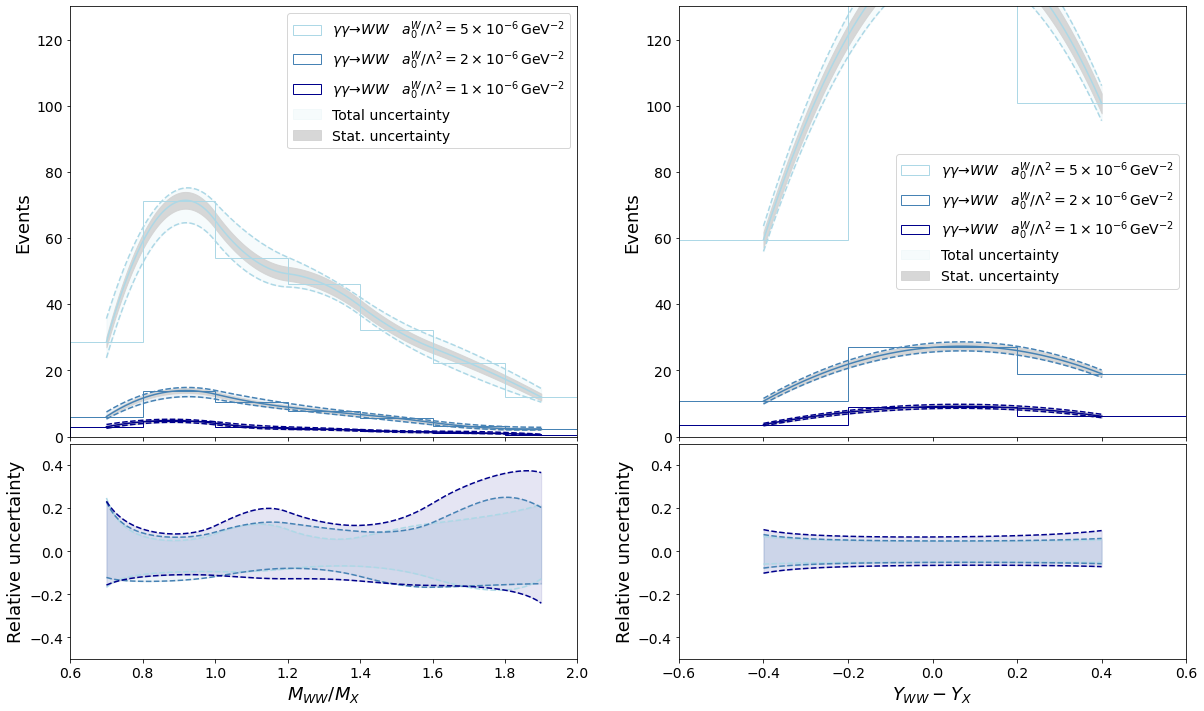

In [122]:
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

plot_signal( axes=axes )

color_ = 'lightcoral'

# counts__ = None
# err__ = None
# bins__ = None
# max_variations_total__ = None
# min_variations_total__ = None
spline_nom_ = {}
spline_max_ = {}
spline_min_ = {}
spline_max_err_ = {}
spline_min_err_ = {}
spline_nom_arr_ = {}
spline_max_arr_ = {}
spline_min_arr_ = {}
spline_max_err_arr_ = {}
spline_min_err_arr_ = {}
idx_row_ = 0
idx_col_ = 0
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
    arr__ = df__[ var__ + "_nom" ]  
    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]

    sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

    __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
    __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

    __max__ = ( sum_w_ + np.sqrt( sum_w2_ ) ) 
    __min__ = ( sum_w_ - np.sqrt( sum_w2_ ) )
    
    print ( sum_w_ )
    print ( __max_err__ )
    print ( __min_err__ )
    print ( __max__ )
    print ( __min__ )
#     counts__[ var__ ] = sum_w_
#     err__[ var__ ] = np.sqrt( sum_w2_ )
#     bins__[ var__ ] = bins_
#     max_variations_total__[ var__ ] = __max__
#     min_variations_total__[ var__ ] = __min__

    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

    axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                  histtype='step', color=color_, linestyle="-",
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ], label="Background" )

    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
    spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
    spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label="Background" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
#     axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
    axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )
    
    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
    idx_col_ += 1
    
if save_figures:
    if lepton_type == 'muon':
        if yscale_:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log-Muon_2018.png", bbox_inches='tight' )
        else:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        if yscale_:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log-Electron_2018.png", bbox_inches='tight' )
        else:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-Electron_2018.png", bbox_inches='tight' )

In [ ]:
# axes[0,0].set_xlim( 0.6, 2.0 )
# axes[1,0].set_xlim( 0.6, 2.0 )
# axes[0,1].set_xlim( -1., 1. )
# axes[1,1].set_xlim( -1., 1. )
# axes[0,1].set_xlim( -0.60, 0.60 )
# axes[1,1].set_xlim( -0.60, 0.60 )
# axes[0,0].set_ylim( 0., 5. )
# axes[0,0].set_ylim( 0., 9. )
# axes[0,1].set_ylim( 0., 5. )
# axes[0,1].set_ylim( 0., 8. )
# axes[0,1].set_ylim( 0., 9. )
# axes[0,0].set_ylim( 0., 1. )
# axes[0,1].set_ylim( 0., 1. )
# axes[0,0].set_yscale( 'log' )
# axes[0,1].set_yscale( 'log' )
# axes[0,0].set_ylim( 0.01, 5. )
# # axes[0,1].set_ylim( 0.01, 5. )
# axes[0,1].set_ylim( 0.01, 8. )
# fig

In [ ]:
# if save_figures:
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [ ]:
# var_name_lepton_id_up_ = ""
# var_name_lepton_id_dw_ = ""
# if lepton_type == 'muon':
#     var_name_lepton_id_up_ = "syst_up_sf_muon_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_muon_id"
# elif lepton_type == 'electron':
#     var_name_lepton_id_up_ = "syst_up_sf_electron_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_electron_id"
var_name_lepton_id_ = ""
if lepton_type == 'muon':
    var_name_lepton_id_ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name_lepton_id_ = "sf_electron_id"
var_name_trigger_ = ""
if lepton_type == 'muon':
    var_name_trigger_ = "sf_muon_trigger"
elif lepton_type == 'electron':
    var_name_trigger_ = "sf_electron_trigger"

uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, var_name_trigger_, 'sf_prefiring', 'proton_scale', 'proton_eff' ]

for label__ in labels_signals:
    for unc__ in uncertainties_:
        label_unc__ = "syst_up_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] < 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )
        label_unc__ = "syst_dw_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] > 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )

    var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
    var_name_trigger_up__ = "syst_up_{}".format( var_name_trigger_ )
    sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_trigger_up__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_sf_prefiring" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                          )
    var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
    var_name_trigger_dw__ = "syst_dw_{}".format( var_name_trigger_ )
    sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_trigger_dw__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_sf_prefiring" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                          )
print ( sum_weights )

In [ ]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

In [ ]:
# df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100.

In [ ]:
symmetrize_uncertainties = True
if symmetrize_uncertainties:
#     var_name_lepton_id_ = ""
#     if lepton_type == 'muon':
#         var_name_lepton_id_ = "sf_muon_id"
#     elif lepton_type == 'electron':
#         var_name_lepton_id_ = "sf_electron_id"

    uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, var_name_trigger_, 'sf_prefiring', 'proton_scale', 'proton_eff' ]
    
    for label__ in labels_signals:
        for unc__ in uncertainties_:
            label_unc_up__ = "syst_up_{}".format( unc__ )
            label_unc_dw__ = "syst_dw_{}".format( unc__ )
            unc_max__ = np.max( [ np.abs( sum_weights[ label__ ][ label_unc_up__ ] ) , np.abs( sum_weights[ label__ ][ label_unc_dw__ ] ) ] )
            sum_weights[ label__ ][ label_unc_up__ ] =  unc_max__
            sum_weights[ label__ ][ label_unc_dw__ ] = -unc_max__

        var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_trigger_up__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_sf_prefiring" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                              )
        var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_trigger_dw__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_sf_prefiring" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                              )
print ( sum_weights )

In [ ]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

In [ ]:
df__ = df_protons_multiRP_bkg_events
weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
weights_squared__ = ( weights__ ** 2 )
arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )

In [ ]:
df_sum_weights__[ "Background" ] = -1.
df_sum_weights__[ "Background" ][ "central" ] = sum_weights_cut__
df_sum_weights__[ "Background" ][ "stat" ] = np.sqrt( sum_weights_squared_cut__ )
df_sum_weights__

In [ ]:
df_sum_weights__.iloc[ 1:, : ].where( ~( df_sum_weights__.iloc[ 1:, : ] != -1. ) , df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100. )

In [ ]:
save_table_systematics = False

if save_table_systematics:
    file_path_ = ""
    file_str_ = "table_systematics"
    if norm_to_1fb:
        file_str_ += "-norm_to_1fb"
    if data_sample == '2017':
        if lepton_type == 'muon':
            file_path_ = file_str_ + "-2017-muon" + ".h5"
        elif lepton_type == 'electron':
            file_path_ = file_str_ + "-2017-electron" + ".h5"
    elif data_sample == '2018':
        if lepton_type == 'muon':
            file_path_ = file_str_ + "-2018-muon" + ".h5"
        elif lepton_type == 'electron':
            file_path_ = file_str_ + "-2018-electron" + ".h5"

    with pd.HDFStore( file_path_, 'w' ) as store_:
        store_[ "table_systematics" ] = df_sum_weights__

In [ ]:
if save_table_systematics:
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )

In [ ]:
# arrays = [
#     ["bar","bar","foo","foo","baz","baz"],
#     ["one","one","two","two","one","one"]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 6*2 ).reshape( 6, 2 ), index=index, columns=['A','B'] )
# df_groupby = df.groupby( ["first","second"] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# df_groupby_apply_ = df_groupby.apply( lambda df__: ( df__['A'].iloc[0] * df__['B'].iloc[1] ) )
# print ( df_groupby_apply_ )
# df_nonduplicated = df[ ~df.index.duplicated(keep='first') ]
# df_nonduplicated.loc[ :, 'C' ] = df_groupby_apply_
# df_nonduplicated

In [ ]:
# arrays = [
#     [ "bar", "bar", "bar", "foo", "foo", "foo", "baz" ],
#     [ "one", "two", "two", "one", "one", "two", "one" ]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 7*2 ).reshape( 7, 2 ), index=index, columns=['A','B'] )
# df = df.reset_index().set_index( ["first"] )
# print ( df )
# df_groupby = df.groupby( [ "first", "second" ] )
# # df_groupby = df.groupby( [ "first" ] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# # df_groupby_A_min = df_groupby[ "A" ].min()
# # print ( df_groupby_A_min )
# # df_groupby_A_max = df_groupby[ "A" ].max()
# # print ( df_groupby_A_max )
# # df_groupby_A_min.loc[ ("foo", "two") ]
# msk__ = df_groupby[ 'A' ].transform( lambda s__: ( s__ == s__.min() ) )
# print ( msk__ )
# df[ msk__ ]

In [ ]:
# help( df_groupby.transform )

In [ ]:
# from scipy.interpolate import make_interp_spline
# np.info( make_interp_spline )

In [ ]:
# import mpl_toolkits.axes_grid1
# dir( mpl_toolkits.axes_grid1 )
# fig_ = plt.figure()
# divider_ = mpl_toolkits.axes_grid1.make_axes_locatable( plt.gca() )
# divider_
# help( mpl_toolkits.axes_grid1.axes_divider.AxesDivider )